# Linear Kernel

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns;sns.set_style('ticks')

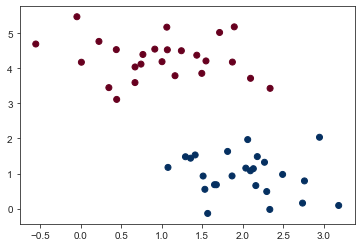

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers = 2, cluster_std = .6, random_state=0, n_samples = 50)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'RdBu')

In [3]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X, y)
model.coef_, model.intercept_

(array([[ 0.22967329, -1.37758262]]), array([3.18971354]))

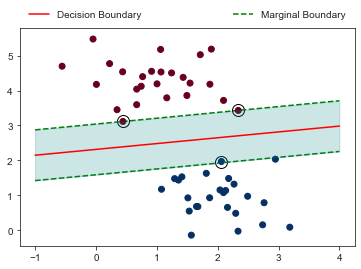

In [4]:
x_line = np.linspace(-1, 4)
(a, b), c = model.coef_[0], model.intercept_
y_line = (-c - a * x_line) / b
y_1 = (1 - c - a * x_line) / b
y_2 = (-1 - c - a * x_line) / b

sv = model.support_vectors_
plt.plot(sv[:,0], sv[:,1], 'o', ms = 12, mew = 1, mec = 'black', zorder = 0, mfc = 'none')

plt.scatter(X[:, 0], X[:,1], c = y, cmap = 'RdBu', zorder = 1) #plot data
plt.plot(x_line, y_line, color = 'red', label = 'Decision Boundary') #plot the Decision Boundary
plt.plot(x_line, y_1, '--', color = 'green', zorder = 0)  #Plot the marginal Boundary
plt.plot(x_line, y_2, '--', color = 'green', label = 'Marginal Boundary', zorder = 0)
plt.fill_between(x_line, y_1, y_2, color = 'teal', alpha = .2) #Highlight the margin
plt.legend(frameon = False, bbox_to_anchor = (0,1,1,1), mode = 'expand', loc = 'lower left', ncol = 2)

# Gaussian Kernel (Radial Basis Function)

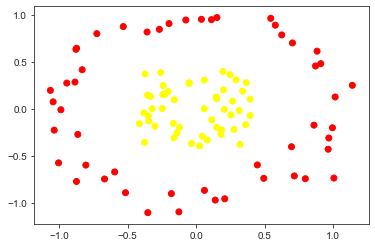

In [5]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 100, noise = .1, factor = .3, random_state = 6)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'autumn')

Map a point $(x, y)$ in 2-D to $(x, y, \sqrt{x^2 + y ^ 2})$ in 3-D

In [6]:
r = (X ** 2).sum(1) ** .5
X3D = np.hstack((X, r[:, np.newaxis]))

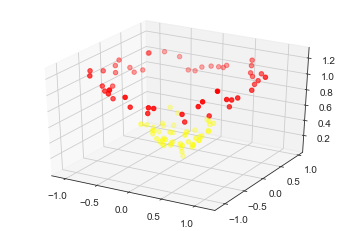

In [7]:
from mpl_toolkits import mplot3d
ax = plt.subplot(projection = '3d')
ax.scatter(X3D[:,0], X3D[:,1], X3D[:,2], c = y, cmap = 'autumn')

In [8]:
%%HTML
<h2>Modelling<h2>

In [9]:
model = SVC(C = 1e10, kernel = 'rbf', gamma = 'auto')
model.fit(X, y)


SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

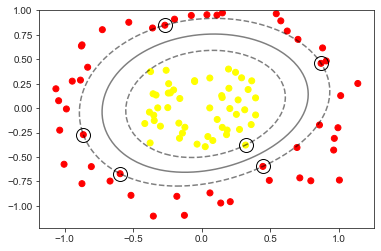

In [14]:
sv = model.support_vectors_
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'autumn') #plot data
plt.plot(sv[:,0], sv[:,1], 'o', mfc = 'none', ms = 14, mec = 'k') #Highlight support vectors

#Plot decision boundary
x_contour = np.linspace(-1,1)
y_contour = np.linspace(-1,1)
x_contour, y_contour = np.meshgrid(x_contour, y_contour)
xy = np.vstack((x_contour.ravel(), y_contour.ravel())).T
xy.shape, X.shape
model.decision_function(xy)
z = model.decision_function(xy)
z = z.reshape(x_contour.shape)
plt.contour(x_contour, y_contour, z,colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


# Tuning the SVC: Softening Margins

In [18]:
%%HTML
<img src = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABCIAAAF9CAYAAADRMcnWAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzs3XdUVNfax/HvDB1BUETsPQqa2HvsJfYSSxI19phqejXv%0ATdGbXu5Nck2MxsQ0jYktGjWW2DtiwxIrFlRUQEApw1Dm/UMl4AyKlBnK77OWa8k+7ZnNmWHPc3Yx%0AWCwWCyIiIiIiIiIidmB0dAAiIiIiIiIiUnIoESEiIiIiIiIidqNEhIiIiIiIiIjYjRIRIiIiIiIi%0AImI3SkSIiIiIiIiIiN0oESEiIiIiIiIidqNEhEgxc/XqVT788EO6detG48aN6dWrFzNmzCA1NTXf%0Ar2U2m+nXrx/btm3LUn7+/HnGjRtHkyZN6NOnDxs3brzleZYvX859991H48aNefLJJ7l8+XK+xyoi%0AIiL5wx5tDbPZzBtvvEHLli1p164dM2fOzNFxISEhdO7cOd/iEJGCoUSESDESFxfHkCFD2L9/P+++%0A+y7Lli3jhRde4Oeff2bSpEn5ei2z2cwLL7zA8ePHrbY98cQTlC1blvnz5zNgwACeeeYZzp07Z/M8%0AoaGhTJo0iSeffJLffvuN+Ph4XnnllXyNVURERPKHvdoaH330Efv27eOHH35gypQpTJs2jeXLl9/y%0AmCNHjvDcc89hsVjyLQ4RKRjOjg5ARPLPxx9/jKurK7NmzcLFxQWAypUr4+vry6hRoxg5ciQNGzbM%0A83VOnDjBiy++aHPbtm3bOH36NHPnzsXDw4PatWuzbds25s+fz7PPPmu1/+zZs+nRowcDBw4ErjU8%0AOnXqRHh4OFWrVs1zrCIiIpJ/7NHWSEpKYt68eUyfPp2goCCCgoJ45JFHmD17Nr1797Z5zNy5c/no%0Ao4+oVq0asbGxebq+iBQ89YgQKSbMZjPLly9n5MiRGQ2DG1q0aMEPP/xAvXr1rI4LDg4mMDCQoKAg%0AAgMDM/4FBQXx+++/27xWcHAwbdq04ddff7V66hAaGkpQUBAeHh4ZZc2aNWPv3r02z7V3715atGiR%0A8XOFChWoVKkSe/bsyfFrFxERkYJnr7bG4cOHSUlJoWnTphllzZo1Y//+/dn2dti8eTMfffQRo0eP%0AzuOrFBF7UI8IkWIiPDycpKQk7r77bpvbW7ZsabO8adOmbNmyxeY2b29vm+XDhg3LNo7IyEjKly+f%0ApczPz48LFy7keP9y5cplu7+IiIg4hr3aGpGRkfj4+ODq6ppR5ufnR0pKCtHR0ZQrV87qmKlTpwKw%0AaNGi274OEXE8JSJEiokrV64A2ScPsuPs7Iyfn1++xZGUlJSl4QDg6uqK2Wy2ub/JZLqj/UVERMQx%0A7NXWyK4tAah9IFJMKBEhUkyUKVMGi8VCXFzcHc2tEBISwoQJE6zKDQYDU6ZMoW/fvncUh5ubG/Hx%0A8VnKzGZzlqEaN+9/c6PiVvuLiIiIY9irrZFd2wDA3d09F5GLSGGjRIRIMVGtWjV8fHwIDQ212WXy%0A+eefp2/fvnTt2jVLecOGDVmyZInNc+amp0RAQABHjhzJUhYVFYW/v7/N/cuXL09kZGSO9xcRERHH%0AsFdbIyAggCtXrpCamoqz87WvK1FRUbi6uuLr65sPr0REHE2TVYoUE0ajkb59+zJ79mxSUlKybNu+%0AfTsrVqygbNmyVse5urpStWpVm/88PT3vOI5GjRrx999/YzKZMsp27dpFo0aNbO7fuHFjdu3alfFz%0AREQEERERNG7c+I6vLSIiIgXHXm2NoKAgXFxcskxcHRISQoMGDTAa9fVFpDjQO1mkGHnqqadITk5m%0A3Lhx7Nixg/DwcBYtWsTzzz/P4MGDadKkSYHH0LJlSypXrsyrr77K8ePHmTFjBvv27eOBBx4AICUl%0AhaioKNLT04FrE18uXbqUefPmceTIEV577TU6duxItWrVCjxWERERuTP2aGu4u7szYMAAJk+eTGho%0AKGvWrGHWrFlZVsSIiooiOTk5z9cSEccwWLJbA0dEiqTIyEimTp3Kxo0biYmJoUqVKgwZMoSRI0fi%0A5OSU79cLCgriu+++o02bNhll4eHhvP7664SGhlKtWjVef/31jO3BwcGMHj2aNWvWUKlSJQB+//13%0AvvjiC2JjY2nXrh2TJ0+mTJky+R6riIiI5J092homk4nJkyezcuVKvLy8GDduHGPGjMnYHhgYyAcf%0AfMDAgQOzHLdo0SI+//xz1q9fny9xiEjBUCJCREREREREROwm15NVLlq0iIULF2IwGEhOTubw4cNs%0A2bIFLy+v/IxPRERESgi1LUREREqGfOkRMWXKFIKCghg6dGh+xCQiIiIlnNoWIiIixVeeJ6vcv38/%0Ax48fV0NBRERE8oXaFiIiIsVbnhMRM2bMYOLEifkRi4iIiIjaFiIiIsVcnhIRV69e5dSpU7Rs2fK2%0A+2pOTBEREbkdtS1ERESKv1xPVgmwc+dOWrdunaN9DQYDkZFX83K5Ysff31t1YoPqxZrqxDbVizXV%0AiW2qF9v8/b0dHYIVtS3yTve7NdWJbaoXa6oT21QvtqlerOW0bZGnHhEnT56katWqeTmFiIiISAa1%0ALURERIq/PPWIGD9+fH7FISIiIqK2hYiISAmQ58kqRURERERERERySokIEREREREREbEbJSJERERE%0ARERExG6UiBARERERERERu1EiQkRERERERETsRokIEREREREREbEbJSJERERERERExG6UiBARERER%0AERERu1EiQkRERERERETsRokIEREREREREbEbJSJERERERERExG6UiBARERERERERu1EiQkRERERE%0ARETsRokIEREREREREbEbJSJERERERERExG6UiBARERERERERu1EiQkRERERERETsRokIERERERER%0AEbEbJSJERERERERExG6UiBARERERERERu1EiQkRERERERETsRokIEREREREREbEbJSJERERERERE%0AxG6UiBARERERERERu1EiQkRERERERETsRokIEREREREREbEbJSJERERERERExG6UiBARERERERER%0Au1EiQkRERERERETsxjm3B86YMYO1a9eSkpLC8OHDGTx4cH7GJSIiIiWQ2hciIiLFX64SEcHBwezZ%0As4e5c+eSmJjId999l99xiYiISAmj9oWIiEjJkKtExObNm6lbty5PPvkkCQkJvPLKK/kdl4iIiJQw%0Aal+IiIiUDLlKRMTExHD+/HmmT59OeHg4TzzxBCtWrMjv2ERERKQEUftCRESkZMhVIsLX15fatWvj%0A7OxMzZo1cXNz4/Lly5QtW/aWx/n7e+cqyOJMdWKb6sWa6sQ21Ys11YltqpfCLzftC/1ebVO9WFOd%0A2KZ6saY6sU31YpvqJXdylYho1qwZP/30E2PGjOHixYuYTCbKlClz2+MiI6/m5nLFlr+/d6Gvk8Mh%0AwYSvX4uTjw+tho+iVKlSBX7NolAv9qY6sU31Yk11YpvqxbbC1njKTftCv1drhf1+N5lMbJ87m5TI%0ASwS0uZeG7ToU+DULe504iurFmurENtWLbaoXazltW+QqEdGpUydCQkIYMmQIFouFt956C4PBkJtT%0ASSGVmprKHxMfpf3yZbQ3JZEMLP3ma0q//S6Ne/d1dHgiIlIMqX1R/B3auIELk16i/7EjeAAnXF1Z%0A2Lkbvb/5Hnd3d0eHJyIidpLr5Ttfeuml/IxDCpm1//mIkQvn43H9Zzdg8KmTLHzr/0jo2NkuPSNE%0A8sP+jeu5MOcnXCPOY65QkYBhD9OwUxdHhyUi2VD7ovhKSUkh4o3XeOjYkYyy2mYz1VYu55d33qbX%0AOx84LjiRO5CcnMyGqZ/hvH0bhvQ0kps0o92zL+DlXdrRoYkUGblOREjx5rJ+bUYSIrO+p0+yaPaP%0AdHn0CbvHJHKngufNpdL/vUKX2NiMstA1q9j+7w9oPexhB0YmIlLybF+0gD5/H7QqdwE8Nm2wf0Ai%0AuZCamsofY4Yzfs1qXK+XpW/awKxtm+n622I9rBPJIaOjA5DCySk+3ma5K5AWG2PfYERyIT09nasz%0AvqJJpiQEQMMrVzB9M420tDQHRSYiUjKZoiPJbuSw89Urdo1FJLe2zp3D8ExJCLj2hWr0zmC2TPuf%0Ao8ISKXLUI0JsMtWtB4cPWZUfcXensrq120XUpUvs/n4mTleuUL5DW+p37YOTk5OjwyoyToadoOH+%0AUJvbGh/Yz7G/DxF49z12jkpEpOSq170nOz/9kBZXrJMOSYFBDoio5LFYLISsWkHc5o2kubvTYeLj%0AePgEODqsIiUleBs+NsqdAZd9e+wdjkiRpR4RYlPNx55kfcVKWcpMwPoevanfsrVjgipBdv2+gNPd%0A2jPskw94aMZXNBo5ksUPDCReT4xyzN3Dg3hXN5vbEtzc8FDXSRERu6pW5y5C+9/PzX/JtvuVo8L4%0ARx0SU0mSkpLCwnEjaTh2BMOmf8mIzz8lvHVrNn4zzdGhFSkWV9dst6XfYpuIZKVEhNh0V4tWuHzz%0APT/3v58FdQP5rVkL5r/wMv2++sbRoRV7iYmJJL03hZ4XIjLeoH4WCxM2bWDjO287MLKipXLlKhzJ%0AJml2oEUrqtesZeeIRESk7yefs/T1N/m1RSsW1gtkTu9+mKZ/xz1d73N0aMXe+i/+w5hlS6iSmgqA%0AAbg3Ohq//3xExJnTjg2uCCnXdwDHbSQcLgMuXbrbPyCRIkpDMyRbdVu2pq56P9jd9l/nMPDUSaty%0AI+C5fav9AyrC6r45mV+fPM/9R4/gCqQAi+rUpfb/veXo0ERESiSj0Uj3516C57Q6ir05b96IrQVS%0AO0ZHM2fOT1R87V92j6koatypC8sfeRzzd99Q35QEwClXV1beP4T7h490cHQiRYcSESKFTFpCPNl1%0A7HMymewaS1FXq2Fjyq9Yx4JZ32A8e5b0ylVoPe4RvLyymy5NRESkeHJKTrZZbrjFNrGt99vvcLhv%0Af+YsXoQhLQ3/+3pyf8fOGAwGR4cmUmQoESFSyNTvO4Dtn/+HNnGxVtsSNbniHfPy8qLb0887OgwR%0AERGHSmpwN4QEW5WHubpSThOR37HA5i0JbN7S0WGIFFmaI0KkkKlcoyZHHhxGpDHr23N11WrUfvIZ%0AB0UlIiIiRVmjic8zr15glrJEYHWf/jTs0MkhMYlIyaUeESKFUO9/f8DGOnVJWfUnzleuQIMgqo2a%0AQM0Gdzs6NBERESmCKlSvDj/P46dpX+BxcD9p7h549urBgNGPaUiBiNidEhEihZDBYKDDmPEwZjwA%0A/v7eREZedXBUIiIiUpRVqF6dnh98mvGz2hci4igamiEiJcrly9HExFx2dBgiIiJSTJjNZi5ciCBZ%0Ak36K5Jh6RIgUQfHxV9k6/Stcjx0lxcubKg8+RFALLbV6K4e3bSH8Px9TeU8IGAyENG1O9Zdeo26L%0AVo4OTUREpFA4uG0L5+f/iktCAin1Amkz4Qm8vLwcHVahlZ6ezur3/02pZUuofO4cYRUqENejF93f%0A/DfOzvqaJXIreoeIFDEXz4azZ/QwHtofisv1sn0L57H+5Ul0emKiQ2MrrCJOnyZ+4mMMDz/zT+G6%0ANfwRdoJLS1ZQvmIlxwUnIiJSCKyb+hn1P/mQTokJAKQAc5YvpcVPc/GvUNGxwRVSK995mwFTP8Pn%0ARsHJMJK+/pK5pmT6fvQfB0YmUvhpaIZIEbPno/cYmSkJAdAo/io+X31BrIYc2LRv5jR6Zk5CXNf3%0A9Cl2zZjmgIhEREQKj6hLl/CbNpW7rychAFyAUfv2sPvj9x0XWCGWlJSEz9LF/yQhrvMAKq9YRpyN%0AZdhF5B9KRIgUMZ67dtos73rxAiG/zrFzNEWD+7lz2JoP3AC4nw23dzgiIiKFyp5fZ9M58pJVuQFw%0ADwm2f0BFQETEOeqcOW1zW4MLEZw6dMjOEYkULUpEiBQ1FovNYsMttpV05nLlbrHN346RiIiIFE7Z%0ALuCptoVN5csHEB5Qwea2E2XKUrFWbTtHJFK0KBEhUsQkNm1us3xd+QCaDHnIztEUDbUeHs22sn5W%0A5Zv8y1NvzDgHRCQiIlJ4NBzyIBv8bCftTdm0O0o6Ly9vIrp0J+Wm8nTgeKculA8IcERYIkWGEhEi%0ARUzDF19lbmB90jOVHfbwJPKRx/Hz19N9W+o0bEzMex/yW/27OQ+cA367+x4S3v+YGvWCHB2eiIiI%0AQwVUrMT58Y9yzN09oywNmNPgbhq/+KrjAivkur3/MT8OeZCNZcoSC2zz8eG7/vfT+dPPHR2aSKGn%0AVTNE8mD7wvkkLP8Dp6tXMdW5iyZPTCSgStUCvWalmrXwWLSM2dO/xP3YUcze3gQMGkrXTl0K9LqF%0AwcWLF0iIj6dGzVoYjXeWR20x6AFS+w8idMsmDEYDHdq2x8nJqYAiFRERyZ2YqCi2f/k5HocOku7p%0AiXO3+2g/fCQGQ7aDJ/JF95deY0+TZgT/vgDX+HhM9erR5vGJ+PiWKdDrOprZbObM6VOUKeuHn591%0A78lbcXd3p/9X33Dx/Dk27ttLtfoNGFC9RsEEKlLMKBEhkksr/v02nb/+H1VSrnXKs6z7i9/XryH5%0Au5+pVi+wQK9dxs+Pnq+/WaDXKExO/32IQ5P/xV3bt1HalMSGu+/BY/xj9HvmiTs6j7OzM007di6g%0AKEVERPImMuI8e0YMZeSB/RlzNkT9uZTFe3bR/5OCf8repGt36Nq9wK9TWKz9/FNcf5tL0LEjXPAt%0Aw7Z2Hej/7QwweNzReQIqVSagUuUCilKkeNLQDJFciDhzmho/f5+RhIBrkzzdf+wof3/+qeMCK4ZM%0AJhNHnniEUWv/ok1iAg3S03kgdB813niNkD//dHR4IiIi+Sbks08YnikJAVAuPZ3W83/l6J5dDour%0AONr03QzaffQe9x87QiDQKTaGMUsXs2zECCyaoFOkwCkRIZILBxYvpF3MZZvbPPftsXM0xdu2n79n%0A0KEDVuX3XLnC6VmzHBCRiIhIwfDct9fm6hUNEhM5s3yp3eMpzswL51M5JetUkwag48aNhG5c75CY%0AREoSJSJEcsHg4kJaNtvSnF3sGktxl37qFNl1kHQ5e9ausYiIiBSkdGfbo6YtQLqz5jXKT27nz9ks%0Ar242c+lAqJ2jESl5NEeEFAnp6els/P5b0tevxWA2k9ywIfdOfA7v0j4OiafFQyNY/fVUep0/n6Xc%0AAiS1bOWQmIorQ9WqmAB3G9tSKlWydzgiIlKMnD1xnAPfTMM9LIxUX1/KDBxMs959HRaPqVUbUoO3%0AWzXQt/qWocGDIxwSU3GVXLESnA23Kj/r4oJfYAMHRCRSsqhHhBR6FouFRRMf5b7XXuTBFct4YO1q%0ARnz2KRseuJ+4bIZHFDQf3zIkP/cy2zPNJJ0AfNeyNW0mlZxJJO2hzahx/B5Y36r8by9vqowa5YCI%0ARESkODixZxcXHhrEyO++Yej6NQz7fQF1Hx/Hms8+cVhMHV98lZkdOxOXqWyvlzdnJz5L5Ro1HRZX%0AceQ84H4u3tQDxQKsa9eOJl26OiYokRLE6e23337bXhdLTDTb61JFQqlSbiW+TtLT0zkQEsylc2cp%0AV6EiRqPRql52/7WKth++S0B6ekaZAWgccZ7lQB0HrYJQrXFT4rr3ZL2bG38H1ufYsJF0fvdDvLy9%0A8/1at7tXEhMT2fj9t4StXU18WhoBxWjpKBcXF2jWnLVhYaRfukhiaiprghoQ+8JLdB07usS/h26m%0AzxXbVC+2lSrl5ugQ8ky/V2u63yE6MpJDwdtwcnPDy7u0zToJmfQyg0KCs5SVSU3l3PFjeA4bgbv7%0Ana2ckB9cXFyoO2goG6pUZX95f0JbtcVj8ru0GDioQK53u3vl6N497P7pe8L27KJc3XoOqZOCUr1p%0Ac9ZYLJyIOI9HbAyHvL1Z06U7vb7/DoOzrX6YJZs+V2xTvVjLadtCQzPEYfYsW0LMfz+h1f59GCwW%0ANtzTEJ9nXqDnI6Oz7Be7fg3VbppMCK4lI9z37rZTtLbVDAyi5pT3HRrDgXVriH79ZQaeOI47EObq%0AysKu3ek9fRbu7sXjD2mtho2ptfAPTp8MIzwujnZ334NzNuNoRUSk5DKbzax89QVqrPqTZpGRHPfx%0AJbhzF4b+MAsyTQNpsViynVy6W8R55i1aQNexj9gp6qycnZ3pMGIUjHBcr7/09HSWvPA0rX5fyPDE%0ABFKBlTOnY3ntDVo9NNxhceUng8FA95cnkTTxOY7/fZByFSrSt1Jl/P29iYy86ujwRIo9Dc0Qhzh9%0A9Ahur77Ig6F7qWGxUB14cH8oXpNe5vj+/aSlpXH4wH5OnwzLduImgPQSPjFkcnIyl96cxJDrSQiA%0AWmYz4/5cxrr3Jjs0toJQvWYtGjRuoiSEiIjYtPrNSYyY/SNdIiMpD7SNi2XM7wtZMmECANHR0RzY%0As4v4+KukZfO3xAw4FZNEfm6tn/4lD8z5iYaJCcC1J5d9zp/D9Z23iLx4wbHB5TMPDw/uadqcipUq%0AOzoUkRIlT635QYMG4eXlBUCVKlV477338iUoKf4Ofz+Thy9dtCpvFxXJ/559lgqRUTQ+sJ8ENzfO%0A1Qtir7sHjU1JWfZNBtLa3muniAunHQt/o++Rw1blLoDHpg32D0hEJI/UtpDcSkpKotzqldzcKdgI%0A1Fi1ih9HDaNp8HZqXY7mYOUqHPW0Pczgz1q1aX3/kAKPtzCzrP0LW9OBd7t0kbk/zqL7y5PsHpOI%0AFC+5TkSYzdfGwvz444/5FoyUHG5RUdluK7NpE0NTU6/9kJxM49C9vFumLK5YqG8yARBlMDD/vp70%0Ae/IZe4RbaCVHRVEqm21O8fF2jUVEJK/UtpC8iI6OorKNhxwA9WJjsaxYRrvrP1c/d5Z6wBflA3j0%0A0kXcuTZR4Qb/8ri/NKnYDG3MLZds2hBGwKj2hYjkg1wnIg4fPkxiYiLjx48nLS2N559/nkaNGuVn%0AbFKMmSpVxkLm0ZrXWACPG0mITF6OucwXo8eyx8kFpxQzbq3bMnDQUJycSvaa2nW692TXZ5/Q7Kr1%0AWEaTjZUmREQKM7UtJC/8/cuzs0pVmpw4brVtL3DznVQb8PfyYsHjT+EcdoIUH18ajBpLg5q17BFu%0AoZYUGAi7dlqVn3dyonTrNg6ISESKm1wnItzd3Rk/fjxDhw7l1KlTTJgwgZUrV2I0atoJub0mEx7n%0Azz8W0zv8dJbyJS4utLIxMaUrUNXJhS4fOG5JrcKoZmAQi/sNpO6cn8i8VscW//JUnvCYw+ISEckN%0AtS0kL9zc3Ijv05+4L/6TZVhBMnAO6GbjmOqXLuL74Aj8/f3tE2QREfT40yzfsoXep8IyylKAJV26%0AMahnH8cFJiLFhsFisVhyc6DZbMZiseDmdm0k3tChQ5k6dSoBAQH5GqAUXwc2bWLdiBE0Dg/HBTgL%0AHDcYeM3GLZkMrProI/q9/LK9wyz00tLSWPbBB6StWIFzbCzJ9epRb+JE7unUydGhiYjcEbUtJK/S%0A09P58ckncZk1i/pmMxeAcOAug4HONtoXSwID6RUaem2paMnixL597P30U1z27iXdw4O0Tp3oM3ly%0AiR+2IiL5I9c9IhYsWMDRo0d56623uHjxIgkJCbfNJmspnKxK+vJAZ06EMzAight/+lsDeywW9gBN%0Abtp3Ud1AWg8dWWLr63b3SptHn4FHs86XkXl/i8XCrlUrifn7AKXr3EWL3v2KxRPGkv4eskV1Ypvq%0AxTZ/f+/b72RHalvkj5J+vxvCTjPkehKiHuAJ/GyxkAZkHtAZB8T16E1srAkwOSBSx7vVvVK6Ui06%0AfPpllrKrV1O4evWfnqtxsTHs/GU2ltQU7rl/CBWqVC3QeO2hpL9/sqN6sU31Yi2nbYtcJyKGDBnC%0ApEmTGD58OEajkffee69YfLER+4n7cylVb5oPogmwCZhZpixt42K56urGsVatueuNyZQqld20jHIr%0A0RcvsvmJ8fTatoXKaWlcNBpZ3rwlzabOoGKNGo4OT0Qkg9oWkldRUVHUDN6GG1A9U/kgYLrBQG1f%0AX2rFxHCkanUu9x1Aj0lvOijSom/LrJm4ff4JD5w/jxHY/OUX7Bs1lh6vq05F5PZynYhwcXHhk080%0AXv92ju3aSdh3M/E8FUayry8e/QZy70MjHB1WoeCUbPvpQ3vgXIdOXHnldTxKlaKH1nXOk22TXmL8%0A5o0ZE4MGpKczNng73096kT6/LHBobCIimaltkTNpaWms+3oqhvXrcE5KxBTUgHuefJpKmmSRpKRE%0ASiclWZV7Av0tFnZOncGlqtW4p1p1PD097R9gMRF26CAV3ptC67jYjLL2l6Op8dUX7GhwN60GDHJg%0AdCJSFOQ6ESG3d3DjepyeepSHL17IKDu/fi2rToZx36Q3HBhZ4ZB6T2OSFy+yWu/bBFgaN6H2XXUd%0AEVaxcvlyNNW3brJanQSgwbathJ86SdUaNe0el4iI5N6SZ55g+Ly5eN0oCN7O71s3YflxLpVr13Fk%0AaA5XuXIV1tW/m8Z7d1tt23FXPVp37Iyrq6sDIitejv/yEyMyJSFuqGo2s3npElAiQkRuQ/0dC9C5%0Aaf+jfaYkBECllBTKz/6Ry9HRDoqq8Gg34XF+atWG9Exl6cCv7dtz77hHHRVWsRIXF0f5uDib2yol%0AJhBz0/0pIiKF24FtW+i0ZNE/SYjrBh47yv6pnzkkpsLEaDTiPeFx9vn4ZCk/XqoUhrHjlYTIJy7x%0A8bfYpvHyInJ76hFRQFJTU/E+uN/mti6XLvLbH79TL/A5O0dVuHh4eNB1zjxm/+cT3HYFAwaSm7dg%0A0LuTMSXbeoYvd6pq1WpsrhvI3X8ftNoWUrMWTRo2dkBUIiKSWxfW/kXn5GSb2zwPHrBzNIVTy6EP%0AEepXjtlzfsT9/HmSy5en5vixtG/f3dGhFRuWoAYkcm3IS5ZyILHOXQ6ISESKGiUiCojRaCTFzcPm%0AtgTA3dfXvgEVUl7epen51pQsZd6lvTFp9tl84ezsjGHYCE69O5kamRquEc7OJA59CA8P2/eoiIgU%0AThZ3dyxgc8hdmvvNgx1LroZdutGwS7eMnzWzff5qO2osv/y+gHEhwVnuxUV16tLsiacdFpeIFB1K%0ARBQQo9GsQwvIAAAgAElEQVRIfOvWWE6ftGos/BnUgA59BzgkrryyWCycO3cWgCrFYImmkqDj4xPZ%0AVtqHbfN/xe38WcwBFXEdcD/dNPxFRKTIaTRiFGu/+4aukZeylJsBc9v2jgkqHyQmJhIRcY6AgAp4%0AeRWuZWXFmru7Ox1++pWf3p+Cx84dGFNSMDVpRtCzL1Jek4yLSA4oEVGA2rz1Lt+dOsWgHdsoA6QB%0Ay6tWo9y/3sbZuehV/cENazn3n48J3LMLgFVNm1PphVe4u0MnxwZWDF2+HE1ycjIVKlTEYMj7MJU2%0Aw0fC8JH5EJmIiDhS+QoVOfbSa6z/6F06RkdjAM45OfFH9570e+EVR4d3x9LS0lg5+V/4LV9GrfDT%0AHK5YkQvdetD93Y9wc1MPj/yUmprKhQsR+Pr65kuyx9fPj16ffJ4PkYlISVT0vg0XIWXKlaP3omWs%0AmzeXlEMHSCvrR8uxj+DjW8bRod2xcyfDSHn2KUacP5dR1mzrZladOcX5hcupVKOG44IrwiwWCzuX%0A/8HVtWvAyYnUBg1JX72caju2U8pkYs09DSnz2JP0fGR0luMizpzmwKo/KRVQgVa9++Hk5OSgVyAi%0AIvZ279hHiOjanTmzf8QpKRGftu0Y1KN3viSu7W3VlDcY8vWXlLr+c/3z5zH/OIufU1Lp9/mXDo2t%0AKIuJjmbnzK9xjjhPasVKpBqNeC5dQp0Txzhapizn23ek4wef4O//T0IiPT2dnatWcCX8DIFdulG1%0AhK/AIiIFS4mIAubs7Ez7YQ87Oow8O/Dt9CxJiBu6nz3L7O+mU2nK+w6Iytq5E8fZ/7//4rF/H+mu%0AbphataHTq/9XKOdCSE9PZ9GTjzDg94VUTE8nCZgPjMq0T4uQYHaeOE7oXTWoWL8pFouFZZNeos6i%0ABQyLuUwM8JuPL0l9+zPw3++rO6uISAlRsVp1KhbxpcCTkpLwXb40IwlxgytQffUKoqOi8CtXzhGh%0AWdn80/eYFi/CLToKU5Wq+I8YSeOefRwdlk1Hdmwj6pkneOhkGE7ASiAIqHZjh4sXSJ//K9/GxVFr%0A1Z8AhIXu5egrL9Bjzy78LRa2urjwddXqtHjnA5p1u88xL0REijUt3yk54hoRYXNiLAPgGnHe3uHY%0AdOHMacJGD2PknJ8Ysj+UB3btZPhXX7B8zHDS09NvfwI72/TzDzy4cD4Vr8e2DhhqY78WMZc5PmPG%0AtX2+/IL7Z82kfcxlDEBZ4PG4WKrM/pH1fXsQcerUHcVwMHg7f/3wLWeOH8vLSxEREbljFy9eoOb1%0Aeadu1iAqkjOHrVd8coTVH79Py9deZNjGdQw6uJ/hK5dTYeJj7Jz3q6NDs+nUB+8w8HoSAq5Nkl7t%0Apn2MQIdN69m/dStpaWkcffl5Ru4OobzFggG4NyWFl8KOc/7hB1j+9r/u6PoJCQms/3UOm39fgNls%0AzvsLEpFiSYkIyRFz+fK32BZgx0iyt+erLxh09EiWMmdgyPq1bFs03zFB3ULqxnVkHqSTCrhns6/T%0AmTMEL/+D2O9n4muxWG3vA1Q8dIB9H72bo2tfPBvOH0P6UWVQXx58+XnSe3Zm8ePjSc5mSTgREZH8%0AVr58AGcqVLS57XBZPyrfVc/OEVmLj7+Kz9zZVE5JyVJ+z5UrxM36BouNv8mOdOb0KRqEBGf8bAFc%0Astm3nsnE/r/+YuZzT9Hz+vxfmXkAZdLTaTZrJkd2h+To+htnTGN/x9b0e/pxuj06lm2d7yVk4bw7%0AfyEiUuwpESE5EjjmETbYSDisD6hA0JhHHBCRNc8jh22Wl7NYSM70R7mwMKakWpWl2NgPIOzQIZqP%0AG0nFM6dtbve8fqznzuAcNYp2vvA04zZuoI7ZjBFoceUKoxbO46+3Xs9x/CIiInnh6elJ5H09uTkF%0Angac6NyV8gEVHBFWFqEb1nNv+Bmb26odPkRUVJSdI7o1s8mEW6akiYHs2xYnjUYS/vtf7v51Dv7Z%0A7OMM3J2USPjiRbe9duj6tQS+/2/6nTmNO+ANDDl2BI83JhEeduLOXoiIFHtKREiOVK8XiPnjz5jb%0ApBlHjUaOGo3MbdKMlI/+S7W76jo6PABSPT1tlluAVM+bR6A6XmqzFlkaX52A5Tb2O2A00vbyZQLS%0A07NtTJwBKgCG9LTbXvfovj202r7VqtwV8Fm3hpSU7K4iIiKSv+779wfMGTmG1eUDOAusK+vHD0Mf%0AotunXzg6NAB8AioQ5WK7T8GVUqXwzKbt4Si17qpLaMPGWcpcgRgb+66yWHgkNpZA4EA258sYWJF2%0A+/bFxfm/0iAh3qq8Y+Ql/v7hu9seLyIlixIRkmONe/Why4q1XFy1gYurN9JlxVoa9yo8EzUZu3Qn%0AxsaM4VvKlCGoEC5d2f7RJ/i+XYeM5EJpoArwmY8vR11ciADmVK1GKNDq+j61gN03nScNWAs0B5Ka%0ANLvtrOkXjh2lpslkc5vf5Wji46/m6vWIiIjcKRcXF/p++gU1Ngdz5I+VVNgUTL8vZxSaL/j1mzVn%0Aa9PmVuUW4GKbdpQqVbgedBiNRnyefJodfn4ZZX2An93dWVy2LJHArlJefBRQkQHX54MIBPaQKelw%0A3SGgEnDC1ZXyPXvf9toul6NtlhsA52y2iUjJpVUz5I4YDAYCGzZydBg2dRo3gYWHDtJiwW80TEwg%0AHVhTvjzxL7xCOzstQWWxWEhJScHV1fW2+7q7u9Nr9jzmTfsfzrt2gtFIWuu2DJ3wBGF/H+LU1Tic%0Azp2j39OPZxzTBNjJtdU1DEA61xpDQ4DFtetQ9/mXbnvdem3bsbOsHx1sNAoiqtekno9vDl+tiIhI%0A/vD1LYNvqzaODsOKwWCg3jsfMOe5pxhw8AClgEiDgcWt2tDu3x/YLY6UlBSMRmOOlutuPnAwR6pU%0AYfZPP+AaEYG5YkWajBxNpXpBhOzaiX/V6tR8cxIVVkdkHPMAsARw4tqcVUagIlDXYGDR0IcY2K7D%0Aba9rql7DduxAWq3at3+RIlKkpKWlYTQac710tMFix1l2IiP1pDUzf39v1YkNea2Xo3v3cGblciyu%0ArjQZMZpyt5hoM7+YzWbWvPMWnmv+wiM2his1a+E1fCSt89gT43JUFGc7taHrpYtW22bWqoN702a4%0AX71KUs2aNHnsKQIqV8nReZc8P5Hhs38k86Km4a6u7HhjMh0feyrH8Z0OO8HliHPUbdwMT09Pu69h%0Ar/eQNdWJbaoX2/z9i/6Sv/q9WtP9bi2vdWI2m9k2dzap587hGRREq/73YzQWfMfiw1s3Ez71M7z3%0Ah5Lq4sLVlm1o9uZkyleqnKfzrnhzEg9//aXVimjJwPsdO9PAw5M0V1fcut3HvQ8Oz9Hf93NhJ7jw%0AwP30PHMqS/kvQQ1otXQl3t6lcxRbcnIyf+8KwbtsGWrVC1LbopBQvdhWUurlyJHDREdHERcXR1xc%0ALLGxMVy9epXHHnuS0qV9suyb07aFekRIsVO3cRPqNm5i12v++eyTjFzwG243CiIvcXR/KNsNBloP%0AezjX5y1brhzbBg4ibsY0Mr/Fj3p44v/kM7QdNSZX5+398WfM8y2Dx+oVlI6OIqZqdVyGPkjHCU/k%0A6PjzJ8PYM+klKm3ZTESyiShnZyyepbB07EzdF16hZoO7cxWXiIhIYeTq6krHUWPtes2wA/tJeWoC%0Aw8+dyyiznA3n+5Mn6L5kBW5ubrc4+taaPj6RRX+tZtDxo/+cG5jbqAljf/glV0NjKteqTeLXM5n9%0A2af47t1FmpMzsc1bcs+kN3KchNgwbSpOP80i/fgxIgwGTrq4kFqtBk73D6bri6/aJfkjUpIkJydn%0ASS4EBTXAy8vLar/t27dy8eIF4FpPMS8vb6pUqUqKjcn3c0o9IhyopGTQ7lRRq5fTR49Ary40v/pP%0AzGmACVjcsjXdl67K0/ktFgs7Zk4lYf5C3KKiMFWvjvdDI2j1wLC8BQ6kp6djMpnw8PDI8ROH9PR0%0AlvfrwdCdO1gKPHTT9t9r16HO/CU57p2RF0XtXrEH1Yltqhfb1COieNL9bq0o1smqF55mxM8/ZCkz%0AXf+36r2P6fzIY3k6/+nDf3Nq2mcYtu/A4uREQvOWtHj9TfyzWVL1TiQnJ2M0GnHJZqJPW4IXzifo%0AuacIMyVRB6iRaVscsHD8o/R9/5M8x3Y7RfFesQfVi21FtV5WrFjOsWNHSUpKzFI+ZMiD1LIxlCrs%0A+so3vr6+lC7tg7Nz9v0Z1CNCShyz2czaj9/DbeMGnBISSAoMotbjT3FX85YFet0jG9cx4noSwgws%0A5toM1V5A4u4QNsycTsc8NBYMBgP9Xn+dyAlP50e4WRiNxjt+6hG8bAl9QoJZAwy2sX3AieP8NP1L%0Aek15P19iFBERcaSjwds5Of1LPI4cIdXLC3PHTnR9adIdfcnODbeTYRn/PwAc5tqSmGnAmRlfEdGt%0ABxVr1Mj1+asHBtF8zpwC+RKVm94aVxb8Sg1TEnvJmoQA8AGq/rGY6Bdexc8/u8VGRUquyMhILl26%0AyJUrccTGxmb0cOjevQe1a99ltb/FYsHDw50KFSrg6+uLj08ZfHx8CMhm2WRbyYm8UiJCio2lj49j%0AzNIl/wyPOHqYtbuCOT7zR+o0a1Fg1y1Xqw7nnJyonJbGPK5NHJkRQ2oqpyb/i81OTrQb+0iBxWBP%0A8SdOUP76TNu2mmAGwCNT40lERKSoOhq8nZQJY3g44nxGmWl3CD+EhTHom+8L9NopZcsCEAZEca19%0AcUPvUyf5afzD+PyxqtCsMJJXbpGXuMy1STJtaX3pIqu3bKLdwEH2DEvE4TIPnyhb1g+/TKvi3BAS%0AEsz+/fuylHl7l8ZsTrHaF6BXIVj5UIkIKRZCN22g26oV3Jx/73LuHD/PmEad6QWXiGjSuSvLm7eg%0Ay47t1AWrGGokJ7P91zlYxoy3+4RLBcG3fgPOOjuTlpr9mDDzTZPWiIiIFEWnZnzFiExJCAB3oNPK%0A5RzcsY0GBbjSR+n+93Nq1Qr2JCfb7IH4wP5QFs76hm5PPVtgMdiTqVJlvPfuISab7eHu7vjXrGnX%0AmEQcJTR0L/v27SU2NjbL8IkOHTrj52f9uRMUVJ8KFSrg4+N7/d+th08UBoU7OpEcurRlE13NN6+A%0AfY3H0SMFem2DwUDDT//HtIcf4N1TJ23u43v6FElJScXiqUWz7j1Y0rotHTZvJBi4eeDLYQ9Pyg96%0AwBGhiYiI5Cv3bNoQ9Uwmdm1cX6CJiJYDBrEm7ASJn34INto4boDT9XHbxYH/sIc5tmkDV65eJY1r%0AS4lmtqNla/o0su9k5CL5xWQyER0dRWxsbJbhE3fdVZdmNnpuJyWZuHTpIj4+PhnDJ0qX9qV69eo2%0Az1+jRk1q1ChaiTolIqRYMJQuTQq2hwqk2pj5Nb9VrVuP7p99SdiQ/tSx0VMgvqwf7u7uBR6HPRgM%0ABtpPn8XWSS+RsGYV5xIS6MO1NcfXVKxE3COP0blrN0eHKSIikmfpXrYnXUsGnHx9C/z6XZ9/mT/3%0Ah8LSxVbbLIC5TNkCj8FeGvfozY53P8L0zTS+OrCfThYL9wBnnZxY3aIVTT/+zNEhimTrxvAJo9FI%0AuXLlrLYfPLifNWtWW5X7ZzPnSbNmzWnZslWx6E2dHSUipFhoNWosf377Df3DT2cpTwDSOne1Swx3%0At7mXZa3aUmfLxizlJiCxa/diteRUWX9/+sz8gdjYGC5evMCCrVsgPZ0Wg4fi41vG0eGJiIjkC3PH%0AziSFBONxU/nSGjVpNXyUXWKo8OBwjq79i7qJCVnKV1eoSONiMv/UDa0eGkH6A8M4d+4s4SeOs//w%0AIfzuCqRPl67F+guZFD0REecJCQkmLc1EePiFjOETQUH16ddvoNX+lStXoUWLVtcnhvTJmBwyu+ET%0AhX1YRX4o/q9QSgQvL2/cJ7/Doslv0Of0KVyBA56ebO3Tj/7PvmiXGAwGA83++z9mvfAMHYK3UcNs%0AJtjHl4M9etP7jcl2icHefH3L4Otbhnr1gm67795VK4ic8yNuZ8Mx+5en1MDBtHlw+G2Ps1gspKWl%0AlYgPZBERKVy6vPgqP508wb1/LqdBUiLJwLKatSg9+V1KlSpllxia9OjFupcncey7GXQNP0MysCqw%0APj6vTLLLUtn2ZjQaqVq1GlWrVoNOXW65b1JSEus//RD37Vsxppgx3dOIxs+8QEA1293XM0tNTcXJ%0AyUkJDgGutTcTEhKurzbxz/AJb29v2rXrYLW/yWTi778PUbq0Z8bqEz4+PlSuXNXm+StUqEiFfFga%0AtzgxWCwWi70uVhTXWC1IRXXdWbj25nNyciqQpavyUi8JCQkE//ITqbGxVO/anbpNmuVzdDlzYPtW%0ALh47QmD7TlTOw3gti8XCxu+/xWnjGtKiYzHVC+TuJyZSuQCW0ClIwfPmUnXSSzS8ciWj7IybG9te%0Aeo0u2SSKTCYTayf/C88N63C/EkfCXfXwHTWWZvf/M294Tu+V+Ph49v61Ci8/Pxq161CsGx1F+XOl%0AIKlebMvpWt+FmX6v1orq/Z6enp4xn1J+f07ntU6O7NrJmXVrcPItQ+vhIx0y51N8fDwhy5bgWqoU%0ALXr0zlMb7MLp0+z56gt8w46S5OyGoWs3Oo57tEj13kxLS2PR8KFMWPdXliervwXV5+65C/GvWMnm%0AcQfXryVi+peUOrCfFHcP4tu0pe3b7+J7fZWSO7lXjoXu48KxI9Rt246AbK5XXBTVz5XMkpOTMZmS%0A8PGxHlYVHn6GX3752aq8fPkAxowZb1WekpKCyZREzZqViIqKL5B4i6qcti2UiHCgoviG/nvLZsKn%0A/hff0H2kubgQ17IVjV5/O0/rWN+sKNZLQfnjtRfp//23lEtP/6esVm0qfPczNeo3cGBkOWexWFjT%0AqxvDdu+02rakRi0ard9qs0G3aMwIxi7/I8u8H/tLl+b8f6bStP+1Lm85uVfWfPYJ3j//QIczp4kz%0AGtnQuClV35xCUNt2eXpdhZXeP7apXmxTIqJ4Kmr3e1paGn99+C5uK5ZROvISsZWrYBg4mE5PPZtv%0ACYmiVicF6dyJ44SNHsagTBNxxgLzho9i4GdTHRfYHdr821w6THyUmxcytAA/P/YkPf/9gdUxR3fu%0AwDJuJO0uXsiy/zdt7qX/wqU4OTnl6F65dP4c25+fSKttW6llSiLEz49jPfvQ++PPim0PzqL2HkpM%0ATGTnzh0ZPRturD7h5+fH+PGPWe0fHx/PX3+txMfH9/rwiZytPlHU6sUectq2KJ7vFCkQJw8eIOWp%0ACYw4f+6fwt8X8sOJE/guXYWHx80jKCUvTh7+m0bz5mZJQgD0CzvB7C8/p8aXMxwU2Z25dOkitQ4f%0Asrmt7akwdmzdRMtuPbKUHw4Jpv3av6wmH73nyhUO/Pw99Lcee2fL9vm/0ubTD6menAyAd3o6I3aH%0AMP/Fp6m6ehNedpjIVEREbm3FG68xZOZ0Mj6Ro6O5ePAAa1NS6Pr8y44MrVg6MPUzHr5pNRBfoM3v%0A8zk6eqzDepPeKfOuYKskBIABcD900OYxp2bNZESmJMSN/Qdv28LGhfNoN/ShHF17+3NPMX792oyf%0AO0RH02L2j8wr7Uuvye/k8BXInco8fCIuLo64uFiSk5PpZGMIj8ViYceObQA4OTllrD7h52frrgEv%0ALy8GDrS1UK4UFCUiJMeOfjeDhzMnIa57cP8+Fn//LV2emOiAqBwvMTGRHfPmkpoQz919B1AxB+MS%0Ac+L48j8YftV2htV9/758uYY9eHh4cN7TE26aZAsg2sWF0v7lrcrPbttKe1OSzfO5h4Xl+NrxixZk%0AJCEy63/iBAt/+JauxWTtdRGRoio25jKVli7h5rRwQFoazgvnkTLxuQIZBloUHAvdy6mN6/GoWInW%0AAwbl25P27NoQdycm8svKP4tMIiLVPfsHYGnZDJ3xyKYN4QeYD4RCDhIRf4cE027bFutzA55/rSDt%0Azck4Od28+KjklNlsxtXV1ao8JSWFqVM/IyUlJUu50WikffuOVnXu6enJsGEP4+vri5eXd7EelltU%0AKREhOeZ2+pTNcneA40ftGUqhsWvxQhLfn0L/sDDcgC2ff8ruB4bRe8r7ef7AM7i721xHGyDd1S1P%0A57an0qV9ONe6DSxdYrVtR7MW9GzY2Krco3IVLgO2FiVLKZvzVTncoqNtlrsChksXc3weEREpGMf3%0A7KL5hQib22qfOsnFixeoUsX25G/FldlsZtnTj9N65Z8MT0wgFlj65RfU+vBT7mrRKs/nt2TThkgH%0ALDa+ABZWdR4awY45P9IqLi5L+WWDAacu3W0eYy5je8nVVCCtrO0n5Tc79/ch7rXxkAPAJyqKpKQk%0A9bjModDQvcTGxmZMEBkXF0diYgLPP/+yVQLSxcWFihUr4e7unmn4xLXVJ2zNbWIwGK5NeCqFVp4S%0AEdHR0QwePJhZs2ZRs2buJ+SToiE1m7WqLUBKDj+8C6P9WzYSMf83kiIvcT42lpo1auJUN5C24x+9%0A5YzY0ZGRWN58nUER5zPK2sXEUG/mdDbeVY8Oo8bmKa4Ww0eycvpX9M50foA0IKl12zyd295a/PsD%0AvrtwgYEhwZQFEoHFQQ2oN+U9mwmb1gPuZ9m0Lxi5b2+W8ngg5aZhHLeSVK0a2Jib4grgkoOVPkTE%0AMdS+KDkq1KrDKS8v/OOtJ3u74OdHUDZtj8IuMTGRLTOnY9y3h7DL0Xi5ueFfoxble/elYYdOtzx2%0AzfvvMHrRfG6kC3yBhw+E8vNrL1Jr1YY8P21PanMvKSHBVsMf1/qXp/EI+yxJmh9qBdVn/QuvkvTF%0Ap3SMjsYAHPTwZNvgofS3MbkggFuf/kRsWEfF1NQs5Uur1aBVDpdCrde2Hbt8fGh5UwIEIKZadbut%0AplJY3Rg+cWNuhri4WJo2bY6bm3UCbMuWzVy9em0i8xvDJwICAkhOTrbZE+qhh0YUePxiP7lORKSm%0ApvLWW2/h7u6en/FIIVZ28FCOrVrBXdfXyb1hVYWKNB43wUFR5c26L7+g/sfv45OYQDQwDjAGb8cM%0AzF/wG4HffE/VuvVsHrv7h2956KYkAYB/WhopK5ZBHhMRPr5lSH3ldda9O5lOUZEYgGjgtw6d6DXp%0ADeDah/2uVSuJObAPj+o1aHP/kELZHTCgchV6/7GSDQt+w3TkMM5VqtJ++Eibf5Tg2h+jup98zg+v%0AvkjPvbspn57ONt8y/N23P31efDXH1608cizBG9fT8vI/PSMswPymzen1wLC8viwRKQBqX5QsVWrU%0AZGm7jjRfsYzMaek04ELHrjQvgl/qrl6JY93woQwP3s5vwBjgxnoKx3/+nj9GjaXfex9ne7zH+jXY%0A+uvYZ38oG5Ys4t5Mq0flRueXJzHz0AEGr/2L8hYLFmBzmbJcffEV/AMqABAXG8POX37GYjJRr99A%0AqtW5K0/XLCidnpjIxf4Dr612kGymWq/eDGjaPNv92z08mhWnTlJp7mw6X7rIVeDPoAaUf2sKpUv7%0A5OiaVWvXYXG3+2i8YB6Z+4+cc3HBacgDJXoIwPz5vxIefsZq+EStWrUJuH5vZdajR09cXFzx8fHB%0Ay8u7SK3aInmX60TEhx9+yLBhw5g+fXp+xiOFWNOefVj/yiSOfvcN3cLPYAJWBtbH99XXi+SSRZej%0Aoigz7X8EJSawCMj8Z90VGP73QX56dzJVf5iDxWIhZPVKYk+fok77jtQMDMIYF0t2H5fOmZapzIs2%0AI0YR0b4jixf+QvKlaNyaNuf+68mG2MuXWTdhNL23baFKaiqXgT9mTKPBF9OoHlj4nvY7OTnR7g6+%0A/Ndq1IQay/8iZPVK4s6G06DbffSvXuOOrtmgfQf2/ucLfpkxjYoH95Po7kFU67a0mvxusZ3VWqSo%0AU/ui5Gn7yed8azZz79bN1DMlsdfLi92du9H9/ey/rBdmmz/9iLHB21kNDOBaj4Yb6pjNOP/wHbs6%0Ad6NZ9x7EXI5m1+8LcSlVitYDB+Pm5obzFesn7QBlgEQbD0DulLu7O4Nmz2P7kkWwfzdXDS40eHg0%0AgdeXG982+0ecP36foefP4QTs/OoLlj44nD7//qBQfskOqFyF7i+9luP9e/7rbS4/PpFf//gd9zJl%0A6Nh3wB23CXp+9hW/+Pjis/Yv/KKjuFCjJgx+kE6PPXWn4Rdq58+fIzLyEnFxcVgsyZw5E0FcXByD%0ABg2hUqXKVvs7OztTpkzZjFUnbgyf8PW1Pay2Vq06Bf0SpBDLVUt84cKF+Pn5ce+99/L111/nd0xS%0AiHV66lniR49n8R+/4+rlRbuefYrsJFK758/lgUsX2Qlkt5Bj+ZBgDu8KIezNSdy3O4SKaWns8vZm%0A8X29KN2hE9Fgc8ZmU+3a+RZnxWrVafjuu1ZLA215/WUmbNqQ8QSpLDB6725+eP1lqi9cmm/XdySj%0A0UjLHr3ydI7GvftB737Exsbg6urmkLXfRSRn1L4omcqWL8+AuQs4vHsXew/so3bLNgwohAn1nPLY%0AvRMjkETWJMQNNVJS2PbnMlbv3Y3/j7N44OIFTMCKzz+l1Kv/h6l2HQg/Y3Xcbi8vanfuli8xGo1G%0A2gwcjP+EMVnaF+dOncTnnbfomGmOpZZxcdT4dgabAuvT4eHR+XJ9RytbrhzdcjgUwxY3Nzd6f/Ap%0AZrOZ+Pir1PW1PU9BYXXz8InKlSvj42N9t27dupmwsBMAlCrlhsmUio+Pj1WPhxu06oTciVwnIgwG%0AA1u2bOHw4cO8+uqrTJs2LdvlUKR48fLyovOwhx0dRr5J5vqEmza4JCdz7P9eYdzukIyyZlevcveC%0A3/jF35/57TowYfPGLD0j/qpSlboTnijIkElISCBgyyZsPZdoGbydI/v2Uq+R9SSQJVl22XgRKTzU%0AvijZAps2I7Bp0VixISdu1Xfg9IljDJ/3C9WuT3pYChh8/Bir3piE8dX/Y8/e3TSJjc3YPwnY1bMP%0AA4PqF2jMB376nhE2Jnoun5ZGyqoVUEwSEfnF1dWVskVonrTt27dx6NAB4uJisyQTevXqyz33WCci%0Amqo8KG8AACAASURBVDRpSr16Qfj4+FCnTlVMJopUwkUKt1wlIn7++eeM/48cOZIpU6bkqJHg7++d%0Am8sVa6oT2+xRLz2emMCGaf+jbUQEfwF9bewTUrMGI/ftsSp3A3w2rqPLli0seP11XDZuxJiUREqT%0AJtR/8UWC2rTJ93gz10l6eiJl420v7VnRbCYy4XKJubdKyuu8E6oT21QvhV9u2hf6vdqmerFmrzox%0AtruX9B3bAUgBq0khYwFfsykjCZFZ9wsRLI48T8qsWSyYPh3XI0dI9fWFnj0ZO2VKgQwrzFwvPunm%0AbBMonsmJJea+KiqvMz4+nkuXLhETE0NsbCwxMTHExMTQsmVLGjVqZLW/mxukpydTrVolfH19KVv2%0A2jCK2rVr4+dn/Zr9/Ztm+dknZ9NolDhF5X4pbPL8aXYnY8Vu7lpe0vn7e6tObMiveomOjiYuLpZq%0A1apn84fbjahHn+L4x+/jlpjAYSAw09YNARUwNmlBhX2219t2joomMclCp8kfWm3L79+rdZ24c+qu%0AerTau9tq361VqhB4T/MScW/pPWRNdWKb6sW2wtx4ymn7Qr9Xa7rfreVXnaSlpXH69Cm8vUvj7+9v%0Ac58mTzzHrE1bGBS8ndnAw/zT4DYBv9zXk3IJCTaPNQDmiEvUvLcrNe/tmmVbTExSnuO/2c31klK3%0AATFcm4/iZjHVazvsvkpPT+f777/lm2+mcfnyZVJTU3Bzc6d27Tq8+eYUWuTDsqY3FJb3j8ViITEx%0Akbi4WNzc3G0mZTdt2sC2bVuylDk5OVGhQnUqVbJ+DQ0btqRx49ZWn6/p6bf/LC0s9VLYqF6s5bRt%0AkedExI8//pjXU4jkq0vnzxH8+svU2rKZclfi2BxYH+PDo+hgY7hE56ee4UCTJkTO/43Q40dZGhtH%0AFT8/UmrUpO7YR+jsWYqQRfNoYWOJpvhatR024aHRaMR95BgOHz1CYOI/jZlLTk5cHvz/7J13eBRV%0AF4ff3fRN2/Se0DuhBAi99yq9CQIqKBZUED6KhK5gQRRFEQTpiPQqHSnSQUroNQQIJKRvNrub3e+P%0AsEs2MwkB0pn3eXhCztyZuTOZnb333N85pzeOjk4F0i8JCQmJ3EIaX0gUNo4s+R3N4oVUDL9IjIMD%0AJ+o1pMbUr/ApUcKsnaOTM63WbGTHgl+Rnz7BjNu38ZbLcPb2Ia1ufToP+4B9Y0fB4YOCcyQDFGB5%0A6Xo9+/Dnnyt59/BBs7DTTaVKU/39D/O9Pzqdjk8++YCNG9eh1+tp3rwVNWrUxMHBkejox+ze/Tcd%0AO7bGw8OT0aPHMfAVK5YVNLdu3eTMmVOmspfG8ImQkFq0aNFa0D4oqAQymcwsMWR21ScKY2U1idcX%0AKW28RLFCr9fz73tv8/bRIyZpYeVLF7k5NYyjTs7U7d1PsE+V+o2oUr9Rlsfc2KY9Vf9caZZH4rK9%0APY4FXGu7/oBBnHRw4MzKZdjci0Dj4Yllx860fue9Au2XhISEhIREcePUpg2UDxtPBaOSISGBRn9v%0AY9HjR7TdslOwMGFnZ0fLjz7J8njl33mP3fv30DIiwmQzAKtDatGmAPMwWFpa0nrJSpbNmIrdsX+R%0AaTSkBlej/Eef4luyVL72JSEhgWbN6hMTE82YMRMYPvwjwQR73LiJPH78mEmTxvP5559w5swpZs+e%0Am6/9zA69Xm9KCGn8GR8fh4eHF3XrCsN4VSoV169fw8bGxqz6RFBQkOjxAwODCAwU3yYhUdiRHBES%0AxYqT27fQ6fhRQXxjKbWaY3/9CSKOiOfRfvZc/vTwxHbvLmyePCG5VGmc+g0g9CWOldvU6toDXqKe%0AuMFgAF4stEpCQkJCQuJ1JXb1CtqKhFO8cfok+/5aTaM+/V/oeCUqVuLqvIUsnzsH+3Nn0Vlbk1yn%0ALvW+mIy1tXVudfulcHB0ot1Llk41GAy5MrbQ6XQ0bVqX1FQNZ86E4+LimmVbDw8PfvppPl279mDA%0AgN7Y2try5ZffvHIfcoIxfEKr1Ygmxb527SobN64T2NVqtagjomzZcnz00afY2tpKYzSJYo/kiJAo%0AVsRfCsdLrxfdZnP/3ksd08rKinZhUyFsKnq9vkhnC3788AEnp09Gcfwocp2O5OBqlBsxklLVaz5/%0AZwkJCQkJidcU6weRonYXIPXG9Zc6Zrk6dSm3pC56vR6ZTFakJ57HVq8gYcVS7O7cRuvqSmrLNrQa%0AM/6lQwGGD3+X2NhYTp++mK0TIiMtW7bmt98W8/bbA+nSpRt169Z/qXNnR1xcLKdPnyQuLs6kctBo%0ANAQEBNJXpKKcu7sHlSpVMSkbnJ2dUSqVODiIx9AXtBNKQiI/kRwREsUKhzJliZbJcH+64p+RVC/v%0AVz5+UXZCqNVqjr3Vj0FnTj1TjETcZduFC1ivWot/6TK5er74uFhO/70dJ09PajRpXqTvnYSEhITE%0A643GyxsunBfYEwHroJKvdOyi/v347/KllB8/mvLGnFX3I0m+cJ7V0Y/p9N2PL3w8vV7P1q2bmDr1%0AK1EnxMUTR4m6do3KTZrh5edvtq1jxy5UqRLM5MlfsH37nhyfL2P4BGiIj0+hUaMmgrZarY6TJ08A%0AYGNjg1LpglKpxCuLMaabmxsdO3bOUT8kJF43JEeERLEitHNXNs//mcFPvySM3LO2xu4lQhiKE0eW%0A/E6fjE6Ip7S/c4ul8+fhP/PbXDvXzi+n4rZqOV0e3CdGLmdXtRqUmDyD8iIyRAkJCQkJicKOU4/e%0A3Dp8kJJqtZl9fXA1WvbuW0C9KngMBgNJK5Y8c0I8xR4ou3UzDz/9HO+AwBc65i+/zEUulzNo0Ntm%0A9vu3bnJ65AgaHv+XBhoN/7q6cbxDJ9rPmm2mvJgwIYw+fbqTkJCAk5MTBoMBtVqNnZ2d4Fzx8XH8%0A9tsv6DOoae3tbTAYLEUdES4uLgwcOBhnZ6UUPiEh8YpIjgiJYoVcLqfmT7/xx7jPqfTvEbxVyZwq%0AXZrU3m/SfMCggu5ewXLlEsKv4HTsbt3MtdP888fvNP9xNj46HQC+ej1vnjnF6lEfE7jrH9GBgISE%0AhISERGGmTvdeHHj0iDNLF1Pr+lWibe24EFqXSlO/wsrKqqC7V2CkpKTgdvOG6LYGsU9YvW833gOH%0AvNAxFy6cT5s27c2UIgaDgVOffMCQDKUqGz+JodbSxaxzdaPN+DAgPbeEo6MTCoWC9957m5YtW5OQ%0AEI9MJuPjjz8TOA4cHBzx9fXDycnZVHWiVCl/0tLEp0iWlpZ4e/u80PXkBLVazaxZM9iw4S8SE5PQ%0A6/XY2dlSo0YtpkyZQcl8ThQqIZEfSI4IiWKHb8lS+K5cy707t7kWFUVIcDVsbW2fv2MxR+PojAEE%0AiggArXPulfvUbNlkckJkpMvVK2xa/gfNpKoeEhISEhJFkCbvf4jm7aFc+e8sTm5utCtVuqC7VODY%0A2NiQqHSGmGjBtghLSzxKvvg9io2NFSRyPL1vN7WPH+UmEPf0XzNAAVjv3AFPHRFyuZwDB/Zhb2/P%0ArVs3SExMMIVPpKWlCaqbWFhY0K/fADObh4cjjx8nvnC/X4aYmGiGDh3M4cOHUCjsaN++E+XLV8Da%0A2pr79x+wZcsGQkOrU7JkaWbO/JamTZvnS78kJPIDyREhUWzxDyqBf1CJgu5GgZEQH8ehaZNQHPsX%0AuUaDumRpVjor6RcfZ9buto0Nzp275tp5bWJjRO22gD4qKtfOIyEhISEhkd9YW1tTtXadgu5GgXJm%0A22ZilizC5sYNdK4uXHR0piOQeclnX606tG/YOEfHzFjNS6fT4eT0bIFk0aIFHN+5gyppaWb71AYc%0AAbuYaNLS0rCwsEAul/PGG934++/t2NnZiaogCgtXr16hTZumODg4Mm/eArp27S5oM3nyNC5fvsS4%0AcZ/Tu3dXpk+fyTvSgo5EMUFyREhIFEN0Oh173urLO0cOYxI23rzBOnd3fvPzZ0DkPayAvZ5ePB70%0ANq06vZFr51YFBMK5/wT2xzIZikqVc+08EhISEhISEvnLqY3r8Bk1gtbx8emGO7dIBqYHBtEzOppg%0AVTIP5XJ2hNSm6tffizoBbt26SUxMtClBpDFJ5KBBb6NUumBtbUV09DOFhUKhoHzNEBwO/0OIWo2S%0A9GolxkDPpKASZjkiSpcui0aTip+ff6F1QkRFRdGqVWMqVqzEtm17sk1YWqFCRdat28KPP85m/Pgx%0AODk50atXwZeQl5B4VSRHhIREMeTI6hX0zuiEeEq36GgW9R/I5lq10aWoCenWg+qubrl6br+33ubU%0A4UOExMWabAZgQ936dO7SLVfPJSEhISEhIZF/xC5ZRFujE+Ip9kD7+Hiu/zSfY1cvY+HuRWBwVVwz%0AVbQwcvDgAR4+fGD63Vh9QqPRAuDvH8iOHdsYPvxjAHr3Tp90b7h6hYYb15ExI8ctW1vseptPyvV6%0APTduXKd37/6veLV5R9euHfD29n2uEyIjH330KXFxcXz88Qe0b98ZBweHPO6lhETeIjkiJCSKIbrz%0A53DOYpvj7Vs0mT03z85dpWlzznz3AysX/Ir7pXBS7BXE1mtIk8kzinyJsozcv3Oby4cP4lO+IhVD%0AahV0dyQkJCQkJPIUvV6P4tpVgX0HcDk+jkPLFlOyRgg8uMelB/fo0cMRBwdhafB69RqQlpaGUqnE%0AyckZOzs7M+XCmDHjGTy4PyqVCoVCYbK3/fEXlru64nRgL85PYokuWQqbvm/SYOBgs+MvWrQAvV7P%0AsGHDc+/ic5Fbt25y/fo1Dh06LhgXpaWlcWrvblRPnhDSvgOOjuY5vL74YjJLlixixozJzJjxdX52%0AW0Ii15EcERISxRCto2OWiSl1jrmXmDIranTsAh27kJSUiLW1DdbW1nl+zvxCo9Gw/bOPqPz3drrH%0Ax3HDxoYtdetTe/ZcvPwDCrp7EhISEhJFgKioKMLCxnHixDFSUlKwsJDj7Kykf/+3GDZseIE67uPi%0AYomOjiYuLtYsfKJx46ZonJwgg5oBIAWIB3wCS1CpUhVT9QkPD0/R45ctWy7b87dr1wEHBwdmzJjC%0AtGlfmey2trZ0mPkdOp2OlBQVVR0cRUMvfvrpe1q1alNoFz+++GIsgYGBlCtX3swe/s8+IqeE0eL8%0AfygNBvZ+5U/cm2/RcuQYs3b9+g1k2bLFkiNCoshTOD+hEhISr0S1gYPZKzIAeGhpiU27DvnWDwcH%0Ax2LlhADYPeULBvy5knrxcVgC5VNTGXxgH8c/+6iguyYhISEhUcg5fvwoTZvWIzi4HIcPH6Rx46YM%0AGDCYHj36UKJEKaZPn0RAgCdDhgwgKSkp18+v1+uJi4vlzp3bxMY+EW1z9Oi/rFu3hr17d3Py5Amu%0AX79GYmICKSkpqBo3Q5up/RtAqeo1mfDl13Ts2JmGDRtTtWo1wWr+izB8+McsXPgrZ86cEmyztLTE%0A0dFJ1AkRFjaO+/fvM3Xql4Jter2emJhozp07S2RkBHq9/qX79yrs37/XFHZiJDExgSejPqHfubN4%0AGQzYAO0i79Hg+284umaVWdsxY8aRnJzEgQP78rHXEhK5j6SIkJAohngHBHI3bCobZ06nXcRdrIDD%0ALi7c7DuAtn0Kb8xkYUen0+G4Zxc2ItsaHD3C5dOnqFAzJN/7JSEhISFR+Fm2bDEjR35CjRo12bZt%0ANyEhtQVt9Ho9v/8+n1mzZlCzZmX27TuEn9+rqe3Cwy9y/vx/xMfHkZCQYJqAN27clHLlggTty5Ur%0AZyp56ezsjLOz0hQ+UbbsFBY9iKTRnt1UVKcQC2ytGkzZr77JVQXCZ5+N5tSpk3Ts2Jo1azZSv37D%0A5+4zefIX/PLLT8ybt4CAgGfXdePGdcLCxrN37y50Oh0ymRyDQQ/IqFy5MuPHT6Jly9a51vfnodGk%0A0qZNWzPbsUUL6Hn7lqBtYGoqRzath559TDaFQoGDgyPnz5+jSZNmed5fCYm8QnJESEgUU+r06ktS%0A+06sW7UcvTqFKp270i5QOOCQyDkpKSqcY8TLk5ZSqzl7OVxyREgUCtRqNQ8e3Cc5ORmVSoVKlUxy%0AcjKOjo40bty0oLsnIfHasX79WkaOHMHIkWMYPXpclu3kcjnvvPMeb745iBYtGtKkST1Onw43K2ep%0A1WqJi4sjPv7Zv7i4OEqWLEWNGsLvoOTkJO7cuY29vQM+Pr44OytRKpX4ZxFOWKpUGUqVEuZ2gPTw%0AiK6LlnP55DFWHjmCra8vLd7ojqVl7k8pli//k7ffHkjXrh2oV68BU6bMIDi4ulkbvV7P6tXL+e67%0Ar4mIuMvPP8+nW7eeQPp7sEOHVpw//x9BQSWYNes7+vUbaHKYnDhxjMmTv6B//14olUrWrt1ElSrB%0AuX4dYri4mCcKlz1+lOWkzEpk3GFtbU1CQrxIawmJooPkiJCQKMY4ODjQ4p1hBd2NYoODgyPRQUGQ%0AoSKIkeMuLlRo0KgAeiXxOqDVaomJiSY5OQmVSvXUwZCMjY0tDUSeuydPYliTSc4L4OnpJTkiJCTy%0AmaSkJIYPf4dhw4Zn64QwotfrSU1Vs3HjDpo3b0C3bh3Zvfsf0/bz5/9j9+6dgv3s7BQCG0C1ajWo%0AXr0mVlZWottfhgq1QqlQKzTXjpcVCxcuYcuWjXz11XRatmyCt7c3gYFB2NnZkZiYwKVL4Wg0Wpo1%0Aa8GqVesoXTrdgZKQkEBoaHUMBgOHDp0Q5GMAqF07lC1bdpKQkMBbb/WlVasmrFq1jh49OufxVcl4%0A8OC+qa8AVhUqkQCIBbOog0oIbKmpatzdPfKshxISOUGv15OYmEB8fLzJIRofH8/gwTlTX0uOCAmJ%0AHHIj/CLR9yKoVK/+K8U9ShRdZDIZlj37EnEpnACNxmRPBS63aU9nkcGChIQYer2ehIR4k2LB6GCQ%0Ayy2oW7eeoH1cXBxLliwS2F1cXEQdEc7OSho2bIy9vT0Khf3Tnwrs7aVybxIS+c2MGZNxdHRkyhRh%0A3oKUlBT+2bqJiEePcHRzMwufqFChIn/8sYK2bZsTFRWFl5cXAD4+vlSrVsOkbMgYPiFGUc/V1LFj%0AFzp27ML9+5HMnDmDu3dvk5iYiLOzko8//pQRI0aZKTL0ej1Nm9bDysqKo0fPmFXeEMPJyYn167cy%0AbNgQ+vbtTtWqF3B19c2z63F0dGTZsj8IC5tqstXv3Y9lf/zOpbOn2QwYs4NYyuXUSUykTlwcSqUS%0AgMjICBITk2jYsEme9VFCAsBgMJCSkvJUeRVvUmIZE9nGx8e/Uq4VyREhIfEc7l2/xrmxowg59i/l%0A1GqO+/nzuFsv2kwIE02UJFG8aTz0fQ5g4PCa1bjfvU28qztJLVrRLsOAQuL1w2AwkJqaalIqGH/q%0A9Xpq1aojaJ+QEM/8+fMEdgcHR1FHhKOjI7Vq1UahcMDeXmHmYBDD3t4+RzHVEhISeYNGoyE+Pp6E%0AhDhWrFhK8+atOHr0CHXr1je12f/THKyXLKLirZsck8u55+2Df7uOlK5SFWdnJf7+/lSvXhNPTy/C%0Awsbxyy8LgXRHhI9P3k2UCyu+vn7MmfPTc9vNnfs9jx5Fcf781ec6ITLy66+/c+nSRfr168eOHftf%0AoafZ06NHb5Yvf+aIuHPnNh98MJQT/53BzsqKepaW+AEpnl4klijF4ZPHKF8+iBo1avLDD78wc+Z0%0AfH19qVSpUp71UeL1QavVPlU0xGZyNsSRkBBPamqq6H4KhT3e3j44O6c7Q9Odoun/zymSI0JCIhv0%0Aej1nP36fwSePm2xtI+/x+Kfv2efuRrP3pUoJuY3BYODMnl082bYFmVaLVb361O/VN0/iT1+WJkOH%0AY3j3fZKTk7C1tStUfZPIPQwGw9P8Cs9yLGi1GqpVqyFom5yczM8//yCw29raijoi7O0dqFIl+KlK%0AId2pkJ1iwdbWlubNW736RUlISJih1+tZsOBXNm/eQEJCPHK5HFdXN9555z3aZVNlSq/Xk5KSIuoM%0AvH8/kmXL/gDg9u2bqFQqypQpS3j4RZMj4tja1dSaOZ2SajUaYKJej/J+JGsPHqD+xClm6oa33x7G%0A7NlSqcacMn/+PLp06YaLi6uZPTExgaPz52Fx6wY6pQvlBgymRPkKZm1mzZpNly7tiImJxs3NPU/6%0AN358GIsXL2D37p04ODjQo0dn/Pz8Wbp0Na1bt0Wj0aDVas2erQMH9jF+/BiaNKmLTCZj0qTpedI3%0AieKHXq8nKSnRzMGQMZQiOVm8Oo+1tbWIk+GZsyE3lFbS6FlCIhuOb91Eh1MnBHYPvR791k0gOSJy%0Ana0TxtBs8UJKaNMLhMWvXs6KrZvovGh5oZKXymQyHBwcc/WY69evZcWKJcTGpuegcHFxYcCAwXTu%0A/Eaunud1Ji0tjZSU9BwLycnJqNVqKlWqLGin0Wj44YfvBJJDCwsLgoOrC9RQCoWCMmXKZnAoZK9Y%0AsLKyon37jrl3YRISEi/E48ePGTfuc7Zv34rBYKBmzRBKly5LWpqOyMhIBg/uj4ODA336vMno0eMI%0AD7/wdLUw1hQ+4ezszLvvvi84trOzkhIlSuLsrOTBg/s4OTkxePA7ODsrTW0S1q2lpFoNgDVgjPZ/%0A4+plNi1dTLOhz47bvn1HvvxySl7ejmLDiRPHePz4kWCifu/6NS4PGUCvy+Gmyc/BtWs4Pnk6dXr1%0ANbWrW7c+Hh4eTJ78BT/8IFSt5QZOTk40b96SIUMGoNFoaNOmLX/8sdK03draWjDeadKkGYcOHadS%0ApdJERz8mJKRWjs8XG/uEGTOmcOlSOMnJSSgU9pQpU45x4yaawn0kii5ZhU8Y/yUkJJCWlibYTy6X%0A4+TkRFBQiQxhXs9CvRQKRZ4rvyVHhIRENiTduoWnwSC6zebR43zuTfHn3KF/aLhkkckJAeAMDN71%0AN+vmzaXViM8KrnN5hEqlYtKk8fz112pUqhSqVKmKl5c3BoOBR4+iGDp0EJ9+ak+PHn0IC5v6QjLT%0A1wWdTmfKsaBSJVOqVBnBl6der2fu3DmoVMmC/cuXr4CFhYWZzcrKCn//AGxtbU1KBeNPg8EgOL5c%0ALjdlapeQkCjcnD17hs6d2+Dg4MiIESPp0qUriYkJpKSk0LBhYyA9weRXX01j6dLFbNiwlp49e5uS%0AQRqrT2RecTdib29Pr6eT2yNHDmNnZycIpbCJER9D2AKGB/fNbB4eHhiyGItImPPbb78QFFQCDw/z%0ARI4XvprGgMvhZrZGMdGsnf01qV26YWPzrDB3nz59WLVKmOw3N1m+fA2+vq7IZDJmzJj13PZ6vZ7e%0AvbsSFxdLaGg9evbsws2b97Pd58iRQ4SFjefcubO4urpSoUIlAgICSU5OZu/enaxatYyKFSsxYcLk%0AfC1fKvHiZBU+YVQ2ZBc+4eXlLcgno1QqcXR0ytWSuy+D5IiQkMgG9+Bq3LayMpsYG1H7+xdAj4o3%0Aj7ZtpoXIy9QWsDx6GAqZI+Lu9Wvc+e8MJWvWwr9kqRfePyLiDs2bN0KvT2Pw4Hf5/POx2NramrVR%0Aq9XMmjWDxYsXsGHDX+zbdwRfX7/cuoRCicFgQKPRmMIhfH39RL8sFy1aIBq/+PHHnwnuo1wux8XF%0ABXd3d4FiQWyAL5PJ6NMnZ1mfJSQkCid6vV7w7rh8+RLt2jWnRImSvPFGdwwGPRs2rAXSP/f16jXA%0AwsICBwcHpk37itGjx9G0aT2WLFnM/v1H8Pb2eaHqE25urqKThBRffzh9SmBPACzLlDWzPXjwsMjl%0ApIqLi+Pu3duo1Wr8/QPw9vbJl0lPTEw0Hh6eZjadTodThhDbjLS7cZ1tG9fRJIMqomzZsqhUKXna%0Az927d6LX6ylXrjy1a1ejfftOTJkyA19fP3Q6Haf37UGflkaVho2ZN+9HFiz4lZSUFHbs2EuFCpUI%0ACvJi1arlWX5PffnlNL7//mtq1KjJunVbRJManzp1gkmTJtC/f08GDXqHmTO/zdNrlsiarKpP5CR8%0AwsnJmYCAdOeCk5MzSqVLroZP5CWSI0JCIhuqNWnGhgaNeHf/XjIOAW7Y2uHYu1+B9au4IhORjplI%0Ae/msvLlNUmICe0cMJ/jAPtomJnLe2ZmNTVvQas7POVYsPH78mIYNQylZsiQ7dx7I8svC1taWiROn%0AMHr0OFq2bEyDBrU4efJ8nsWu5hUGgwG1Wk1ycjIuLi4CBQLAmjWrePIkBpVKhTaD82/48I9Ew2As%0ALCxwcnIW5FjIasDev//A3LugIo5Wq30adpK74UUSEgXFlSuXiY2NNWV0j4+PIzExkY8++tT0ftXr%0A9XTo0IpaterQq1dfrK2tzQbtSqVS8P5wcnLiyJFThIRUYdCg/uzZc/CF+lWvXgOmT59MbOwTMwWF%0Az5tvcfbQAarHxZm1X1sjhLaZxhdr1qzM9VDAvECn0zFv3o/Mn/8zUVFRTx0PMvT6NGxtbenU6Q0m%0ATZouUCvkJnq9XvA3NBgMyPTi4wsLIC3TYpNcLs9zBcqMGVOoU6cumzbt4Lff5jFv3lyqV6+Ej4cH%0AyqQk3FNUxAEXASsra7r16M2kSVNNz1Djxk2ZPfsbUUfEjBlTmDPnO77/fi59+w7Isg8hIbXZvPlv%0Atm7dzDvvDCQtTcc338zJoyt+vTGGTyQkpKsZ0hNBxpmUDYU5fCIvkRwREkWO5ORk4uPj8PT0yvMk%0AgTKZjOa//s4f48bgffgArvEJ3C5XDut+A2kgOSJyHefmLbm3dDH+Op2ZXQdoaoYUTKdE2DfyEwZv%0A2YRxbSc0Pp5aG9exxNaWjj/+kqNjtGnTFG9vb/buPZyjVSJbW1v++ecooaHVadu2OSdOnHuFK8gd%0A9Ho9KpUKOzs7UcfCtm1bePz4kSlkwvgl+847w3B1dRO0T05ORq834OaWrlowKhZkMvH7M3Dg4Ny9%0AoCJMZhVJxgSbGW3GEJbU1FTq1KlLz55dCrrrEhLZotVqzQbtVaoEm8nojezbt5uEhATT7/b2Dnh7%0A+5CaqjY5IlauXIZKpWL9+q2C8UN6ONwj4uJiBe8nW1tb/vxzA82aNSAi4g4BAUE57n/t2qG4cBMG%0ACwAAIABJREFUubkzZcpEZs+ea7IHN2/Jya++JXzhfEpdvECiQkFkaF1qTZ4h6Nvy5X/Qq1efHJ+z%0AIFiyZBFjx45CLregQ4dOTJ48w5R/QKfTMXfuHBYs+IUqVcrQtm17Fi1anicKCVdXNy5dumhms7Ky%0AIrF6COzYKmi/KyCI0De6m9lu376dZSnU3ECj0RAefpGtW3cil8sZNuwDhg37gB2b17Po/aHoNalo%0AgADgU6CqvYLUgYPMHFlTp35Fw4a1BUk19+3bzZw53zJnzs85VvV16NCJRYuW89ZbfZ+GfRTuZ62w%0A8urhE84CZ4OTk3OBh0/kJTJDPgadPX6cmF+nKhJ4eDhK90SErO5LcnIy+8Z9jtf+vXjHPuFGiZLo%0Ae/Sm2Uef5os3MCkpiaSkRDw9vfL9pfC6PCsGg4F1Hwyl91+rcXlq0wKL6tan9cq1gsR/BXFfHj96%0AxKNGdWga+0SwbZenFyUPnzBLSCbGkSOH6Nq1A+HhN0SVDXFx6ckqlUoXwbaoqCiCg8uxbdtuQkJq%0AC7a/6j1JS0tDJpOJPuP79+8lKurh0wltMikpKgwGA2+99bZowqslSxYRExNtFgahUNhTr159nJyE%0A5Z3Eci/kFkXxM5RRRaJSmTsSxGxakRCyjMhkMpNyRKFQUL58BVq1Kvp16Iva3zU/KIrPe2Y2b97A%0A3bt3BZLkgQMH4+3tI2h/5cplLC0tcHISlyR7eDhSokRJypYtz4oVa8y2nd2xlcc//UCp8+dQW1kR%0AUTuU8uPDKFm5ilm7mjUrUa1aTRYtWvZC1/L1118yd+4c7tx5KNhmzAdkZ2cn+l7cvXsn/fv34tq1%0Auzg5Ob3QeXNCbjwrX3/9Jd988xUffvgJ48eHZTtGOnjwAP369aBcufLs2vVPro+n9u3bTZ8+3bl2%0ALcLsft04c4rHw4bQ8fYtk8L1or0Dl8d+QeOh5glHQ0IqU716CAsXLsnVvhm5fv0aDRrUIioq3sz+%0A97jPeXPBr6L7LB8wiNbfmldm8vFxYf36rWYlYZs2rYeDgyNbtuwUHEOr1fLkyRNcXFxEVZgDB/bh%0A4sULnDp1QbQPxeG98ipkrj5hdDbo9WoiIh4+N3xCqSya4RMvg4dHzhRckiJCosiw56P3GLRlI8Z1%0A15qXL/Hgq2kcsLKm6fsf5vn5HRwccHAQL60nkTvIZDK6zv2VPXXroz2wFwutDl3NENoMHV5okjQ+%0AvHObsiJOCICAR1E8fvTouY6IKVMmUqVKsMAJcfX4Ue58Nwvvp3HDx2qGUGrU/yibofyjl5cXFStW%0AZtKkCWze/HeO+pzVBP/48WM8fHjfNJlNTlahVqfQv/9A/PyEOVAePLhPRMRdUwJHNzc3FAqFqBoC%0AoF+/AS+kWirK8sKcYlSRZKVYyPx/MalmRiwsLFAo7HF1dcvk8HmWYNNos7OzK9YrKxKFm8ePHxMd%0A/ThD3HMsCQnxdOjQWTTvjUajwcrKkqCgEk8H7emrhWKTdUhPOpsdd+7c4c6d26xcudbMfu30SexH%0AjqDV40fPjLv/ZnXEXTy27zYLifjgg08ICxv3AledzogRI/nhh9m89VZfs+oIkP7e8/LyFt0vLi6O%0AoUMH06RJ0zxxQuQGq1Yt55tvvuLbb+fw5puDntu+UaMmHD16mnr1QujTpxt//rkhV/vTrFlLlEol%0A06aFMWvWbJO9dI0QFGs2sey3n7G9cxuN0gXvHr1p3KSZ2f4XLpzj3r17bNq0I1f7lZEnT2JE38XW%0AMTFZ7mMdHS2wWVhYmKpsQfpCxaVL4WzbttusnV6vZ/esGdht2YhvZCTXvb1IaN2eVl9MNvuOnjr1%0AK2rXrsbly5eoUKHiy1xakeZlwyccHe2wsrIptuETeYnkiJAoEtwMv0jIvj1knu746HTo1/+F4b0P%0ApA95MUEul9Nk4GAopLL7EhUqcMHXj4D7kYJtV4NKUt0/INv91Wo1Z86cYtUq88Fw1L0I4oa/S7+7%0Ad54Z9+5m040bOG/ajmeGjOvjxk1k4MA+aDQaM0/6+fP/oVLFcf/+Y7NJbZcu3Sgpkkzz7t3b3Lx5%0AA5lMhq2tHfb29nh6emY5We3SpRvW1tY5di7kdehUYSEtLS2TU0GVycGQLFCRZIeVlRX29ulSTfOK%0AHea5MBQKBba2ttK7T6LAyShJ9vDwFHUWHDy4n+vXr5nZ7O0dUKvFkwJ269YzV5/tI0eOYGtrS5lM%0AiSBv/fE7/TM6IZ7S9col/lr4m1m1pv79BzJ27Ch0Ot0Lvd+sra1Zt24znTq1YejQwcyfv+i5+0RF%0ARdG0aV2cnZ1ZseKvHJ8rvxk37nMGDhycIyeEET+/ALZs2UnLlk04d+4swcHVc7VPAwcOYf78eUyZ%0A8qVZ4mKfoCB8ps3Mdt/Roz+jYsWK+Pll/13+Knh5eYtOaFMDA9EDmb+BDYA6QNgfnU6Hp+ezxJxT%0Ap07Ew8NToJbc9eVUOs75FtMSyY0kVPN+ZLU6hY4zvzO1CwoqQalSpZg8eYLAYVdcML6rjA6Gl6k+%0AYcwnY3Q6lCrlR0yMsCKXxPN5PUaJEkWeG8f+pW8WkienyAhSU1MFWfIlnk/M48ecmP8TNnfuoHFz%0Ao+ybgyiVSYoqYY6joxNRHTuTNH8eGfUxcUB8py7PjSu9fv0qIKNZs5Zm9rO/zaN/RicEcBlQ3LnF%0Ab/8bRYXOb5iUC61atcFgMHD79i3KlStvan/z5g3u3btFcnIqcrkchcIepdIly8F869ZtTe1yslJe%0AWFQp+YFWq81QEjRjSIR5aIRRRfI8MqtIMpcEzWgrjjJNieLHqVMnuHz5kiCje9u27UUnllWqBD9V%0ANyizDJ/ISG472B49eiRa7cI68p5oe2vAItM72TjOiI5+zIMH91m0aAHRT1eq3d3dGTz4HWrUEM9n%0AVLt2KGvWbKRPn25Ur16RESNG8dZbgwXv3tjYJ0yZMpE1a1bh7x/A3r2HC61Td/36taSkpDB16leC%0Abad27iB26yYsUlMx1KhJg0HvmOX2CA6uTrly5QkLG8/69cLcDa/C55+PZenSRTRv3pBDh47nWAkW%0AFjaO06dPcuTIkVztT2b8/PyRy+Vs2rSBzp3fMNlrD/2AjZs30vXmDbP2OwICqfbucDPbwYMHMBgM%0AlC//TLlw6VI41avXNGunVqtx3LSezDpNBeC3bQtx/5uAMkPuidDQ+vz776FXu8ACxDx8ImMFivTf%0Ak5LEQ0tepfqEpDR8eQrnm01CIhP+VatyzcaGciKeyiR3T9HEVRLZc/PcWSKHDaH/jesm7/uR9Ws5%0APvVL6kiJirKl7eQZrLexRbF9C15RD3no40dqh060HjM+2/3u3r3DwYMHkMlg69bNphXzBg0aYXvv%0AHpmH3ZeA/4DIm9exunEdCwsL7O3tSUvTI5dbEBX10MwR0ahRE1xc2pGSYsDOzu65A/msJM7FEWO+%0AheclczT+X6PRZHs8o4rEwcEBT09P7O3tsw2NKKwTCQkJI2q1mtjYJ5kG8LFUrVqNSpUqC9onJSXx%0A4MF9U0Z346Dd29tX5OiYvasKAjc3N7RancCuyVTq0UgaoM1U3UGtVgPQqlUTHj2Kwt8/wJTY8sqV%0AS6xevQIvL2+GDh3O8OEfCSYojRo14fjxs4wbN5oJE0YzceJYatSoiaurK1qtjnv37nL58iXc3NwZ%0AMWIkI0eOKdSTnG+++TL9+yvTQtC2SRNosuAXSjx9j6asW8PS7VtptexPsxDX0aPHMXToIFQqVa46%0Auq2trdm//1/q1atJaGh1du7cb5boMTN6vZ4PPxzG2rVrmDfvN0JDQ/M0F4KlpSX16jVg1qwZZo4I%0ANw8PfH/9nWUzZ+B55iRyvZ5HNUII/ORzfILME6ROnRpGtWo1zO6nSpUsCOF5+PABpTM51IxUjXrI%0AhfCLVM9Q2lOpdCElJW9Ll74Kxu9y8xKXsTmuPhEYGIRS6SKFTxQSXnpkpNfrmTBhArdu3UIulzN5%0A8mTKlCmTm32TkDBRsVYom+o3pOy+PWaTtQRA066D9PJ4Ca5+/RUDblw3s9V/EsPa779F81SCLyGO%0AhYUFbb+YzP23h3Ljxg0s5XLSUlPYunUzyclJ1KgRIhqvfPlyONeuXUWv13Px4nkgfcCUkqJCI5K0%0Asj5QE9heK5QOH3+GjY2N6VnX69MEmd1dXd1eq2RSxnjO7BQLRptMlkZ8fPbSyYwqEjHFwjNHgyLH%0AKhKJF0MaW+QdRkmypaWFaCLckyePc+SIcCVULF8MpJelbNSoSZH5HISEhKBWq3n48IFZskvv3v24%0AsHM7VRLN35vbAoKo/c57pt/j4uIIDU1XetSv35DJk6cLkmY+fPiAsLDxfPnlVBYs+IX9+/9FqTRf%0Ai/bzC+CPP1ai0+n4+ecf2LXrb27fvoWlpRW+vn58+eU31K/fMLcvP0+4ceM6X3/9vZntypnT1Fi8%0A0OSEALAD3j5yiBWzv6HtF5NM9s6d3+CDD6zYtGl9jis85BRvbx9OnjxP69ZNqVChJNWr12TChEk0%0AavQsQW9kZARffDGOnTu3I5PJWbXqL4FaMa+YPHk6LVs2ITIywiwMpFS1GpRasYakpET0ej3VRBYM%0AYmOf8N9/Z/jrr01mdltbW8GKv7u7B1c8vajy4L7gODeclfiUNn+/JiTEFfjink6nM3MwpOdqeFaF%0AQqo+UXx4aUfE3r17kclkrFy5kuPHj/Pdd9/x888/52bfJCTMqP/DPBaN/Jjgw4cokZzEaW8f7nfs%0AQrvRL5446nVHpVLh9jQhYmZaXLvCgZ07qN+xcz73quCJjX1CdHR0Bkl++up4hQqVRB0LV65c5sSJ%0AYwJ7yZKlRY8fHFwdDw8vli37g0aNGlOrVqhJKnzjTRn/blpHvSfPEmF6AYfdPajx7ntmK05nzpzC%0AYEA070NRx5jMMeskjuY2vV6f7fGMKhJPT0/c3S0y5Fgwr+RhTOYoOTULFmlskXtERNzlv//OmlYO%0AjeETNWuG0LJlG0F7f/8AatWqbRrAPy98oqg5qytWrIi3tzdhYeP59dffTfbgps05EjaVS7/9QsMr%0Al1FZWHC0ek38xn6Bq3u6g1ilUhEaWp3ExAQaNGhktn9GvL19+PXX34mLi6Np03qEhlbnzJlw0dV+%0AS0tLPv74Mz7++DORIxV+9Ho9er2eSpXMwznvbt5AP5XQ6WsB2J46LrArFPZERkbkSR/d3Nw5deoC%0ABw8eYNq0SfTo0Rm5XI6VlRVpaWlotVr8/PyZNGkaQ4YMzdeJanBwdUqXLk2HDq05efK8QDWXMUlq%0ARvR6PW3btsDX18/MqQIQGBjEpUvhmY7jwIPmLdEuX0LGwCQ9cKVpMzpncqadO/cfPj7iqqbcIqvw%0ACaOzIavwCSsrK5ydlYLwCWNFiqL2TpJ4BUdEy5Ytad68OQCRkZE4O78+El+JgsHdy5tOy/7k7s0b%0AHL95g7IhtaiRjdROIntkiE/g5IBBn32m/qJCUlISsbFPBAkDS5QoKepYuHjxguiKoIuLq2j78uUr%0A4O7uLpjUZlVFwtvbB29vH8qWLcfXX3/FunVbTNtKB1fjxLRZrPlxNo0vXUQPHKpYGYcRn1Erkyw6%0ALGw8FStWLDI5G3Q6nUj5SRUqVdLTxI7PVAxqdcpzkzlaW1ujUCjw8fHNMomj0WZUkbxOSpGijDS2%0AyBqjAshckhyHm5sbtTJU1jGSmJhIePgFkyTZGD7h7x8oevwSJUpSokTJvL6MAmXo0OHMnDkNvV5v%0ANumsP3AI2r4DOPfvYawV9rQKqWXmlGzXrjkymQydTsf06V8/9zxKpZKjR89Qs2Zl2rVrzoEDR/Pk%0AegoDgsl7du9vkW354ftt1KgJf/+9j4SEBM6f/4+oqIc4OyupUKFCnialfB7bt+8lJKQyDRvWZu/e%0Aw8/9TtdoNLRu3YSHD+9z/Pg5wfaxYyfSuHEot27dNFuoaPnlNyxNVVN+9y6qxsVy2cmJC42b0SxT%0AOdDY2CdcuHDObGzyMrxK+ISjo6NZ+ITRySCFTxRPXiloVS6X87///Y/du3fzww8/PH8HCYlcILBU%0AaQJLia84Z0dWJQxfRxQKBU+qh8AuYXmqPWXKUrtN+wLo1fNJTU0lISHBNHG1sYF79x7h4+MrGn98%0A8eIFDhzYK7BbWlqIOhZKliyFtbWNKcY/Y7y/GL6+fqJl557HqFFjef/9t1Gr1WZKh9o9eqF7oxun%0A/9kHMhkNGzUVrJKoVCqOHz/KokXLX/i8uYlGozFTJ2RWkWS0GeOqs8PW1hZ7e/sMjh2FQLFgtEmr%0AHs8nPj6OM2dOC1Qk7u7u9OrVt6C7ly2v89hCq9WSmqoWXQ29fv0a69cLqycEBZUQdUSUKlWaYcOG%0A4+joJEmSnzJ8+EfMnDmdYcOG8Ntvi822WVlZUbNxU8E+Fy9e4NKlcAIDg3BycqJSpUpm242O08zj%0AC1tbW/7+ey8hIcFcvHiBysUsEbRcLkcmk3P5cjh16tQ12QM6dOLi779ROUVl1l4PqGvWJjPJyaos%0A84rkNk5OTjTIkA+hoFEqlRw5cpqmTetRqVKpp1VZJgpKxavVambOnM4ff/yOhYWcQ4eO4+XlJThe%0AhQoVCQgIZOLEcSxduspkt7W1pdPPC3h4L4J9Z08TWLkqnUQUlVOmTMTV1S1H90is+kROwyc8Pb0E%0AORqUSiWOjk5ZLuRIFE9khuctPeWAmJgYevbsybZt27KtXCCtRpkjrdCJk5v3xWAwsHfOd8i2bsTm%0AURSpfgFYdu1O43ffz5Xj5xd58axcP3WC6PffoePtW6a8G6eUSu5NnEr9N9/K1XNlRboMP32S9Gzy%0Amoybm5ugxBrA6dMn2b17p+l3e3sbkpNTCQ6uTtu2QudJZOQ9bt68IZjUOjg4FHiVlTJlAqhWrTpr%0A125+of26dGnH5cvhXLkinnzqZZ8Vg8FAamqqoOxkVqERWq022+PJZDLs7BRZhEEIbXk9+Cjq79uk%0ApCQuXDgn+Lw4OjrSUyS5bFTUQ/7445l8/JmKxI9OnbqY7B4e4vLfwkBxH1skJiZw9uwZM2lycnIS%0A/v4B9Os3QNA+JiaGAwf2ZhjAK7PM6F7Un/e8wHhPDh48QM+eXRgwYJAgv4EY3bp15MSJY8jlco4f%0AP2eaAEZcvUL4N1+hOHUSAFVILSqN+h8BmZzi9evXwtfXVxDPX1h4lWelbt0aBAWVYPXq9Wb2zWNH%0A0WbxQvyernprgKW1Q2m28i8cM+Q82L59K4MH9+f69XuCyXdBkt+fH7VazYwZk1m5chmJiYlUqFAJ%0AT09PZDIZ0dGPuXjxAgqFPT179iEsbGq2yomVK5fy6acfsWnTDjMH0fMIDw+nRYuGjBkznk8+GSka%0APmEwpHL37oNsq08YwyfS31NGJ0PxDp+Q3rdCcjq2eGlHxMaNG4mKimLo0KEkJSXxxhtvsG3btmL5%0AgEkUXdaOGUPzr7/GJcNjft/KirPTptF+9OgC7Fnh4MHdu/z7ww9Y3ryJzt2d8m+/TeXQ0Fc6pk6n%0AIykpieTkZNNPR0dHypYVOhbOnDnDxo0bBfaqVavSvXt3gT0iIoJz586ZKhQ4ODhgb2//VL7nJGhf%0AmDl9+jR16tShR48erFq16vk7AN27d2fTpk2cOXOGKlWev7pmMBhMzp3MfxMxm5hUMiNyudx0zzPe%0AfzGbQqGQVmGzQa1Wc+HCBcHfwsbGhn79+gnax8TE8OOPP5rZbG1t8fHx4a23hI5DrVZLVFSU6e9S%0AVL6bi/rYwhg+ERubLkOOjY1Fr9fTuHFjQdvo6Gjmzp0LpH+2nJ2dcXFxwdfXl5Yt8ydh3uvKxo0b%0A6d69O5UqVeLbb7+lVatWgjZ6vZ758+fz/vvvY2try9mzZylfPt3J8CQ6mv1NmtAt3Dwef12lSjQ9%0AcMCUWwJg9erV9O/fH5VKVWSe45yybNkyBg0aJLg2g8HAwTVreLJ5M3K1GmrWpOWIEYIJdHBwMEql%0Akn/++Se/u15o2bRpE7/88gsxMTEYDAZcXV0ZMmQIvXr1yvExunXrxtatW/nnn38IzWJMZwyfiI2N%0A5cSJE/Tq1Yty5coxevRok8Ihu+oTLi7poRMuLi6mf0qlEnt7e0l9LJFjXtoRkZKSwtixY4mOjkan%0A0zFs2DCaNWuW7T6St8gcyYMmzsvel8ePHzN58gS2b99KSooqPQZUrycAGAO8C6YylX9VqEj9PYdE%0Aa4oXRgryWTEYDAIZvrW1tWgs8ZUrl9m4cZ3AXqZMWbp16ymw378fyalTJwSKBaXSBXd3YRWJzBT1%0Az9DBgwfo06cbAQGBTJnyJa1btxVtt2PHNsLCxnHv3j1WrVpLjRo1TRPYzIoFS0s9Dx5Em2zPe8Vb%0AWlqKJm4UC42wtbUtsgOMvH5WtFotN2/eEFTtkMlkvPGG0KmWmJjAvHlzzWwymQxXV1fefnuYoL1O%0Ap+Pu3dsZEmsqcqUkaGFTRBSFsYVOpxO994mJCfz++28CSbKtrR0ff/ypoH1aWhr37kWYJMm56bgr%0A6u/GvCDzPQkPD+ezzz7kzJlTKJUutGzZGm9vH3S6NO7cucnevXvQajWkpaXx00/zmTv3e27evJGu%0ABjMYsDMYaArMBoxudj2w4pNRtBk30ezcXl7OHDhwlAoVKubT1eacV31WSpTwpn//gUyfPuuF9gsP%0AD6dZs3rs2LGXGjVCXvr8eUFx+Py8+WZvdu3aQdeuPXj33feQyWRm6itjroaDBw/w339n8PX1o0+f%0A/shksqfjMPOwCScnZ8qUCSA1VSaFT2SiODwvuU2eKyJeBumPZI704IrzovclJiaa3r27cf78f7i7%0AezBw4CBCQ+vz4NZ1HMeMYiOwjfSMzR8Bs4BzlpZo/j1NUFCJPLmG3Ca3nxWjJ9w4WZLL5fj7CxM2%0A3b59i/Xr/xLI8IOCStC7t3DV9uHDB/zzz35B4kBXV9csS8C9CsXhM3Tr1k0+/HAYJ04cx9HRgYYN%0AG+Pm5kZqqpYHDyI5deokanUKgYEl6Ny5CzY22YeU2NvboNMhyHGRVSlKa2vrIutceBFe9FlJS0sj%0AIuJupvwXKnQ6nVlog5GUlBR+/HG2wG5jY8OIESNFj3/58iWzv0lBqEgKmyPiZcird0BaWhrh4ReI%0Aj38W9xwXF4dWq2HEiJGCz41er2fJkkU4OTmZZXR3dlbi7u6er5+z4vBuzG2yuidxcXFMnz6J/fv3%0AolKpnibMc6Jnz948ePCAxYsXIJfLqVOnLoMGvU1AQCDHpk/C+chhfgJuAaWADUAVYE3nrjRd8IfZ%0AOXx9XVmx4i+aNm2eD1f6Yrzqs7JkySI+//wTfv55Pt27987RPlFRUYSGViM4uDqbNglzVRU0ReXz%0AYwyfyPyOMuZq2L9/D8eO/UtKSgqenl74+wdgZ2eHVqvlwYMHRETcwd7eni5duvHhh59kGeplpKjc%0Al/xGui9Ccjq2ePXlFAmJAuT69Wu0bNkIV1c3Nm7cTt269U3b7pUohc7BgcFJSeiAmUAYcBYY5epG%0AaRdhHfWijF6vJyUlheTkZAwGPV5e3oI2Dx8+YN26vwRlD/38/Onff6CgvZ2dAldXN8FKuZubm2gf%0AvL19Cn0ivPwgo4pEWIpSqGJo0qQZ9eo14ODBAxw+fAitNr3+upWVNRUrVqJhw8Y4OTmbZPZieReM%0AtqAgb+Linp8c8nXDYDAQFfVQoCJRq9W0a9dBtP2ff64U2GUyGR06dBI4DGxtbWnRopWoikQMCwuL%0AYpe8rqiQsfpE+gphPHXqhAocBXK5nF27/kan05l+d3Jywt3dHa1WKxisy+VyBg16O9+uQyJ3UCqV%0Aorkixo4dxeLFCwC4efO+WVhBXOmy9DtymM+AK8CbQA1gC6AVqfSi1+uLbQWYgQMHc/v2LYYPH8rd%0Au3f59NPPs21/6tQJunXrSEBAIBs2bMunXhZdMr6r0p0NsSZnQ3x8fLbVJ7p168mQIUOJiLjDihXL%0AiIi4i1arwcbGFl9fP2bO/JaWLVsXwFVJSKQjOSIkiiwxMdG0atWYcuUqsGPHXsHEwL9ECbbUa0it%0AXTuwBMYDHYBQINbKim1OhX9QkJaW9lSxoAGEHuqYmBg2bVpPcnIyKSkqkwzf09NLdEBsZWWNhYUc%0Ab2+fTIoFcceCl5cXb701JFevqaiSWUViXorS3NGgUqlylMxRobDHycnZ9LeoX7+hmWIhY4hETqWQ%0A6eFGr4cjIj4+zuz+G50LzZq1FF19Xrp0sZkDzkiLFq0Ek0pLS0saN26KjY2NQEUidmyZTEZIiDAj%0AvEThYuXKZTx6FCUIn6hUqRKOjuZ5ZmQyGe3bd8LOzi5PwickCi9ff/0lixYtYO7c+Xz44VDu3480%0AS6Ds37sfZzespXpiIuWBE6Q7IzoA8zMlCLx+/Rp6vZ6SJV+82ldRYeLEKXh7+xAWNo45c76la9ce%0ATJw4BZenJdb1ej2//z6fn376gcjISJo2bcaqVeukzxPpoV7G8pZiyoasqk7Z2SnMqk9kLHUpVn3i%0A3SKWpF3i9UAKzShAJCmPODm9L+3bt+T+/UhOn76Y5ZfZo/uRHP3oPVoc+5cSGg1XbO1YWKUq35w6%0AwZ9/bqBJk+xjj/OC7MqzJSYmsHXrZpKTk0hOVqFWpwAQEOBD376DBe3j4+NYvHihQLHg4uIqWs6t%0AuPGqn6H0qh2q55afNNqfl8zRwsIiixwLGeX3xhh/uzwZhBXl90pqaqqoiqROnbqi+VzmzPlWtETY%0ABx+MwN7e3szm4eHIunVbRHJiKHBycn4twlPEKOqhGREREVy7dsdsAB8fH0/fvv1Nk6CMrFixFLVa%0AjVKpNKs+ERgYVKwSCRbl90BekdN7EhUVRXBwOb7++nsGDhxMnTrVKFOmHCtWrDFrd3DBr9jM+5HW%0AEXcB2BkQyCi5nLjUVM6du2Jq169fT27cuMaxY2dz94Jyidx8VjQaDd9+O4s//ljIkycxWFhYIJfL%0An+ZVsaJNm3ZMnToDPz9hKGhhIrertyUmJgjeUUZnw/OqTzg7O2dwNhRs9QnpvSKOdF9wlgZZAAAg%0AAElEQVSESKEZEsWahIQETp06wYoVfwkmc2q1mqOrlqONfox3vfp0+msT5w/9w5Hwi/iHhPB5rVD2%0AtG3GtGmTcsURYTAYRGW6kC6p+/vvbWaTKo1Gg4ODI8OHfyRoL5dbEBFxF1tbOxwcHPD09Hwqtxev%0Ase3srBSNP3+dMapInt3zrEMjMqpIssLKygp7e3u8vLwFYRCZQyOKcjLHvMCoIjFXjyRRpUowNjY2%0AgvYLF84XHZRVqVIVZ2elwB4cXB3A7G+SXThEo0ZNXvGKJAobO3bs4OrVm6bfjeETWdWwFyuLKSGR%0AkcmTJ+Dh4cnAgenO/xEjRjJq1CfpCWOvXObG39uQ2dlRp/9A5H36sW7tGgxAaPee/JmURLVqFThz%0A5hQ1aoSg0+nYt28P3303p2AvKp+wtrZm7NgJjB07gcjICG7fvk1KSgq+vv5UqFChWCogjN9zLxo+%0AIZPJcHJyIjAwKEO5y2fKBqn6hMTrgOSIkCiSTJsWhrOzkhYtzEtuhf9zgKhxo+h09Qp2wA1ra9a3%0AaEX7XxcRnGES8sUXU+jWrSOxsU9EV80MBoPoF4BWq2XPnl1mkyqVSoWlpSUff/yZoL2lpSVXr15B%0ALpebqkEoFAqBBNiIQqFg5Mgxgi/r193bqtVqRZUKxgoRGZ0ORhVJdtja2pqSaGaVzNH4/+K0Spob%0AiKlISpcuIzr5//33+cTExAjsQUElRR0R5cqVQ6PRiqpIxGjWrMWrX5BEkaZevXqUKlXBtHLo5ORc%0ALCc7EvmDXq9n8+aNjBw5xmTr2/dNxo8fTad6Nfgt5gn9khLRAX/Pn4dhzASaZwhfdHBwpEKFioSF%0AjWfTph0MGzYEGxtrevfuXwBXU7D4+QUUeuVDTskYPpHuaIh/qfAJYxUK47tKqj4h8bojOSIkiiSb%0AN2+gZ0/z7MxarZYHX/yPPlefSSJLazQEbt/KyumTaDf1K5O9QYNGKJVK5sz5jiZNmglk+Kmpaj75%0AZJTAGWFhYcH58/9hMBiwtLREoVDg7u6Bvb19ernQTANgKysrPvzwE+zs7HLk2ZbJZK+FB9yYzDFz%0AjoWs8i5oNBrR49jb25CcnL7yaWeXviJuVJGIVYgw/syNsofFicwqEh8fP+zs7ATtVq1aTkTEXYGK%0AZMCAQfj4CFU7/v6BuLi4Cv4ODg4Oov1o2bJN7lyQxGtDlSpV8PJ6fZ20ErnL339vR6fT8uGHI0w2%0AuVzOyL5vMn3hfBaTnpTSEugQeY9d08J41LQZnt4+pvaffTaa999/h/HjR7N16ybWrNkoOccKOZmr%0AT8hkGu7ceZCj8AknJ2f8/PzNQr2MzgYxh7uEhMQzpNG4RJEkOTmZmjXN604f27CWDpcuchhIBJKB%0ApKc//12/ltaTppt5nz08vLh3L4KzZ0+bEgtaW1ujUChwdvbKMiv6O+8Mw85OgY2NTY6cBhkzbRdn%0AjJnoM8vwM6+eG38aM9FnhVwux85OYVKRZM6xoFAoCAryJiVFj0JhLw30MqHVak332sXFVdSxsHnz%0ABm7duiVQkfTp05/AwCBBe2dnJXq9XuDoyUrh06ZNu9y5GAkJCYl84Pr1qzg4OAqc1ZVv3WQl0I/0%0AxJTzSS/V2fJRFCv++J3WY8ab2rq6eqDT6Vi48Dd+/fV3KSSskCBWfcKobMgcPmFc5BALnzDmaHB2%0AVkrhExISr4jkiJAo9Jw/f47ExASzSa1Go8XS0txJkPL4EY7AYUCVwW4H2Go0qNVqswR2NjbWpKam%0A0q/fAGxsbFAo7HMkwxcL5SiuGGX4WZWdzGwTq0iQEQsLC+zt7U0qEvHEjvam0IjnfcG/TiErBoPB%0AlMxRoRDPg7Bnz04ePYokKirGTEXSvXtPSpcuK2hvYWFppiIx3n8nJ3HHgliZSwkJCYnigkqVjKWl%0AUC5vkZRED6AkMBAIBgKf/j/69Ani/lzBrVs3Wb16Bffu3QNg69adUiWdfCSr6hNGZ8OLhE+UKuVP%0AWpqlaPUJCQmJ3ENyREjkOzduXCM+Pl4wwX3jje6iku0jRw4SHx9v+l0mk2FhYcG9exFm7cq1bMOJ%0A72bROyEBK8ABsAcsgGW1aguy6CcmJuLi4oKXl3fuX2QeExUVRVjYOLZv30pKSgpgeFoOUkHnzt2Y%0AOHEybm7uovvqdLpswiDMbWp1ynOTORpVJD4+vmbye7HQiJyqSF4XjCoSS0tLUSfYv/8e5vr1awIV%0ASefOXalQoaKgvVqdikajEahIHB3FS9W2b98xdy9IQkJCogjj6ekjOmFVly0Px49SG7gE3AE+A34E%0AVIcOYXH0X2xsbGnQoBGzZ/9Mr15diqwTYtOmDcyaNd1UdhTSFYqlSpVm1Kj/0a1bzwLpV3x8PNOm%0AhfHff2dJTEzA0tIKNzc3Wrdui0wmJzExQXQ/Y/WJFwmfeJ0WOSQkChLJESHxykRG3nvqWDBPJtiq%0AVRvRTPf79+8jJibazCaXy1GpVKKOiFat2iCTyc2SCO7YsZWtWzfxwQcfm9oFlSvPpk5v0Gv5EjIW%0AjTnq5o7vO8PMjqlSqbh79w6TJ894tYvPZ5KSkujWrSP//XcGT09PPv30c7p06Yqzs5Lbt2+xbt0a%0A/vxzBStXLqVixUqMGTMBrVZj5nQwDrIMBgOnTp3g5MnjJCUlmc4hk8nw9fWjQ4fOVK5cJcvyk8b/%0AS8kczdHr9RgMBtFVlDNnTj11LJirSNq160jVqsGC9vHx8Tx6FCVQkTg6ipdF6tChkzSAkpCQkHhJ%0AWrduzZgxn3Hx4gUqV65isld87wO2HT5I+9vpFVqCgNXAb81a0G3lWrPQwE8//RBXV7d87vmrs2bN%0AKsaMGYlKlUy9eg2YPn0WVapUBeDy5UvMnv01H3wwlJEjP2bq1C95881BWR7r1q2bTJw4jv3795gq%0A2MhkMhwdnejTpz//+98E0fFeSkoKCQnpaob0RJBxnD17mlWrVhARcRcbGxs8PDyxsbFBpUrm3r0I%0Ajhw5hIeHJ507d6Vx46aCxJBS+ISEROFFZnjecmcuIg2OzSmsE4bo6GgSEoSKhQYNGoqGJSxdupgH%0AD+4L7H37vklAQKDAfvXqFdLS0syk+RnLHubkvuzZs4t+/Xpw7VqEmYxcr9ez5/tvsdizE+v4OFSl%0Ay+I75F2qZCrTGRY2juXLl3D9+r0c3ZP8xijDN95/Gxs4d+4y7777FhYWlrz//od4eXmb/jbGHBdG%0AIiLusmHDOiws5AwZMhQ7Ozvs7BQmdcK2bVvYuXMHMpmMhg0bM2jQEMqWLY9cLic8/CLff/8NFy6c%0Aw83NncWLl1OnTt0CuhPZk1+foayqqFy6FG6mWDCWBG3RohU1a9YStN+7dxcnT54wqUiMzp1q1WpQ%0AqlRpQfu0tDTk/2fvvMOiuLo4/O7Slg4ivUhRwYZio4ixY+8aE1tiNMYYU03/EqNGTaKJaabbEks0%0AGgtq7IrG2BBQ7A3sgChN6rLl+wN3YZhFAQUR532ePIY7d2bunp2ZvXPuOb8jl1doElVTnyuPGsku%0Ahilvre+ajPS9ipGudzHltUlYWGvc3NxYvTpS0H7p5HHOzvsW8xPxaBQK8kLD6fD+RyIdKG9vFyZO%0AfI133/3woY6/qnB0tOb99//H7NmfMXz4KGbOnF2mtlV+fj6ffPI/Fi+ez+uvT+bDD6cItqekpDBo%0AUG/Onz+Pl5cXEye+RrduEdjbO5CcnMTvvy9g+fIlZGdnExwcyhtvvK0vcWkofeLQoQP8++8enJ1d%0A6Nt3ACEhoYJSl2lpaURHH2b58j84c+YUTz/9LN9///NDsYl0/4iR7GIYyS5iyju3kBwRj5DqunCz%0As+9w584dUWWCFi1a4eAg9tqvWLGMK1cui9qHDBlm8GXp1KmTFBTki8LwTU1NK+WFLq9dGjasR79+%0AA/jyy4rV59ZoNDRs6MUzz4xkxozP77/DQ0Kr1epfVg1pLBS/zBa1lRROMjMzYu7cuZiZmTFmzIsY%0AGRnpS4Ia0liwtCwSbxwypB9GRkYcOXJcH7nw/PPD2bJlM1OmTGPChEllijzevn2LiRNfZM+e3fzy%0Ay0L69x9ULXaqCA/7HkpIuEhCwgXRdxIcHEZwsNgZs3dvFAcP7geKSoLq7N+iRUsaNWos6l9QUIBc%0ALsfExOShjbk00g+iYSS7GEZyRNROpOtdTHltsnbt37z88jguXLhaZoWfsvjzzyW89dZrXL6c8thE%0AC65fv5Lx48czZ843jB49plz7/PXXcl599WVmzZrD2LHjgaJFpq5d2+Ps7MpXX31LnToO+qoTOq2G%0A7Ow7aLVaLlw4z8aN67GysmbMmHEoFAq9CKROEHLDhnX8/PMPTJ8+iwkTJunPnZ2dzaxZ01i58k/u%0A3MnS/57qFmQ8PDz5558duJSoZFJRpPvHMJJdDCPZRYzkiHgMqOyFqyt7WFo40N+/EXXrinUBVq9e%0ASULCRVH7gAGDadjQX9R+/Hg82dl3RGKCVlbW1SLaU167LFjwKx9++A7Llq2ia9eIch9/6ND+HDp0%0AkFOnLlZ4klEatVpNXl5R5Ejxy2uOwNGga8vLy72vmKOxsbFBjYUFC35iz569bN26CwcHRywsLMpV%0AEjQjI4Pmzf0ZNWoMM2Z8zptvTmLFimVERm6hTZvgcn3GDz98h4ULfyMyckuNi4y437Vy48Z1EhIu%0Air6TwMAgQkJCRf0PHtzP3r1RQFEYqS6KpGXLVrRo0VLUPycnB41GjYWFZY0RtJJ+EA0j2cUwkiOi%0AdiJd72IqYpPAQH8UCgUHD8aVuyLTuXNn6dgxlGHDhvP11/MeZKjVhkqlwtvbhRdffJlPPvm0XPvk%0A5+eTmZnBN9/MYdGiBSxatJTk5GQ++ug96tZ1ZPjwUaK5SVFahjV2dvb6iAaNRsuoUU/j6elFVNQB%0AwT7R0Yfo0ydC4OgAmDlzGt9//zXW1tYMHz6K994rjkjRaDS8/fYbLF26GIC+fQewYMEflbKLdP8Y%0ARrKLYSS7iCnv3ELSiKgBaLVa8vPzRREL9er5GHQsbN68kbNnz4ja7ezsDfZv0KAhdeo4lIhYKHrB%0AtbOzNzgeQ7nqNZGxY8dz4kQ8I0c+zY8//nZfASWNRsPQof3Zv/8/tm7dVaYTQqVSiUQcSws76pwO%0AeXm5Bo9RkqKKHBbY27vrNS6KvwsrQZuhKBKNRsOoUcN444238fcXChTm5eVx8OBiNJqrGBn5EBo6%0AWiC8ZGdnx3PPvcDy5UsYM2Ycy5YtYenSleV2QgDMmjWHCxfO88ILIzlx4kK598vKykSj0ZR5nVWG%0A1NRULl9O1NvfyEhNcvJtGjb0JyQkTNT/xo3r7N+/T/+3LopEqzXsEGrSpCm+vvX138n9JqClBVAl%0AJCQkJB5/du7cR9u2gYSFtWLXrv/uW4Y7JiaaAQN60apVm8fGCQHw00/fI5fL+fjjafo2XfWJ48cP%0AcuZMJDk5+VhaBmJubi9In7C3d0Aul/Pzzz9w7dpVzMwUTJ78nj5toqRWg42NrUFn/Z49B2jbNohF%0Ai+bzwgsv6tunTPmQpk2bCZwQr746gVWrVvD551/Su3d/bG1tBVEncrmcuXO/Izc3h927d7B16z/0%0A6NGZLVt2VYXpJCQkHgJSREQVoSt7WDJiwdnZReAo0HnQNm/exPHjx0THiIjoYXAVNi4uhqSkJFFI%0AvqOjU614MaqoZ/GTTz7i55+/x9vbl8mT3+Hpp4cLtqenpzN9+sesXbsatVrNzz8vwN3do8ySlDph%0ApXuhUJiXKHdoUSp6RJgu8aBh+H/8sYj335/MlSs3BbXNExKOkpAwgYEDT6FQQE4OrFkTSJMmC/D0%0ALI50yc3NxdfXjaZNm5OZmU50dLzg+FqtltjY7aSn70GtVhAYOBpX13qCPqmpqTRtWp8NG7beNyoi%0AISGO8+dn4eISjZGRhhs3WuLp+TaNGoWL+mZkpHP16lVRaoqXl7fBiIVjx+LYunWz/m9LSzMKCtS0%0AaBFE587dRP11oleGtEhqK5Jn3jCSXQwjRUTUTqTrXUxFbZKSkkLnzu3IyEine/defPrpLNzdPQV9%0Adu/ewYwZ0zhxIp6IiJ78/vvyckdQPCq0Wi3Z2XfIyMigW7cOtGjRnFGjxgrSJ86f34WzcywuLkXp%0ADikpxqSkBNG27TBB+sRPP83j33/3kJWVyW+//U6/fgME57pzJ4uDB+cjl9/CxKQRYWHPCuYxUJQu%0AGh9/jNjYkwBkZWXRoIEnK1b8TadOXQGYPXsWc+fO5r33niUoKBYPj6ukpDiSkRFBt24zBQ6JlJQU%0AAgMbMn/+H7z88li6do1g8eLl5bKNUqnk0qVE1OpcTEys8PKq99ik2FQH0nPFMJJdxEipGVWAWq0W%0ArI7b2dkbVEaOitpFdPQhUdnDTp26CFaidRduXFwMiYkJIo0FV1dXg1UnajvluaFLR5GcOnWCb7+d%0AS1xcDEZGxlhbWyGTGaFUFnDnThYKhTktWgQRGtrOoFe+qPSl0KlQuvxkSedCdYbhd+kSjpOTI3/+%0AuVbQvnlzH0aP3ivq//vvEfTqtVrQFhHRkaNHY5k79zuB0nVhYSGRkWPp1WsTXl6FaLWwZ48D6ekf%0AEB4+XnCMzp3bYW5uwaZN28sc69Wrl/nvv160a3eVnBzIzi5ykFy54kSnTlvx8BBqjJw8eYJNmyJF%0Ax2nUqAl9+/YXtWdkpHPz5k39d1KvnguZmQW13rlQEaQfRMNIdjGM5IionUjXu5jK2ESj0bBo0Xx+%0A+OEbrl27jqOjI1ZWVqhUKjIy0snOzqZly9Z88smnBqPyHhWGqk+U1GpQq9Xk5+czb943vPXWW8jl%0Apvr0iYyMa/j7/0pAgAo7O7C3Bzs7yMgw4tixRQQHFzsb0tPT8Pf3xtLSisREoWj5yZO7SE9/iz59%0AEjAxgfR0WLMmhHbtluDg4Kzvd/XqZVq1CiQq6gCNGzfmww/fYfXqvzh3rkirTKVS4eXlxLBhHfj6%0A6904OhZHNBYUwNKlo+jX7wfBuTt2DMPGxoYPP5xCv349iYmJx9NTuMBSkn//3cOnn37CsWNxQFF0%0AhS6VNiioJVOmfEpYmHgx5UlDeq4YRrKLGCk1o5wUFhbqV8ItLCwMhpEfOnSQQ4cOkJ+fJ2hv374D%0AoaHtRP1tbW1xd/cQlT0s7UnXERTUiqCgVg/nAz3G6KJINJpcrlxJuYeYY9GqeUkxRyhy9Dz1VNEL%0Ad1paGiqVCltbG5o1a07z5kGCSIXSqRHm5uY1dhUjIyODdu2EE5zExPO0aHHIYH8/vwPcvHkTJycn%0AfZtcXvSiPnz4aEHfqKivef75dSgURX/LZNCx42127/6c5OSe2Ns7kZp6k9zcXAYMGMysWdPZvn0L%0Atrb2tG0rTu/YsWMuOTlXiSzlW/Dzu8nWrQPx9OyCn9/z+Pk1B8Dd3Z0ePXqJnEBlRZHY2dkL7lEz%0AMzNkMqXBvhISEhISEg+CXC5n7NjxjB07npMnT7B69Upu3UrFxMQUDw8Pxo2bIKjcVV3o0ieKHAs6%0AZ0Om3tlQuvqEDnNzCxwdnbCzs+P27dvIZDImTpyIWm2sT5/YsWMizz6rEu1rba1m375NQLEjQldJ%0ArfR8QK1Wk5Q0hWefTSjRF1544SB//PERvXr9pm/39KyHl5cX3333FT//vIDjx+MFpVO/+24uxsbG%0A9O17TeCEADAzg3r1VrJuXQpWVu1p334CZmZmhIc/xYYN6wgJCcPDw4OPP/7AYFTE1auX6d07gpSU%0AZJo3D2L16kjat++gf7GMitrFzJnTGDiwNy4urmzevBM3N/d7fDMSEhIVodY5IrRarV7M0cTEBGtr%0A8Q9EfPxRDh06QE5ODkpl8UtMcHAoHUqVeQQwMzPF0tISJyenEivjlgZLU4LkWChJ6SiSnJyydRfy%0A8nLRarVYWpqRk2M4PcLExAQLCwucnV1KVYoodiqMHz8RCwuLWhOGr1arRS/m2dkZODsbtpGtbZFd%0AodgRkZeXr/fwp6Wl6e2fmLiB/fvB0hKCS8wjOna8xfLlf9CgwbOsWrUCKAqx1Gg0xMXF4unpZdAR%0AUbduOu3aFR3PyqroX91/mzZdol+/BezfH0lMzBxatRokcixISEhISEjURJo0aSp4Qa5KSqZP6BwO%0AJZ0NuuoTpTE2NsbW1g53dw9sbW3vajQUazaU1JA6fPggMpkcPz8/wWqukZFhJ0bR8Q1vc3PzEPx9%0A+PBmunWLF/WTycDW9gCFhYWCeY2Liys3b6YARZXeSs6vFyz4lW7delCvnuFozLZtlRgbbyMkZBuL%0AF++gd+9V1KlTR++MmTTpDT7++H00Go1gwenUqVNERHSgfv367NlzwGB5+o4dO9OxY2fS09Po168H%0AwcFB7Nz5r0GhdwmJJxHdc6iy71uPhSNCq9WSl5d39yVVrIFw7tzZu46FopdalarIk9uqVWu6dBFX%0AU9BqtRQWqrCzsxe8wJblWGjRoqVBrYYnlZJRJIbKTpZ0OpSOIjGEQqHAwsKCOnXqYGlpiatrXVQq%0AuUFHg4mJSa1wLlQECwtLkpOTBW0BAS3Yvz8AL68z5OQgSINYv96Ptm3T8fEp7p+Tk41cLic5OYnl%0Ay5fo2y9fTqWwENzchI4ImQxksnwcHBwIDg7FwsIClaqQX375keefH1em0KepqRthYUX7l+bubUlY%0AWCorV36DRjOgxkahSEhISEhIVCW66hPFzoZ0fURDVlaWfi5bEl36hKenl965oCt7aWtrh6WlZbnn%0ASO7u7mg0atF5tNqW5Oev1kdK6lAqobCwhaBNl75Qt64wTTkvLw1bW8PnNTPLQ6VSCRwRxsbG+vKb%0A5uYW5Obm6o+fmnqTqVNncPXqMSBRdLyLF6FePVAoYOzYPaxa9T2ZmVklSpaP5cMP3+Xff/foFxtv%0A375Fr16dadEiiMjILfedi9jb12HPnoP06tWV7t07Eht70qDjQkKiNpOQcIFbt26LUr3GjXsJG5sy%0Abvj78MgcERqNBpVKZVAE5tKlRKKjDwlEBDUaDYGBLejRo5eov1KpJDW1KG+8bl3HEhoLhsOnmjcP%0AonnzoIf+mR5XtFotBQUFglKThspP6tpKRpGUhbm5hcEoEkPCjqWFi570XKvSUSSNGjVm69atgj4m%0AJiYYGY3jv/8+ZseOYmdPSoopmZkNMDGJoWXL4qic5OQkZDIZdnZ2d9NUir6H2NgzPPvsOkpHliYm%0AmuLo2AkbG1v9D3dMTDRyuVyQ8lGaxo3HERW1mk6dbgra4+KgYcPiv9u0OcapU7E0bdq6ouaRkJCQ%0AkJCo8ahUKkG6RMnIhvKkT+giGko6G8qqPlEZXF3dUSgUfPnll4wd+4q+PSxsHEuWbGLs2P/QvZ9r%0ANLBkSVu6dJkgOMaiRfMBUKuFKROtWvVl165ZdO8u1I0ASE9virm5+d3/TyMvL4+MjHS9hoOPjy/7%0A9hXpXyUnJwHg6elFfHxXCgp+o0RQB1otnDwJI0cW/W1iAkZGh4mNzcLJqUiHQi6XY2Zmyo0b1/T7%0ATZ78GhYWluVyQuiQy+X8888OmjTx45133mT+/N/LtZ+ERE1HrVYLnlENGvgbXPjfu3ePPnIJioT7%0A69Z1RKksrPS5q80R8ffff3PjRqr+pTY/P4+AgEb07TtA1LegoIDExARMTU2xsLDA1dUNCwuLMl+A%0AGjduQpMmTZ+4lfJ7oYsiEaY/FGsslG4z5Hkvia7sYekoktLlJy0ti6IYpJVuIYWFhQL7q1QqAgIa%0Aifqlp6fx228/C9q8vX3YsCGL3bt36BWkAcLDx/Pff/akpf2AldUd5HInmjbtS1BQV0HEwqpVK1Cp%0AVGi1WhISLtK9e0/9NlfXacTGnmbQoLP6ttxc2Lq1L4MGCdOUfvjhO1xd3e75OT0965Oa+iV//TWb%0A9u1PYGIC+/YV5YZ26FDcT62WYWRUucePSqVi//5lqFT77mpEdCQ0dLB0/0tISEhIVBu69InMzGJn%0AQ2XTJ+zs7PWlLkumT1QlcrmcPn3689133wkcEQqFgq5d/2Lp0jkoFIcBLfn5bejY8W3Ry8kPP3yD%0Ao6MTGzeuZ8qU6fp2W1t7bt8ezbVrc/HwKF682r/fiWPHmvDRR0EkJl4UHCsxMZFp0z7mrbfeY9Wq%0AlZw4EU/duo767d26fcbSpbk0aLCFoKDbXLwIJ05A797Cz5WfryE6+hCLFi0TtMtkRfNSjUbD9u1b%0A+fTTz0Vz1Rs3LnH8+C/Y2NwiK8uRwMCXBFXE5HI5b7zxNp9++oko1UNC4nFj+/YtXLx4gTt3hM8q%0AW1s7fHx8Rf3btWuPVqvVP6sUpcOmKkG1Vc2YOnUqOTkFKBQK/Up4vXreBlVoVSoVGo2m1pfMqejK%0Af5GYYw45OeI0iNKpEbooknthbGxcKv1BrLegazM3N6+2F73HISKidBSJUlmAr299Ub/s7Gzmz/9Z%0AFEVibm7Bq6++IepfUFDA2rWrBVEklpaWTJ78KkplIVFRByo81jZtAvHx8SUp6QYODnVZt+4fwfak%0ApETi47/D3Pw4KpU5anVHOnV6XRCpotFo8PR0Yvr0WYK63mWhVqs5ejSKI0c+4r33TlJae/LPP1vT%0ApcvOCl9ThYWFrF8/ihEj/tFHcaSkyFi37lkGDvxJckbweNw/jwLJLoaRqmbUTqTrXUxlbKJLnyh2%0ANqTrnQ2ZmZn3TJ8o6VzQRTZUNH2iqtGVulyzZiPt2rWv0L5xcTF0796Zv/9ez+DB/TlwIAY/P+E8%0AaP/+5eTlrcPE5DZRUUbMnx9HYaGKDh06MWXKDAICApgzZxY//TSPYcNGsGrVCnJzc7CysiYwsDmr%0AV0fi4mJHXNxJveB7Ssp1tm37jTZtvqV9e6FoeX4+DBoUyn//neTChaIICI1Gg5tbHf7+ewPt2rVn%0A3rxv+eKLGVy+nCJwJBw/vh2V6lW6dbuBTFYUbbFtmzumpj/QtGlnfT+NRoOXlxNTpnzK+PEvV8hm%0Ajzs1+bmSmJjA2bNnyMm5g5OTC0FBrcpMI37Y1BS7pKXd5tatWwIR28zMDDp16m6emMIAACAASURB%0AVGLwHWXjxkiuXbsi0JGxsbHF29sbK6sHmxvUuPKdmZmZ5OZqRGH4TzKOjtYkJaUbFG7UORWKnQ1F%0AUST3+7pMTU3vmQZRsq1oNblm/BiW5FHd0CWjSPLycg1qhiiVShYu/FUURWJsbMybb74jsqdarWbJ%0AksWiKBJLS8sKiV5dv36RVq1aM27cS8yY8Xm593vttZdZvXol//13hJMnjzNu3HOcPp1Q4dzGb775%0Aiq+++lz0w30/zpzZT1bWS/TqdVn/w75rlxta7Tc0b96jQmMA2LXrR/r0eZ/SEWNJSXJiYn4nOFhc%0A8vNJo6b8INY0JLsYRnJE1E6k612MIZvcO30is0ydK3NzC2xti7UZqip9ojp44YXhbN++g0OH4spd%0AESIlJYW2bQNp2zaEVavW6xc8/vprncH+P/00j6lT/8fw4aP44ou5+oVGjUZDo0Y+9O7dn7lzvwPg%0Ar7+W89prE9FoNPz11zpee+1lQkLC+PXXRfrjabVaIiPfoGfPP3B3L3JGZGXBt9+G8+mnh3jppVf0%0AERo//TSPWbOm6ecvnTu3w9HRiZUr1wqOt2NHBMOHi6uRLVsWSrduWwTzuyFD+pGZmcn27XvKZa/a%0AQk17rqhUKr799ksWLPhNX83GyEhOYWEhGo2W1q3bMHXqDNq0EYurP0yqwy4l0yfs7OwMzuP/+Wcj%0AJ04IRWIVCnO6do2gceMmov5arbbK3gNrXPlOW1tblMqac/FWJUql0mDEQunUCJlMze3bmfc9nkJh%0AjqWlBXXr1i0zYqGkmKNEMbqSoLm5uQZTezQaDUuWLNY7f3RRJDKZjMmT3xO9dBdpMxgJtEh0zh1D%0AN7SRkRHPPz/2gT9HixYt+Omn+UyY8AI5Odl8/fW8++4zduxoNm2KZNmyVfj4+OLj44unpxcdOoRy%0A5MjxckccHTy4n88//5Q333y7wmGIAQFhpKRsYenSX1AorpOf70SzZuNxd/e5/84GkMn2i5wQAK6u%0AGrKztwGSI0JCQkJCooiS6RM3bhSSmHi9QukTbm5uJZwN9npnQ3WlT1QH69evp1mz5oSGtmTTpu00%0AbRp4z/7nzp2le/eOuLt76l/mP//8K4YPH8JPP83j5ZcnCfpv3LieqVP/x9SpM0Xbhg7tT35+viCt%0A4+mnh9OkSSCdO7dj2LCBjB49hhUrlglSIWQyGf36fcPhw53Zu3crMpmK1NQGfPHFXBo3bio43s8/%0Az6Nnzz76fbOyskQ6cYmJ5wkMjDH4eZs2PcLly4l4exeHqru6unH16pV72kmialmzZhWTJr2EiYkJ%0A/fsP4pNPPsXBoa5++44d25g5cyp9+kTg51efbdv2VFuExMPixInjHD9+jMzMDEH6RIcOnQkODhH1%0ADwgIoG5dR/0z637pEzVhMVoKTygHujD8+4k46v7VKf+WhUwmw9zcAmfnOlhZ2ZdKjRBHMTxOnvXq%0AQKVSkZubg7W1jcGbaNWqFdy5c0cURfLGG2+LXr7lcjm5ubkYGxvptUh0dler1aIXb5lMxosvPppQ%0AvIEDB2Ntbc3o0c+wfv0ahgwZxkcfTRPUME9PT2P69CmsWbMatVrNmjUbBelPO3fuo3XrprRu3azM%0AclUl2bRpA+PGjaZPn/68995HlRq3s7M7PXpMv3/HcnHvdCMJCQkJiSeLsqpPlE6fKFkavGT1iZJV%0AJ4r+tcXS0qpGTNKrA7lczq5d+3j66QF06dKegIBGvP/+x/TsKRRf0L3YnTp1krZtQ1i/frN+jtSl%0ASzemTp3J1Kn/IysrQzBfeP31Vxg69BmBE0Kj0dC/f09iYqLZti0KOzs7wbmaNGnKX3+tY+jQ/vzx%0AR1EkxLRpHzNt2kx9H5lMRnBwf3Jzu/HFFzOYP/9zGjduyubNO/V9du7cTnJyEtOnzxIcX6cXUXI8%0AcrnhiGO5XCtyVj0p10ZN5ddff+Ljj9/nxRdfZvr0WQYXybp2jaBr1wiSk5Po1u0pWrZszOHD8aJr%0ArTpRKpWkp6frUyd0z6369RsYrM6Yk5PDtWtXsba2xsPDU+9c8PT0NHh8X9/6BlMwajJPrCNCq9WK%0AhBvvpbugVqvveTydmGOdOg73jFjQCTvK5fIaF+L0KFEqlWWW5ty8eRMZGen670SnNP3KK68bVHW9%0AdesWhYWFoiiSsjQzSnvoazJdu0aQkHCDOXM+Y+nSxfz++0JsbGwwNTWjoKCAO3eycHCoy6RJr/P6%0A65NFjhcbGxuOHDlBly7hNGrkS9u2IUybNpOgoOIKGxqNhsWLFzBv3jdcu3aVbt3aMGKEDVu3TiMo%0AaDxOTq7V/bFLjC2EvLyN3BXc1nPzpgwLi86Gd5KQkJCQeGypbPUJnaK7zsng7e2GRmPyWKZPVDVy%0AuZzVqyOJi4vhk0/+x5gxI+4Kxlsik0FOTi4FBQW0adOWjRu3GQx1f/nlSdjY2DB58mssWPAbI0c+%0AR5MmzcjJyWb27K8BuH79KlOm/I+tW//B2NiImTMHcvPmAvbtCyU0dKjgO+nQoRP16nljbm7OtWtX%0A+emn79m4cT29e/fF3r4OGRmZxMZGEx19CEtLK8aPn8gnn3yq3//kyROMGjWMoUOfwcWleN5ibW1N%0AUtJ1wdj9/PzZtasljRtHiz7XiROt6NJFKNyXlHQDa2sbUV+Jqmfbti18/PH7fPzxdCZNev2+/V1c%0AXImJOUnbts3p2DGU2NiTVSYyqkufkMlkBhf6jh8/xs6d20XtNqVL190lKKglrVq1rtWyBtWmEQFV%0An8epVqvJy8vVayuUFG4URi4UaQCUR8zxXhoLJdsqI+ZYmx0RusvKkE327NlNWtptURTJ+PEvY2dn%0AL7LL/Pk/k56ejrm5hcD+nTp1MRhmVRuVjMu6Vg4e3M+RI9Gkp6fh4OBAcHAorVq1KdcxN23awBdf%0AzODMmTNYWlpgbm6BWq0iOzsbgHbtwujf/wYTJ57H1LRI32HrVjeMjObSooW4jG51oFQqiYx8luee%0A246FRVFbejqsXDmEgQPn17rvvTLU5ufKgyDZxTCSRkTt5HG63g1VnyjpbLhf+kRJrYbi/8QhyY+T%0ATaoTQ3bJzc1lzZq/uHGjqPymi4srgwYNLVdoe1ZWFjNmfMLq1SvJzs7GyMgIe/s6dxdL7uDm5kaX%0ALgG8/fZ/BAYWOZFu34a//upOv37LBAsoS5cu5t133+LKlZtMmDCWyMi1WFtbY2xsjKmpKU5OLrz1%0A1rv07t1XMIbIyHW89NILhIe3Z9Wq9YJtX389h6+/nsOlS8mCOcPRo5swNX2TDh2S9W1RUS6oVN/T%0AvHl3fZtGo6FePWfee++je74Iq1Qq5s37li1bNpKVdQe5XI69vT3jxr1E//6D7mvHmkhNuIcCA/1p%0A3jyIJUtWVGi/jIwMmjTxY/r0z8olul4ekpOTiI2NQast4OrVJH36RKNGjQ1Whbxx4zonTx7H1tZe%0AH31la2v3UKpP1DRqnFglVG6yoFKpRCKOpYUdSzoX7oeZmVkp4cCSDgZhm6mpaZWGX9WEG/phEB19%0AiFu3bom+p9GjX8DR0VHUf/HiBdy8maKPItFFLHTtGoG9fR2RXfLy8jAzM3uiXzKr8lpJTk5i06YN%0ApKQko1Ao8Pb2oV+/gWzfPprRozeK+q9Y0YyOHfc+stUkpVLJf/8tQKs9gJmZArU6nPDwkU/09VGS%0AmvxcuX37JtHR36NQnEWttsbGph9t2lSPrkdNtsujRHJE1E5q2vVuqPqEztlQueoTFU+fqGk2qSlU%0ApV2cnGwYNep56tRxoG7duoSHd0Ch0GBq2oOWLbMFfZVKWLXqQyIi3te3FVXscmTevF8ZOHAw8+Z9%0Ay8yZ0zA1FesC5OfnM3v2LJYu/Z3MzEyGDx9pUE9LpVLh5eXE559/xejRYwTbLl06zdmzC7CxSSUr%0Ay5GAgHHUqxcg6LNgwa9MmfIBV6+mGpx33Lhxnffem8zOndswNjambdsQ6tZ1RK1Wc/XqFY4ejcXC%0AwpKhQ5/h008/e6wqBD7qe+jo0Ti6d+/IsWNnBFEuADExm0hPX4uxcSZ5eQ1o3fpVHB2FfZ5/fjjx%0A8UeJjT1V5jkKCgpK6MgUpVFYWVkTEhIm6puYmMCqVSuwslIgl5vqHaGenp40a9b84Xzox5Qa64jQ%0AarUiMUdDEQu6l9qCgoL7HrdIzNGyRMlDwyUpLSwsa5SY46O+ocvi+PF4UlNvitJVBg0agqurm6j/%0A8uVLuHbtKiCMIomI6Imzs7Oof1ZWJiYmpigUCoOTiJpql0dJddskJyeHM2ea06PHTdG25GSIjf2b%0ANm26Vdt4ykK6VsTUVJvcuJHA2bPDGTr0FLrb/vJlM/7991W6d59S5eevqXZ51EiOiNpJdV/vupDk%0AkkKQJR0P5a0+UdLZ8LDTJ6RngGGqyi4ajQYXFzsSEm4IIim2b/+Y4cO/NbjPypUd6dw5UtDWoIEn%0Ar732Fq+++iYgrpQgk8mQyWRoNBqsra15+uln+eCDKWWGuwOMHDmMY8fiOHbsjEFnQlk20Wg0BAY2%0ApE2bEBYtWirafvDgfoYM6Ufduo68/fZ7DB8+WnR8ncNk0aLfsLS0Ys+eAwKRxZrMo76H+vfvSXp6%0AGnv3CqubbN8+i5CQr/H1LXpn1GphzRp/fHyW4unpr+939eplWrVqxqZN2w2mF127dpXly5eI2p2c%0AnA0KzyuVSrKz7+Dn50F6uuFn3JNKjauaMX/+fJKTb5Gbm1suMUcLC0tsbGzLjFjQ/WdubiHl+d2H%0AixfPk5qaKooi6d69Jx4eYsGT06dPculSov5vXRRJWToZ3bv3QiYDS0urckWR2NjYPtgHkqhy1GoV%0AxsaG71Nzc1Aq7x99JCFRkuPHZzNypHAVol69Aq5cWUhy8hhcXAyLL0lISDx6tFotOTnZZGSInQ0V%0ArT5RsmZ9bao+ISFEl/5cOr9dLhdHv9xrm0wmF5VLnzz5fSZPfp+MjAyuXbuCSqXG09Oz3C/0X331%0AHW3aNOPppwewenXk/Xe4y6BBfbhz545e86Ik8fFHGTiwN92792Tx4uVlHkOhUDBlynTeeutdOnYM%0AJTS0JbGxpx67ig6Pgvj4o/zvf58I2lJTk3F1XaB3QgDIZDB48FkWLvycq1fHCiIcLC2tmDlzKuvW%0AbRYd387ODh8f37vPKmH6hCFMTU2pU8ehVms4VDWVspxKpeLDDz/k+vXrFBYWMmHCBDp3vrdQXFJS%0AElqtMXXqOIgiFUoLO5qbm0th1vfg2rWr3LqVKooiCQ9/Ci+veqL+8fHHOH/+nKBNoTCnoMCwwFOH%0ADp0ID39K/z3dL4rEwcGh8h9GokZiY2PLzZstgN2ibbt3+9GqVXfxThIS90ChiDPYHh6exp9/rsLF%0A5a1qHpFETaQy8wuJh0NR+kRmiciGDEFkw73SJ0pXn9BFOTxJ1SckhBgbGyOTybhw4ZygJKiDQ1cS%0AE3/Dx0cp6K/VQl5eC9Fx8vPzDEbjQtGLY2WqIDg7OxMZuZXevbvSvXsn/v57wz0dAdnZ2QwY0IvT%0Ap0+xbVuUKO1YVwUkPPypezohSmJlZcX+/TEEBTWmf/+e7Nz5b4U/x5OGUqnE29tXkD6xffuvhIen%0AGuxvZhbHvn17gaJnlZWVNVZWVqhUhhdWraysGTr0mSobv4SYSjkiIiMjsbe3Z/bs2WRmZjJgwID7%0AThQ++ugjbt3KvmefJ5XU1FRu3xZrLLRs2Rpvbx9R/7i4WE6fPilok8lk3LljOFyqbdsQmjdvIXD4%0A3CuKxNnZ5cE+kEStwNX1DaKiztCxY5K+7dQpa9Tql2qlsE5mZgZpaWm4u3s8VjmbjwtarWHnctGi%0A2b2j2m7fTiU2dgmgxM+vL76+TR76+CRqBpWZX0iUj5LVJyqSPlGy+kTpUpdS9QmJe+Hm5s7cuXNY%0AuLA43L15886sXTuYYcP+ROdD0GhgyZKWhIYKHdI7d26noEBJr15CMcqHQYsWQezZc5C+fSOoX9+D%0ANm2CmTp1hkDwOzr6ENOmfUx09GEcHBzYt+8wPj6+omMtXPgrSmUhK1euFW3TarVcvXoFMzOFKF3Z%0A1NSUlSvX0Llze65fv4q7uxQZCEWpXoaeK1qtlvXr1xAbe0Tflph4Ea0WOnWC0mvYJibGDBkyTP+s%0AMjY2Ztmy33Fzc9cfLy5uO+npRzAyciYkZEStnN/WZCrliOjZsyc9evQAiryA5QlJeZI84pmZGaSn%0Ap4siFho1amzwARYbe4Rjx8SrhfXqeRt0RDRv3gI/v/rljiJxd/d48A8l8cTRtGknEhJWs3TpfBSK%0AKxQUOODs/AxPPdX1UQ/toXLnTiZ79kzGwyMKV9fbHD5cn/z8p+nS5e0n6rlV1eTlBaPVnqS0SXft%0AcqZVqxFl7rdv329YWs7mmWdSkMshLu57NmwYRp8+X0nfTy2kMvMLiSJKVp+4caOQxMTrFag+YatP%0An7CxsRNENkgTc4mKsH79GqKjD5OVlUm9et5s3rxRUM1MJpMxYMBPbNvWGq12F3J5Afn5gbRr9xq2%0AtsKSh7NmTaN16zb31Ht4EOrXb8Dp04ls2fIPn3/+Kb16dUUmk2FsbIxKpUKr1dK4cROWLFlBRESP%0AMo/zww/f0b17T9E8/MiRv8nM/JGAgKNkZZkRFxeCv/9UfHyKI0SaNg3Ezc2Njz/+UOCweVI4deok%0AGRnpgvSJ7OxsXn99sigiW6EwJycnW5A+0blzF9LSTgApgr5aLeTnB+Pr6ydoT0tLw8XFhezsbLZu%0AHU3v3lF4eqrIzYXIyF9wd/+agIB2Vf2xJe5SqV94c3NzgLsXyuu8+eabD3VQNY3c3FyysjL1ToWc%0AnCIRRx8fX4OOhZiYaI4cEdcirlPHwWB/f/8AHB0dRSVBy/rxN5R+ISFRFfj6NsPX17CoVG1h587x%0AjB27We9Jb9r0LMnJn7FnjzkdO056tIOrRYSEfMSiRccZPjwa3aMtNtaazMw3qFPHcF7vlSvncXSc%0AQXh4ur4tKOgOnp4L2bMnkKeeer4aRi5RnTxp84uKUt7qE5aWZuTkFOVM69InPDw8BZEMurB2KX1C%0A4kFJT09j+vQprF27moKCAhwdnTA3NycvLw+1Wo2npyNPP/0sU6ZMx96+DnK5nE6dXgReLPOYiYkJ%0AnDhxnA0btlb5+Hv06EWPHr3Iysri/PmzKJXZKBQ2+Pk1uK8T5MKF81y/fp2NG4XjPH36P+rWfZue%0APW/fbSkkLGwHK1Zcw9FxlyAVZOLE1/j006oXba5OSlefaN48yGC0aVTULrKziyK6dekT7u4eFBQU%0AiBwRoaHtOHHiOAsXCoVC9+17h5iYGbRpk3H33PDnny0JDv5Y0O/UqVPcunWLF1+cwJ49/+PFF3eg%0AC7ywsIBnnjnDsmXv06BBlBTpVU1UumpGUlISkyZNYuTIkQwcOPBhj6tKUalUZGdnk52dTU5Ojv5f%0ADw8PfH3FjoJdu3axd+9eUXuHDh3o1KmTqP3ixYtcu3ZNL6hpZWWFpaUl1tbWNapqh4TEk87Jk4cx%0AMupEQIBYfHPNmrYMGnTIwF4SlSUvL4+dO39Co4lHrbYmIOA5GjVqXWb/deveo3//2aIoCoC1a/sx%0AcOB68QaJx57HeX7xoKjVajIyiqIqdf+W/P+8vLKqT5hjb18krmZvb6//Tye2JkWWSFQVK1euZMSI%0AETg4ODBx4kQ++OADwQvntGnTmDp1Kra2tmRnZ7Ns2TKGDRt2z2NmZGTg7e1NgwYNiI4WL+zVJBYt%0AWsSkSZPIyckRtK9ZM5pBg8QRDkolbN36BX37vqtvy8jIwN7eHrVa/dhr5K1cuZLLly+TmyucV02Y%0AMAEXF3Hq9+nTpzExMcHe3v6+z6rz58/j7+/P2bNnadCggWDb2bNxnDq1CCOjLGSyJnTp8goWFhaC%0APhEREVy+fJkzZ86wfr0/AwacF50jLQ2OH/+bDh0GVeRjS1SSSv0y3bp1i7FjxzJlyhRCQkLKvV9V%0AlXzRarUUFBSISoLWqeNAvXreov4HD+5n794oUXvr1m2xtnYUtVta1qFRo8AS1TuKohZsbe0MfiYb%0AGycaN3YStKnVkJGRDxQLRD7qMjg1FckuYiSbGOZB7XL06B5GjDBcAcTY+DLJyRmPnVe8pl8rwcHC%0AFbB7jbWgIM2gEwJArc6o0Oes6XZ5VNS08p2VmV88Tt/rvapPZGZmcOfOvdMnnJ09ypU+obveNRqk%0AsnJ3kZ4BhnkQu/z55xLeeGMSEya8wrRpswDIzCwAiisYTJz4FmfOnOevv/7kqac68uyzz3LzZjrP%0APGM4Je/ixQtERHTAzs6eyMhtj+Q7q4hNLl26jrGxiai/RnPJYH9TU8jNPV+qf9E84+LF65US36xK%0AUlJSuHUrlczMDEDJlStJZGSk07//IIMiomlpd1CrZTg5uevTJ2xtbVEq5QZtWrduUfp4eZ5VdnYu%0AeHnVY9So50SRMnXq1Cc8fKb+75wcNTk5xee7evUyO3fu4vvvf7o7tzP8/drbw/XridL84gGp0vKd%0Av/zyC1lZWfz444/88MMPyGQy5s+f/1AF3rRaLXl5eXfFG4tEHHWhhaWJjT3Czp3bRe0tWgQZdEQ4%0AOTnTpEkzUUnQOnXqiPoC+Pr6iXKMJCQkHn/c3Jpx4YIp9esrRdvy810eOydEbcPEpBXp6fOxtxe2%0AF6mrN3o0g5KoUqpjflHVSNUnJJ4Ejh6N4803X+X11yfz4Yf3Tiv47rufcHR0Yt68b1AoFLz++kT8%0A/OrTpk2wvk9k5Dpmz57JuXPnaNWqNRs2bH0sInns7e1RqcTlzpVKZwO9QaUCtdpV0JadXSTmX1Va%0AGGVRUFCgf1Y5OztjY2Mr6vPvv1EkJFwEilK+cnOVWFlZU1BQIOoLMGTIvaNdHpRff11Ez55d+eCD%0At/nssy/LtU96ehqdO7cnIKCRvipGdnYjIFnUd+9eBwID+zzMIUvcg0qnZlSGlJRMQVUIhUJh0Jt2%0A8uQJvbhNSZo0aUbv3mLl3MTEBGJjjwhKglpYWFK3riNOTk6i/jUFyYNmGMkuYiSbGOZh2GX9+gGM%0AHbtLsPKeliZj69aP6Nr1nQccYfVTm64VtVrN2rUDGT8+ipI+obVr/WnQ4G+cnb3KfazaZJeHSU2L%0AiKgM1f29qtVqvVOh2NmQqY9yuFf1CZ0uQ1VXn5CudzGSTQxTWbv06NGZgoJ8du/eX+59dFoSy5cv%0AQavV6oXWCwoK0Gg0hIWFM336LEG5z0dBRWxy6tQpOnYM5fjxc4KqGPHxO3Fyeo5mzbIE/des8aV5%0A8z2Cl/4//ljEBx+8zfXrt6lqDh8+xJkzp8jMzCQvrzgitGfPPjRrJrb7+fPnyM6+g62tHfXre6JU%0Ayh+5gygych3jxz9Pt249+OWXhaIUjJLExcUweHBf7O3rcOBArN6pffToJuzsXqFNmzR937Q0GevX%0Aj6dPnzkVGo/0bBFT3rlFtTki5syZQ2pquiDksGFDfwYMGCzqe/nyJfbt2ytIg7CwsMDR0QlPz/JP%0APGs60oVrGMkuYh62TVJSrhIXNxtz8xjAiJycNoSFfYSdneGooJrKw7DL7dspHDjwBo0a7cXL6w5H%0Aj3py69YgevSY/liuQNa2+ycnJ4e9e2dibr4fuVxJfn5zGjd+Cw+PBvffuQS1zS4PC8kRIaZk+oTY%0A2ZB+3/SJYufCo6s+IV3vYiSbGKYydsnIyMDfvx4rV66lY0dhed2DB5eTnb0KU9PrKJXuWFkNJSRk%0AuKBPVNQuhg0byOeff4lcboSrqxtPPdWxxlRoqahNmjZtwFNPdeTHH38TtO/fvxil8heCg0+SnW1C%0AbGxrvL2n4u8fKujXpk0gDRsGsGzZXxUea15eHmlpt0WpXs2bB9GoUWNR/127dhAXFyN6Vvn6+uHo%0AKE5PL0lNuocOHtzPyJFPk52dTWhoO6ZNm0lgYAugqOLSzz/P4+effyAlJZmwsHBWrVovcqAcP76D%0A5OSFKBQJFBbaAz3p1OnVCs/9apJdago1zhExb948NBojfcSCpaUVjo5O1K9fsclkbUK6cA0j2UXM%0Aw7RJRkYa0dF9GD78hL5Nq4WFC9vSrdsGvWr948DDtMuNG1dITb2Cn19zrKwe35cz6f4xjGQXwzyp%0AjgidortOm0HnbNA5Hu6VPlHkWKjZ1Sek612MZBPDVMYu77zzBpGR6zh79pKgfc+eebRqNR0fn2I9%0AtMREBTExU+jQQViFyt/fm/79BzJ79teVHntVUVGbfPfdXObM+ZzLl5NFYpMqlYrTp2MwN7fCz6+x%0A6Blx4cJ5wsJaceBALH5+9UXH1qVPmJqaYGdnL9q+d28UBw8Ko1JkMhnh4U8RGiouQ1lYWIixsXGl%0AnlU18R7auHE9X3wxk7NnzwBFn12r1WJmZkavXn2ZNm0mLi6u9znKg1ET7fKoqVKNiMowadIk6UuS%0AkKgBHDz4HSNGnBC0yWQwYsRh1q6dT9eurz6ikT1a3Ny8cHOrPRFXEhJPMmq1upQQZHFkw/3SJ+rW%0AdSy1Wmir//dRhyRLSFQVGo2Gbdu2cOXKZVSqQlxcXImI6CkoM6nj8OGDhIaGCdoKCwuBPwROCAAf%0An3yOHFlCYeFLgspxYWHhHDp0oEo+S3UzceJrzJnzOS+99AK//bZYsM3Y2JhmzYIN7qfRaBg2bCAN%0AG/rrnRCXLiUSH39UX6JXlz7RunUbOnfuJjqGl1c91Gq1KNWrrGdVbave16dPf/r06Y9GoyE5OYmM%0AjEw8PDyqXW9DonJIv6gSEk8YCsUZDFWHUihALj9e/QOSkJCQqCQ3btzg3LnLpZwN90+fcHNzu+ts%0AsH9k6RMSEjWBK1eu8Morr7F162Y0GjUWFpbIZDLy8/NRqQpp0yaYqVNn0KpVG/0+2dnZ1K0rDONP%0ASDhLixZnDJ4jKOg0Fy+eJSCgqb7NwcGB+PijVfOhqhljY2NWrPibwYP78tZbrzF37nf6bUWpXjki%0APRk7O3s++GAyaWm3iY09qe+fnZ3NmTOnMTIywtbWFhcXF+zs7PDwMLxQiBr7fQAAIABJREFU4u3t%0Ag7e3T5V/xpqOXC7Hzc0dNzf3Rz0UiQogOSIkJJ4w1Grx6oYOlcqyGkciISEh8WBs2rSJc+cS9H/L%0AZDKsrIoqbOmcC7pVwpqWPiEh8ah5663XWLbsd9zd3Zk2bQYvvDBekFqwbdsWPvtsOr16daVFi5Zs%0A2rQdY2NjTExMyM8XRj7Y2jqQmmpF/frZovPcvGmFnZ2DoC0/P7/WrM4XFBQQGNicxYuXM2bMCA4d%0A2s8nn8wgIqIH586dZf36Nfq+Wq2WmJhoDh8+iLGxCXv3HsTevlifq0GDhrz88iSsrKylZ5VErUdy%0AREhIPGFYW/flypV1eHkJS1bGx1vh6Vm1ZZdqO1qtlps3b2JiYkydOg7330GiSoiOXkdm5hpMTDLI%0Az/fB3/8lHB0Nh8ZKPN4EBwdTr16DcoUkS0hIFDNq1DPs2LGVyMhIgoM7GOwTEdGDiIgeJCYm0LXr%0AUwQHt+DQoaPUrevIhQvnBX1dXFz5559wQkO3iI5z7lw7evcW5ulfvHhBFFXxOJCZmcHRo3GCSjl5%0Aebl4edXjmWdGsHv3ft555w1Gj34Ga2trQkLaoVIVYmRkTFraLY4ePYpMBhERPfn22x9FKQRmZmaY%0AmZmJzpufn8/t27dwdHR6rMoZ1yaystLZv/9bFIqjaDQmaLVP0aHDy496WI810q+1hMQTRtu2/dmy%0AJY4GDRYSHJwBQFRUXVJTX6VTp5BHPLrHl2PHtnDz5rd4ex9DqTTm8OG2+PtPwcfn0ZYhe9TcuZPF%0AwYM/Y2x8AaXSlgYNnsfXt0mVnW/nzjkEB88pkaccxY4dOzh5cjlOTs2r7LwSj4bAwEBcXSX9KQmJ%0AijBlygfs2LGVf/7ZQUREx/tquPn4+BITc4JWrZrSp083Xn/9bcaMGUFubq6gdGJQ0GwWLUqjX7/D%0AODjArVsyNmxoTatWwnKIubm5xMXFsHjx8ir5fBWlZPpEZmYmMpmSjIxcg2KPBQVKvbZFyfQJnSBi%0AQEAjNmzYSnZ2NrNmTSMqajc5OdkYGcmxsbFl6tQZjBv3kkjUsiwKCwvZtu1D7O234uGRzOHDnmRn%0A9yUiYkq5j1FbOXFiH8nJfyOX5wItaNfuBYNOnIdBVlY6e/cO5rnnjujTm3NytvLHH0eYMOHvKjnn%0Ak0C1Vc2A6q/1XdORVFYNI9lFTFXY5Nq1BE6fXgUY0bz5CJycqlZVuCqoKdfKxYtxFBY+Tfv2KYL2%0Av/4KoHXrHVhbV59oUk2xCcCNGwmcOjWSoUNPoFuk3r+/DrdvzyAkZORDP19mZjoXLoTSo8cN0bbV%0Aq/vSocOyh37Ox50ntWpGbacmPQdqCpJNilAqldSr58ysWV8yZszYCtnl4sULhIW1YuvWKIYM6cvw%0A4aOYPv0zQR+1Ws2hQ2vIyTmPpWUDgoMHYWRkJOgzZcoHLF++lAsXrj60z3U/CgsLDaaCZGZmsHDh%0Ab3fFNouwtDQDTHjllddE/VUqFUlJN7Czs6uW9ImNG1/j2WcXU1K+JjMTIiPfokePqVV67tLUpHto%0Ax44vCAz8miZNisQ88/Jg6dIwunRZibW17UM/3+bNUxg58huRxtqNG0YkJv5Nw4adDe/4hFLjqmZI%0ASEg8HM6cOcCVK4tRKK5SUOBE3brDCArqWeHjeHj44uHxXhWM8MnjwoUFjByZImofOPAMq1b9Srdu%0Ab+vb8vPzSUw8h4ODC05OTtU5zGonPn4Go0YJK7SEhaWxdu2X5OUNfuilYo8cWcuQIWInBIBCEYNK%0ApZLC9iUkJJ5ovvnmS0xNzRgzZqygvbCwkKioeRgZ7UUuLyQvrzmhoZOxsyvWL/Dzq4+/fwCffPIh%0Aw4ePYvHiBbz66ls4OhanWBgZGREWNrTM86emprJ48QLGjBn38D8cRY6QEyfiBcKQGRkZaLUaXnvt%0ALVF/Kytr6tRxEOjJ+Pp6oFIZ/q0wNjbG07N6Kmylp9/Gy2szpTV0bW3BxmY9+fnvCwR2k5JukJmZ%0Ahp+ff63R3zDEtWsJ1Kv3g94JAWBuDmPH7mfp0s/p2fOze+xdOczNjxkUendzUxMdvV1yRFQSaUYm%0AIfEYcfToBqytX2fEiFv6ttOnt7Fv31TCw8c/uoE9IFqtlsOH15OT8x8qlYIGDYbj49PoUQ+r3JiZ%0AXTPYbmICRkaXgKLPuHPnbMzNV9Ks2QVu3LDl8OGnCA2di4ODczWOtnrQarVYWR02uK1nzwQiI1fT%0AqdOoh3pOExNL8vPBQLU51GrTJz6MVUJCQmLRovkMGjRE0KbRaIiMfJ7nntuAzj+s1e7ljz/20a7d%0AWmxti50RH3wwhTFjRrBs2So2b95Ehw4h7N8fg52d3X3PnZGRQYcOIbi4uPLJJzMqNO7S6RNZWZkE%0AB4eKIhJkMhk7dmxDrVYDoFQWkJFxAmtrFTt2KGjffqwgfN/IyIjnnntBcIyasvKfmHic5s3FixwA%0APj6XSUlJpl49b5KSLhEb+w7+/v/h6prNgQMBaLWj6dBhUrWOt7o4fXoFzz6bIWqXy8Hc/FCVnFOj%0AKduxo9FIr9OVRbKchMRjglar5dateXTrdkvQ3qhRNqdP/0pBwXNVlhtXlSiVSjZseI4BAzbj4qIB%0A4NChxeze/Q6dOonDImsiSqXhyAaNBlSqom179vxIp05f4OKiAsDPL5Pw8A0sXHiHvn3X1zp1bK1W%0Ai0ymNrjNyAg0mkKD2x6EkJCBbNnyJUOGnC01FsjPD5McERISEk88t2/f4p13PhC0HT4cycCBmygZ%0ApCaTwahRcSxd+g09e07Xt/fs2RsjI2Oionaye/d+2rdvS8uWTfj66+/p339Qmeddv34Nb775Kra2%0Atuza9V+FnsdLl/5OaupNQfoEQNOmzbCyEoaAy+Vy+vTpj4WFBdeuxSCX/49eva4hl0NOzm5WrfqL%0A1q2X4OzsWe7zPyrc3Rty8aI9Li7pom3XrrnQuLEjarWamJixjBkTrd9Wv/4ZEhOnc+iQA8HBz1bn%0AkKsJDWVNmWQyTdWcUdOevLxtlA7kjI+3oEGD2mjj6kGalUlIPCbcvHkTb+94g9vCw89x/Pi+ah7R%0AwyEqai5jxmzSOyEAgoMzcXf/imvXEu6xZ83B1XUE8fFiHYjNm71o2XICACrVWr0TQodMBl267Cc+%0APqo6hlmtyOVysrNbGty2fbsnwcFlh+5WFlNTU6ysPmDbNhd06ke5ufD77y3p2PGLh34+CQkJiceJ%0AjIyiVWSdsKKOnJy9ODuLX+DkclAojonaFQozkpOTsLKyIjo6ntDQdrz00gv4+rrx7rtvsnv3Dk6c%0AiGf37h28++6b+Pq689JLLxAa2o7o6HjS09M4diyOPXt2s2HDOpYsWcz3339DZqZ4lbtoHHLs7evQ%0AsKE/bdoE061bd4YMeRozM4XB/v7+Abi5uZOX9yV9+lzTh9RbWsLzz8cSGzulImZ7ZDg7u3H2bCc0%0Apb4apRJSUiKwtLTkwIHV9OsXLdrXxyefO3dWVtNIqxc/v0HExYk1CLRayMtrVSXn7NjxFRYv7kdy%0AcvGr8/HjFsTHT6RpU6kqV2WRIiIkJB4TzMxMSUkxBXJE2+7cMUKhqD5BxIeJicm/GArkCAtLZ/ny%0ApXh41PwJQ7NmHdi/fwbnzv1IePgZ8vLkHDgQhKvrR9StWxQRoVAY1i7w9lZy4MAJoFM1jrh6aNjw%0AXdavP0m/fgn61YtTpyzJzX1ZtIr1sGjVahApKW1ZtmwBJiZpQABduozB2dmxRoTaSkhISDwqyir7%0AqNGUXQ5SqxVv02g0mJgUtRsbG7Ns2V/k5+fzxRczWb58CUuWLEatVt+tKmHH88+P5d13P9TrGeze%0AvZPk5CT98XTVJ/LzC7A1oDM4fHjF0/iio7fSpctxg9vs7A6iVCofizKYnTp9z6JFWho12oW/fybH%0Ajztw8WJ3uncvcq7n51/AoYxq4aamSYY3POb4+jbmn3+ew8npZ9zdixZ41GpYvrwFrVu/UyXnNDY2%0AZvDgJRw+vJ7s7L2o1SZ4eQ2me/e2VXK+JwXJESEh8ZhgZ2fPwYMhwGbRtgMHWhER0VrQlpeXR1TU%0AdMzN/8XIKIfc3MZ4e0/C3z/0gcdy+PAa7txZg7HxbQoKvPHzG4+fX1CljiWXGw7Rl8lALlc+yDCr%0AlbCw5yksHMGxY/swMbGga9e2gnSL/Hw3QKwlcemSKY6OTSt8Pq1WS2LiRYyNjfHy8n6AkVcdPj7N%0AsbDYyNKlP2BunkhBgR0uLsPo0KFqnS7Ozh507/5JlZ5DQkJC4nGjqNSmjPj4Y7RoUfybXa/eUOLj%0AfycwULjQkZMDWm0HQZtKpSIvL49bt5axb993FBZaExPjh61tCDY2NowdW6xXNWTI0/j61heNo23b%0AEAoLC7Gzs8PW1hYrK2vkcjmZmWls3vwR5uZH0WhMUKvD6dDh1Uo5DPLzMw3qBQGYmipRqVSPhSPC%0Aysqafv1+JynpCgcPnsbbuzlNmrjot5ubN+D2bQw6I5RKt0qdMysrkxs3ruLhUa/KFg0elF69ZnHw%0AYGv27t2IsXEe+fmNCQt7FRub+2uVVBaZTEZw8ABgQJWd40lDckRISDxGNG48jWXLrjJ48AkUClCp%0AYMMGX7y8pgpeerVaLf/8M5px47ZSXCTgIlFRMVy4sIT69dtUegw7d84hJGQ23t4Fd1v+Y8+eXZw8%0A+QtNmnSs8PHy8poBB0XtCQmmODl1rfQ4SxMfv5ebNzcCWhwcetCiReeHrstgYmJCy5aGX7KNjQeS%0AnBwrSM/QamHnzjD69u1YofPExq4nPf0bmjU7ilJpzLZtbfHy+h8BAWEPMvwqwdnZgx49Hr6CtYSE%0AhIRExalfvz4zZ05l1ar1+raGDVuxbdskNJofaNEim6wsOH7ciI0bO9CyZWM2bFhHRkYG7dq1Z+HC%0AbzE21jBrVrQ+5UGrPcaKFWcIC3vxrnOhyMHg4FDX4BgCAsRi1FlZ6fz772Cefz5GH0GXn7+TRYui%0AGTRoeYU1flq37sOuXZ706iUuEZqe3uyuU+bBycnJ4cCB35DLL6NSOdGmzXjs7csIUXgAXF29cHUV%0AV+sICRlMZOQvAo0IgMREBdbWT1foHAUFBWzf/g7u7lvw80vm7Fl3kpJ60aPHFzWy4lRIyCCgbF0S%0AiZqPTKvVZdJWPVJYrJCaospb05DsIqakTXJzczlwYAFy+SVUKmfatn0RW1t7Qf+YmK00afIsnp4q%0A0bGWLRtKRMSCSo3jzp0szp4NpmfP66Jty5d3pVu3NRU+5s2b1zlxYghPP31SP/nIzoZly4YxaNBv%0A99y3PNeKVqtl48a3eeqp36lfvyjC4tIlU7ZtG8aAAfOqTSRSVzVDoVhJYOAFrl+35eLFDoSGflWh%0Aqhnnzx9BJhtGaGiqoH39eh/8/XcQEOAr3T8GkJ4rhilvre+ajPS9ipGudzGSTYpYvXoFkyZN4ODB%0Ao9SpY4+fn4feLufPx3Hp0ipiY8+TnGyNq2txNIORkdFdbYZu9O5dwNKlxcdUq+HcOQWpqZE0ahRS%0AqXFt2TKVESPmikokpqbK2L9/AWFhQwzveA927fqKtm2/wMcnX9/2778uqNU/06RJ2eUWy3utXL58%0AmvPnX2Dw4JOYmhbZYeNGb2xtv6vUwkxlSUq6RFzcuzRosA8np2yOHm0EjKpw1YwNG15h5MgllAwU%0AycuDlSvH07v3l9I9VAaSXcSUd25R89xbEhIS98TCwoIuXV69Z5/09IMGnRAACsW5Sp87Ono9AweK%0AnRAAdnbx5OfnC2palwcnJ3eaNfubJUu+xdz8BGq1AujEgAETKz3Okhw5somIiEV4eBTbw9tbycCB%0AS9m3L5zw8OpRO5bJZHTt+h75+a9z6dJ56tZ1oVEjx/vvWIqEhEWMHJkqau/bN5Hly38mIGD2wxiu%0AhISEhEQt4cyZ05w8eZzMzEwyMzMwMjLihRdGMmvWHPz8PPT9GjQIokGDIHx8zpOcnIStrZ0gfaIo%0AMqKAL78UHt/ICBo1yicubm+lHREKRbzICQHg6KglL+9foOKOiM6dJ3P4sC8HDvyNqelt8vO98fMb%0A9//27jsuqivvH/hnhhmYoSNVEQGlKCJgodlFUVHQRNHYa9qT8mQTs6n7JNlkXTd1k80vJps1Zo01%0AdiMaFUtixYKCFbCAFRCUImWY+vuDiOJckDLMDPB5v1772njuved+5zDDHL73FHTvbpgFDS9ceB8z%0AZ56r+beFBTB+fA5WrfoQQUFDjPago2NHH3TsuBZ5ebnIy7uL/v0DIJXWvd2kkKKiO+jSZScena0i%0AlwOurr+irOyDNpG4JvPCRARRm+QAlQoQ+h7SaB6/qGVlZSUOHlwMiSQVWq0EUmkMBg6cBZnMHhUV%0A0PuiAgCVyhIWFhZNitbVtRPi4lpmV4OSku21khAP7qlDVdVuAMbddkkmk6F7917NuD5PsFwsBqTS%0AtrkwFRERPaDRaHDvXimKi4tRUlJck2Dw9vZBSEiY3vmlpaW4fPkSrKys4OTUAXPnPoPvv1+MvXuT%0AkZAwUu98Pz9/+Pn51ypLSTmM55+fj7g4N3h43Na7prISkEqFp2I8LCvrOHJyfoKl5W1UVXkiMPAZ%0A+Pj0qHfBzPqOPU5ExJMAnmzy9XUpLi6Cp+dRwWNRUadw9uxR9OrVtKRMU3l4dNTbEaWhrl/PQvfu%0A+j9XAOja9Try83Ph69u0uonqwkQEURsUGTkPv/76A8aNu1qrvKQE0OlG1XttRUUFdu5MxJw5B2sS%0ADnfvbsbatYcwbtxi7NzZE089da7WNTodUFwc3egMvDHUt+Bla1oM876qKuGOgFYLqFQegseIiKj1%0A0Ol0qKiogFargZ2d/sOD9PRT2L17l165hYVEMBEREhKKXr1CIJPJap7Se3l54b333kFRUQE++ujT%0AOkczarVafPfd/8OHH76HhIQnMGmSPyorP4ZcXvu8pKQAREVNq/d1HT++Fs7Ob2L69Ds1ZXv3bsOZ%0AM99AJBqK0tLtsH/k5Z49aw1Pz4n11msKVVVKyOXCfQgbGw2USv0dzsxZ584ByMx0Q+fO+smI7OzO%0A6NGDSQgyPCYiiNogOzt7yOWLsH79/yE+/jJkMuDECTukp09EfHz9cwYPHvwK8+YdxMPrEnXoACQk%0ArEd6+pNwdn4P27YtQFxc9d7c5eXA2rV9ERHxYQu/qqYRiSJRVrZWb/XsqipAo2mZ/aZbko/PbKSk%0AbENU1J1a5du2eaNv3+dNFBURETVVQUEBTp8+9ccIh+rRDSqVCt2798C4cfpP893dPdCzZy84ODjo%0ATZ8QIpRkeO65F9GxoydeffVFLF++HNHRA/D22/+HsLA+kEgkyM6+gk8/XYRt27ZCq9Xgf//3Nbzz%0AzntQq9VYvjwHkZHbEBpahvJyICkpEO7uH9c7NVOj0aCs7EuMGVP7uysmJherV3+BmJgkrFp1DGPH%0Abq6ZWpqeboMzZ17AqFHGHVnQEG5ubjh9OhTR0Yf1jh06FIDIyEEmiKrpOnRwxqFDsVCpVtYaTatQ%0AAPn5oxEeXscWJETNwMUqTYiLmwhrD+1y585tHDv2L8jlF6DR2EIuH4Po6Ml1zidsaptUVlbi6NE1%0AUKmK4ec3Gr6++itVP2rfvomYPDlZ8NiaNfMxfPg/cedOAVJT/wOJ5C5EogD07z8bVlZWjY6vuRrS%0ALiqVCr/8Mgnz5++t+XJVq4GlSwchLm5Do9e0MAcnTmxAaenXCA1Ng1JpgTNnwuHl9Rf06DGwXXx+%0AmoLtIqwtzPnlz1Uf3+/6jN0mWq0WpaUlKC4urvl/mUyOiIhIvXNzcrKxdu1qAICVlVVNcsHLqwv6%0A9m3cLlepqUkoKtoIiaQYCoUfwsJehIeHd53nu7raYcmSZfj000W4eDELD/9Z4O7ujmeffQH/8z8v%0A6+2acOlSOnJy9sLS0hmRkU89tg9w+vQR+PuPQhf9jR+QkmINW9s0uLm549SpZNy9uxs6nRTe3okI%0ACGja1uDN0dD3SlraNtjavoLo6AejCM6ft0NW1l8xYMDTLRlii1AoFNi9ewE6d94FP798ZGV1xK1b%0AYzBq1CeQSqX8vVIHtos+LlZJZKby8q7i/PkpmDnzwS4Rublb8euv6Rgz5u8GvZdcLsfQoXMbeVV9%0AW2RVrwHh7OyKkSPfaXJcxiSVSjF27BqsW/c1JJIjALRQqSIwatSfWiwJodFo8Pvv3wL4DRYWClRU%0ABCMi4tVG7Y5Rn379JkKrfRKXL2dAIrFCbGxXoy2KRURE1dMnlEql4B/gubm3sHLlT9BqtbXKXV3d%0ABBMRHTt2wqxZc+Hg4Fhr+kRj7d79KSIjP0XXroo/YtyNpKRdqKxcBl/f0DqvGz9+AsaPr94GUa1W%0AQ6lUPnZ7Sz+/UPj51V3no8RiCdRqMQCt3jG1Wgyx2AIikQh9+owEoL9uhTkKCxuLrCxXrFy5FFZW%0AN6BSucHVdSoGDIhtsXteu5aB8+cXQy6/BLXaATJZPAYMmG6QumUyGeLjv0FxcRGuXbsKPz9f9Onj%0AYJC6iYQwEUFkZKdOfYpZs2qvsdCxoxpBQT/h6tXZ8PYONFFk1dTq/lAoduLRv9EvX7aEq2u8aYJq%0AJplMhtjYPxvlXjqdDlu2PIfp0x9MB9Hp9mP16v0IC1sPV9dOBrmPWCyGv3+QQeoiIqK6KRQKnD17%0AumZhyPujHGxtbfH00/pT4uzs7NGpkyfs7R3+mDZRPcLB0dFRsH4rK6smLzJ43927d+Ds/H1NEgIA%0ARCIgIeEKVqz4HL6+PzWoHolEojf6wRCCgvpi794wdO16Uu/Y1asRCAxs/C5S5iAgIAIBARFGudfl%0Ay6koLp6DmTMfrP9169Yu7NhxEaNHf2Cw+zg6OsHR0enxJxI1U32PPomoBVhbnxIsDw8vRVbWRiNH%0Ao2/IkBfx44+jUVLyoOzaNSl+/302QkKGmiyu1iI9fR9Gjdpca00KkQiYOvUsUlP/+djrdTodrl+/%0Ahhs3rjf63jqdDrdv38a9e6WNvpaIqL3RarUoLi5CTk42Tp9OQ0rKkTrP27t3N1JTT+DSpYu4d68U%0Ajo5OcHcXXiDY1tYW06bNRHz8OAwcOBi9eoXAy6uL4MKThpKaug7Dh+cLHqur32FMYrEYrq5vITm5%0AE+7P/tBqgS1busLH523TBtdKXL78JUaPrr0IeadOKnh5/YTbtx+/a1Z5eTkuXbqIsrLGTyNQKBTI%0Ay8uDWi28NTxRU3BEBJGR6XTCH7vqL2bT7zphaWmJJ55YhT171kCpPAidTgJHx3jEx9e/2wZVKyzc%0Ag9hY/ZW0RSJAJkuv99ozZ5KRl/cZevRIhU4nwq5d/eDp+RZ69hzy2PuePLkFd+8uho/PWdy7Z4Xc%0A3GiEhf0NnTr5Nvm1EBG1ZjqdTnCag1qtxtKl36O0tLTW9AmRSITw8Ai9rajlcjnGj58ABwcH2Ns7%0AQC6Xm910OAsLS6jVgNAu2nX1O4wtNHQ0cnN3YsWK72FldRtKZWf07fs/cHFxM3VorUJdfYghQwqx%0AevUGxMYKL0auVquxc+c7cHXdjm7driEjoxNyc0dj1KhPYCm0H/tDqqqqkJz8Jpyd98DDoxBXr3pD%0Ao0lETMwCs/sMUOtjHr+ZiNqRyspIaLWnIH5kPNK+fa4IDdWf56dUKrFjx7coKTkMrVaOTp0SERQU%0A3aIxSiQSDBo0A8CMFr1PW1T/Xuh1L+Z1/fpF6HQvY9q0WzVlffocwo4dLyAv71d4eAis8PWHc+cO%0AoEOHP2HUqPurkd8DsBXLlt2Ai0vyYzsaRESt3eXLF1FUVKQ3feLFF1/R21paIpFAKrXUmz7h4OAg%0A+MeVSCRCYGB3Y72UJomMfAo7dnyJ8eNzapXrdEBFhf66FABw7dpFHDy4EkplHjQaf0RHP1vnzhuG%0A0rGjNzp2XNii92irdDrh7/KqKkAiqXtNj1273sXkyd/h/rIf3bvfglK5FCtWaJCQ8HW999yx40XM%0Anr22ZrHviIjzyM9fiH37xIiJea1Jr4PoPiYiiIxs4MB3sWTJGUybdqhm+P7Jk3a4c+dP6NWr9hzR%0A8vJy7No1GdOmHag59+zZldi9+zWMGPGGkSOnhggMnIqUlCWIiiqpVV5VBajVA+q87vz57zFjxi29%0A8lGjrmPFin9j9Oi6O243b/631r7s9yUmnsL27T9h6NDWt3o3ERHwYPeJ+9tadu8eJJhc3bVrZ61p%0AaVZWVnB0dIJCUamXiACAuXPb1u9FGxsbiMVv4ODB/8PAgdXfBwoF8PPPvdGv3//pnX/8+FrY2r6F%0AJ58sBACoVMC6desRFLQCnp7djBo7NUx5eRR0uiw8miv79VdfREZOEbymoqICLi7b8Ojao5aWQJcu%0AO1BUdAdOTs6C1968mYOePXfi0Y+Pu7sGYvEGaLV/gvjRp2pEjcBEBJGR2dk5YOzYLdi+fRl0ujRo%0ANDbw9p6KoUP1t6jav/8fmD//QK2hlsHBFbh372tcvz4RXl7sLJgbb+8A7N37GiwsPkd4eHWnOC9P%0AjE2b4jBuXN1PD2Qy4fmd1VM69BMUD7OyEl5PwsYG0GguNjByIiLzsX17Em7cuKY3fcLd3UNwbYbB%0Ag4fCwsICjo6OZjt9oqVFRc3A1avhWLlyGaTSEmi1gRg69Gm9HTCqqqpQWfkxxowprCmTSoFp085h%0A+fKP4On5XyNHTg3Rv/+H+M9/LmLKlCOwt68e7bJ7tzusrN6tc5eTvLxb8PUV7iP06JGPCxcy4eTU%0AX/B4VtZhjB9fInjM1fUa7t0rhYOD8AKsRA3BRASRCVhaWmLYsGcee55MdlRwvmdUVAlWrVoNL6+/%0AtEB01FwxMa/iypVRWLVqJSwsqmBjMxATJ46vt1OsUAhv7anTAVVVwgui3adUugiWq1SATlf/tURE%0AxnD37h3cvXsXxcVFKC2tnjpRXFyMuLix6NhRfzehsrJ7UKs16NixU82uEw4OjnVOHejZM7ilX0Kr%0A4O0dCG/v+rcCT0nZhLg44SS1nd0xaDQavXUyyPQcHTsgPj4Jycm3zdofAAAgAElEQVQrodGcgUrl%0AgNDQ+XB396zzGjc3D1y44ImgoBt6xzIzXdG5c0Cd13p59UJmpjVCQir0jt2964bAQFuBq4garlmJ%0AiPT0dHz22WdYvny5oeIhooeIxRrBcpEIEIn09+Im89G1axC6dm34PNiAgPnYv/8XDB5ce9XzvXs7%0AomfP+pNWjo6TcfnyHnTrVlmr/JdfuiEqqm0NP6b2gf2L1uXh6RPOzs6CyYJ9+/bg8uVLtcqsrKxQ%0AUVEuWGdi4lMc9t1C1OoqveH294nFGujub2tBZkcqlWLw4DkNPt/W1hb5+aNQVfUDrB5apkqtBrKz%0AR6BXL+EHGQDg59cLv/wyCL167aw1HaSyEigri2uRbV6pfWnyO2jJkiXYsmULbGxsDBkPET2kvDwU%0AOt1xvfmAp0/bwMcnwTRBUYvw9Q3CqVNfYPXqz9G3bxpu3dLht9980LXriwgJ6VrvteHhT+C3367j%0AzJmlGDToMkpKLHDoUF/4+HzY4guPERka+xetQ1raSWRmZqCkpLjW9Im4uLHo1StU7/yePXvB09Pr%0Aj5ENDnBwcKx3+gSTEC0nMnICkpM/xdix1/SO3bvXh39gtjEjR36MVas06Nz5VwQE5GPbNjvcvBmC%0AWbPqHzkDAAMHLsbSpS8hLOwA/PzKcPKkK7KzxyIu7oOWD5zaPJGuiWnP5ORkBAYG4o033sCaNWsa%0AdE1BQeP3rW3LXF3t2CYC2C4PFBbm4cSJyZg+Pa1ml438fAts2zYfCQmfCV5z9eol3LlzHQEB4bC1%0AbdvD5trie0WhUGDdulmIiDiMvn1LkZVlg+PHB2Hw4MVwcqr7yQUAVFZW4urVo1CpZAgOjmx386Pr%0A0xbfK4bg6mp+iarG9i/4c9XXlPe7SqVCcXExSkqKa02fCAoKRvfuPfTO/+23vTh2LAU2NrY10yYc%0AHR3h5+cPD4+OAncwLf4OqO233/4fgoMXokeP6hEpOl31oodOTkvg5xeud75SqcT58ymwtnaCv39w%0Am/5+aavvlZSUzSgo+AhxcZdga6vDvn1dUVX1NIYOFd7282E5OVmoqLgGN7cQbrf6iLb6fmmOhvYt%0AmpzyjI2Nxc2bN5t6ORE1gIuLB6KjN2Pz5u+h0ZyERiOHldVoxMfrr46cl3cVJ068hpCQQwgLq0Bq%0AahfcvTsJI0e+Z7AOQ2bmcVy79jMsLMohEoWif/+5sLKqe0tKACgsLEBe3lX4+ATy6XwD7N79Nl56%0AaQfuLwofGlqOkJAdWLr0JYwbV/8fZXK5HIMGJfALkVo19i9ahlarxb17pRCLxbCzs9c7npJyGEeO%0AHNIrd3Z2EUxEREX1x4ABgwR3pCDzN3ToS0hP74GMjE1Qq/OhUPggJOQFdOrkq3fu/v3fQiz+AZGR%0AWSgpkWLnznD4+X0kmLBoiqqqKhw+/CN0unSo1Tbw8ZmKgIC+9V6j1Wpx8eI5SCRSdO0a2KYTI4Zw%0A924hgL9g3rwHo2DGjbuCixcXIjXVB337xtd7vY9PAFxd+7J/QQbV5BERAHDz5k0sWLCgwSMiiKhl%0A6HQ6rFgxFDNn7q9VXlgoxvHjnyAubkGz7/Hrr5/C0/MjhIRUfwlVVADr1g3EE09sFVw1+d69Umzd%0A+hy8vJLh7X0HGRldUFIyERMnfsYht3VQKBTYsycIY8dm6x07dcoWjo4n4OsbaILIiIyL/Yvmu379%0AOtLS0lBUVISioiKUlJRAq9UiMjIScXFxeudfunQJGRkZcHR0hJOTU83/t8fdJ+iBw4c3wM1tNvz8%0Aaq/lsWFDD8TFnahzt4aGKikpwubN4zBp0sGaLSZPn7bDzZvvIS7udcFrjhxZh1u3PkFISCpUKgnO%0AnYtEQMBfERoa06xY2rLNmz9AQsJfBRdA37hxEiZMWGv8oKjda/YksMbkMZhFq41DeYSxXfQ9rk1O%0AnNiB4cP1n2S5uGhx795aFBQ826z75+ffgkz2SU0SAgCsrYGZMw9ixYq3ERf3id41W7bMwLx5W2um%0AlHTpcg2lpf/EqlVijBr1frPiua+tvVfy8/Ph4nJb8FjXrmX4/feTsLXVX13+YW2tTQyF7SLMHKdm%0A3NfQ/kV7+rkqlUqUlJSgpKS45n9OTh3Qu3ftp8eurna4cuUm9u8/DAB/TJ9w/mNdBkfBNnNwcEdk%0AZO3de8rLNSgvL2u5F2RE/B0g7HHtcvXqf9G/v/6CovHxF7B581eIiXn8sP76/Prr25g162CttbBC%0AQu6hsPATnDs3Dm5utaf5XLyYCpHoBUyceH/rURWCgg5i27a5kEp3w9W1+TtFtcX3ilJ5SzAJAQA6%0AXV6DXm9bbBdDYLvoa/GpGfcxS05kekVFGejUSXiHDak0r9n1nz69ElOnFuqVi8WAXH5Ur/zq1SyE%0Ahe3DowMf7O0BuTwJavW7XAxLgLOzMzIyvBEZeV7v2MmTrgYbBkvUGrTH/oVWq0VVVRXkcrnesUuX%0ALmLjxnV65d7ePnqJCADw9e2KefOehYODA6dPUJNZWgonx62sAJ1Of0vIxrK2Pqa3IDcADBtWgNWr%0AVyI2tvaoiCtX/osZM/T7I3Fx17Bq1XcYNeqDZsfUFul0XVFZCQj8aoFC0cX4ARGhmYkIT09PDpsk%0AMgPu7r1x5YolunZV6h1TKDob4A4awY4CAIhE+gmQnJyTGDtW+Cmaq2su7t0rhZNTBwPE1bZIJBKo%0A1RNx+3Ym3NwetKtCAWRnj0FwsHs9VxO1He2hf1FWdg9nz56pWSDy/u4Tnp6dMXXqDL3zHR2d4OPj%0ACweHBwtD3l8kUohcLhdMaBA1RlWVp2B5eTlgYeFngDuoG3XMyipX8Eyx2DAPXtqq6Oh5WL9+DWbO%0ATK9VfvCgB7p25TbfZBp8JEnUBvTqNRibNw/CM8/sqZUwuHrVCnL5U82uPyDgSRw79jVsbe9BoQBC%0AQoD7AxoqK3vrnd+1azjOnLFHRESp3rH8fE8EBDg0O6a2KibmdezbJ4ZYvB5ubtdQWOiO8vLRiIv7%0A0NShEVEDPDp9QqPRIiIiUu88haIK+/f/VvNvGxtbdOzYCe7uwglHFxcXTJ48taXCJhLk7j4baWn7%0AEBZWXKt8w4ZQxMTMbHb9lZW9UVp6BhkZQMeOgJdXdfnx4w4IDJyod35VlfD0RK0WUKvrn7rYnsnl%0AcoSELMPy5e/D2fkIrKyUuH07DO7uL6FXr/oXBiVqKUxEELUBIpEIMTE/4L//fR2envvh7l6ErKwA%0AiETTMWTI3GbXX1FRgPR0W4wceQ+urkBSUvU0i/z8YPTu/We98728umHz5hj07bu51pzE4mJAqUyA%0ARV0TFVsJrVaLY8d+QUXFQWg0lvDxmQx//zCD1a1U3oOlpQZ37lhAqZTB0tK51bcZUVuh0+kEp42U%0Ald3DsmU/6q2pIJdbCyYiHB0dMXHiJDg4OHH6BJmtkJAYHD/+GTIyvkNAwBncuyfH1avR6NXrb4/d%0ANetxtFotyspE2LtXgqgoNa5fB/bvB0JDLXDhwmyMGeOvd42f31wcPLgdAwfWnjKSlOSDvn3/p1nx%0AmIM7dwqQmvofSKWF0Gq7on//+QYb2aRQlEAkUkGhAMrLpdBobGBjw604yXSYiCBqIxwcOiA+fmnN%0A3u8DB3oaZB2G4uK7uHv3Rbz88oPhkF5eQGqqJe7d+zPc3YXnFsbGfouffpLBy2svunS5jcxMXxQX%0AP4GRI99pdkympFKp8Msvs/Hkk9vh7q4FAKxduwS//dYXPj7D0afPbDg7uza5/h073kJi4r9ha3u/%0ApBgFBeeRnKxCbOxbzX8BRNQgWq0WmZkZf4xsKEFxcRFKSoqhUFTh5Zf/pJeMkMutYWVlCVfX2tMn%0AHBwcBJMXEokE3brp/6FFZG7CwydDp5uEmzdvwMPDGkFBzgapd8+ef2Dq1GVw/GN2kYcH0K8f8Pnn%0APTB79t8Er+nWrTdOnfonVq/+CsHBJ6FUWiAjIwJdurzbrO9ec3DmTDIqKl7F1KnXIBYDRUXAV199%0AjU6d4tCx41BERIxr8q5jBQV5yM2dhxkzLj9Uug2bNmXC3v5XuLhw6icZHxMRRG2Mvb0D7O0NN/Xh%0A2LHvMGWK/naSffsqkZGxDcCTgtfZ2NggPv57FBcXoaAgH6Gh3pDL5bhx4zLOnfsJEkklrK0jEBk5%0AoVVt5/nbb19hzpwkyGSARgOsXAlERSkwefIhaLWHkJz8PbKy/oLo6FmNrrukpAidOv3yUBKimqur%0AFlZWG6BUvgZLS0sDvRKi9kulUqG4uBilpcUoLi5Gnz799BIFIpEIv/6aBLX6wTx1GxtbODs7Q6VS%0A6X0WLSws8PTTzxslfiJjE4lE6NzZy2D16XQ6SCRJNUmIB/cBEhIu4cKFo+jRQ38kEQD07p0AnS4e%0AOTlXIJVaYuRIL2g0Ghw8uAZKZSrUajv06jUbHTt6GyzelqbVapGX9xGmTbsGADh7FsjMBN56Kxcy%0A2VLk5/8XW7YMQEzMcjg4NH6NrdTUxY8kIaqNH38JK1YsRlzcX5v9Gogai4kIIqqXVHq7zi2frKyE%0AV9N+mKOjExwdnQAABw9+DxeXhZg+vQgiEXD79r+xYcNqxMevhEwmM2TYLcbC4gDuh7p9OzBxImBj%0AU/1vsRgYNSoPyckf4vbtWL1txx7n8uU0hIUJL8TVrdsV5OXlokuX1tOxIjI3a9euRkFBgd70iYCA%0AQNjZ2dcqE4lEGDkyDnK5jNMniAxMqVTC1la4DxEQoEBq6uk6ExFA9efT17cbAKC8vBw7dkzBpEm/%0Aw9kZ0OmAffuW4erVDxAV1fx1LIwhLe03DB1avZCkVgucOwc89dASX+7uWjzzzAEsW/YOxo79rtH1%0AW1nlCC46LhYDMllO04ImaiYmIoioXmq1F1QqQKj/XdeiUUJu386Fnd0nGDSoqKbMzU2Hp59Oxpo1%0A/8Do0R8YINqWZ2GhqvlvjeZBEuJhI0bcxurVPyI2tnHTUDw8uiInxw7u7vr7UefmuqJ7d8MMhyVq%0AK/Ly8pCVdVVv+sTkyVNrEqAPUygUsLSUwsXFB46OTn9MoXCApaXwXPfg4F4t/RKI2iVLS0uUlnoC%0A0E9GnDljA1/fupMQj/r997/imWd+r3loIhIBMTEF2L797ygtTYC9vfDOMuZEoSiDjY0OAHDkCDBs%0AmP45IhHg6HgQarW60VNv1eq6R1GoVOxbkGkwEUFE9YqOfhabNv2MyZMzapUfPeoCb++GL4SZlvYT%0Apk7V73BIpYCV1aFmx2kslZUh0OkOQiSqfpIgpPpYRaPr7tTJG0lJQxARkVTryYVGA+TmxqBfP9u6%0ALyZqh7Zu3YqsrCu1ymxsbFFZWSmYiJg5c47gQpNEZFwikQhi8UTk55+Gu/uD7aq1WuDYsWEYPz6k%0AwXXJ5UcER26OHHkT69Ytx4gRLxsi5BbVu3csfvutK8aPv4KSEqBDHXkDmawCSqWy0YkIH59ZOHFi%0AI/r1q737ybFjTvD1bR2jRqjtYSKCiOpla2sHH5//YPnyv8LX9yjkciWyssLQocNL6NOn4U8sRKKq%0AOv9wt7CoMlC0LS8iYgFWrDiEGTPSoVIJn3P9ugSOjoOaVP+AAf/C0qUqRETsR48elUhLs0Na2gjE%0Axn7WjKiJ2qbw8HB4eXWDo6Mj7O3vj26oex0VJiGIzMfQoS9j794qWFquhZ/fZeTmuuDWraEYPvzz%0ARtUjFgv3ISQSQKdTGCLUFieXy6FSPY2srIWIiirH/v1ATIz+eUVFQbC2tm50/f7+fXDkyEJs2vQl%0ARoy4CADYvdsfEsmriIrS34adyBiYiCCix/L1DYWv70YUFBRAqazC8OGeje7Qd+kyBufOLUbPnvoj%0ABRSKUEOF2uI6dHBFZOQmrFjxJcrLD+Pnn8/hqacqa45XVQFJSaMwceLIJtXv5OSCcePW4eLFNKxf%0Anw4/vyiMHx9oqPCJ2pSwsDAUFOhPZSIi8ycSiTB8+J+hVL6C3Nxb8PfvgD597B9/4SOqqkIBZOiV%0Anzhhh4CAcQaI1DiGDHkJp051xYkTPyM7+ziCgm7Aw+PB8ePHO8DF5bkm1x8dPRNVVZOxe3cSABHC%0Aw8c2ewtWouZgIoKolVOr1Th8eAVUqiPQ6aRwdByDvn3jWuTJn6tr07fGCgzsh82bE+Hp+VOtVbI3%0AbgxEz56vGCA643FycsHo0dVbi127loGVK/8FmewMNBo5lMrBGDfujWa3v79/GPz9wwwRLhERUaPd%0AvJmNs2e/h6VlAZRKL/Tt+3yLbPNoaWkJb2+fJl8fEPAnbN16HAkJD6ZpFRaKcfr0FCQktK5Efu/e%0AYwCMgU6nw4EDS6BSJUEqLYRC4QtPz3kICxMYJtEIVlZWGDhwomGCJWomJiKIzFhKyiqUla2BjU0u%0AKircYGk5AYMGza85XlVVha1bp2P69F2w/+MhwrVrq5CUNBcJCY0b2mgM48b9C7t2BUOn2w0Li3JU%0AVgYhLOx/4eHReneC6NKlO7p0WWzqMIiIiBqkuPguUlI+gkx2FJaWWpSVhSEoaAE6d/avOSctbRvE%0A4lcxfXoeRKLqtRu2bt2IoqL/wN8/woTR6/Px6QmJZD2WL/8GcnkG1GpbSCSjER8/z9ShNZlIJMLg%0Awc8AeMbUoRC1GCYiiMzU/v3fonfv99G16/35jZm4eTMFe/bcxfDhf/7jnP+HefN24eGRdV26qDF4%0A8DKcPp2AkJChRo+7PmKxGMOGPQ/geVOHQkRE1O5UVVXh99+fwvz5Rx9aFPk81q1LhZXVFri6doJW%0Aq0Vh4ceYOjWv5jqxGBg/PhsrV/4d/v6bTRJ7fTp39kPnzv80dRhE1Ah1LB1HRKakVquh1f70UBKi%0AmqenCjLZSlRWVq9JYGFxGELT+/z8lMjPTzJGqERERNRKHD78I6ZNO4pHZw8mJmYiNfVrAMDZs0cR%0AHZ0ueH2XLsdRWFjY0mESUTvARASRGbp+/Rp69LggeKxfvyu4eDHtj39p66xDLNa1QGRERETUWul0%0AZyC06YJIBMhkmX+co4GFhXAfwsJCB6227r4HEVFDMRFBZIYcHBxQUOAgeCwvzwZOTtXLKCuV/aBW%0A659TvX1k03ZtICIiorZJrbat85hGU73YVM+eUThyJFjwnJycPnBzc2uR2IiofWEigsgMdejgjJyc%0AQdAJPJA4d64/vLx8AQCDB7+KpUsHQal8cPzOHWDbtkno04eJiNYiM/Mk9uxZhuvXL5k6FCIiasO6%0AdZuBY8f0H3TcuCGFjU08AEAikcDW9k84etS51jl79nRCx44LjBInNZ9CocCBA+tw8OAmKB/uKBKZ%0ACS5WSWSmIiM/xQ8/3MXYsYfRsaMWBQUiJCWFo0+fT2vOsba2xujR67F+/XeQSE5Aq5VAKh2BJ5+c%0A3qztI2/dugmNRoPOnb1aZBvQplCr1di79xNIpXsgkZSisjIQISGvwsOjr6lDa7LCwjwcPvwC+vc/%0AiOhoBVJTHbBly0iMGvUNZDKZqcMjIqI2plu3Xjhw4C8oKvocI0bkQSwGDh92wuXLcxAXl1hzXnj4%0AZFy82A0rVy6DpWUBFIpOCAp6Dl26BDT53pWVlcjNvQlXVzfY2dkb4uUYxJUrJ3Hp0teQyc5Bq7WG%0AWDwCERGvt+rv4UOHfoBO9zVGjboCjQbYtas7rK1fR3j4ZFOHRlRDpNMJPXNtGQUF94x1q1bB1dWO%0AbSKA7fKATqfDiRPboFZfBuCFyMgnIBa33ECmzMwjuHp1Ifz8jkMq1SAjow/c3F5DaOjoFrtnQ23a%0A9AxmzvwZcvmDsiNHPKBULkFQ0GDTBdYMW7dOxty5O2otGqZSAStWzEN8/JdNqpOfH2FsF2Gurnam%0ADqHZ+HPVx/e7PrZJbUVFd5CaugLW1mL4+CSgUyefFruXVqvFrl0fwt5+M/z9s3H9ujtu3RqB4cM/%0Ah/zhL3UTyM5OR0nJdMTGXqspU6mAH36Iw4QJa8zmYUxjnD9/CI6OTyE0tLRW+YEDLpDJtsPHp3uT%0A6uVnSBjbRV9D+xYcEUFkxkQiEcLD443yS66gIA937z6H6dNzasr69EnB/v3/iytXNqJrV+H5og11%0A4UIKbtz4HRKJM6Kipjeq83Hx4ilERSXh0Uuio/OwYsV3rTIRkZ2dgd69D+itXC6VAi4ue6BQKFr1%0A0xgiIjJfTk7OGDHiFaP0L3bv/jsSEr6Ao2P1v4OC8qBWr8CyZQqMG7e0WXUrFAocObICavUdeHoO%0ARlBQdKOuz8pajBkzrtUqk0qBsWOTkZq6E/36mf5BTGPdvLkKQ4aU6pUPGlSIFSt+hI/PxyaIikgf%0A14ggIgDAyZP/Rnx8jl754MF5uHTphybXq1KpsHHjbLi5jcO0aQsxbtxrOHZsIM6c2dXgOnJy9iIk%0ApFzwmLV1RpNjM6Xc3Cx07Sr8mlxdC1FSUmLkiIiIiAxLrVbDyuqXmiTEfRIJEBSUjFu3cppc99mz%0Ae5CSMgAJCa9h2rSF8PAYj40bZzVqPQRr60zBci8vNYqLjzQ5NlOSSu/WeczS8o4RIyGqHxMRRAQA%0AkEpvQmjWh1IJKJU5aOosrt27F2LOnE3o3l0BAJDJgMTEiygsfAcKhaKBsXVAZaXwMbW6dQ4tDwiI%0AwsmTroLHrl/3hYuLi5EjIiIiMqyioiJ06nRD8FiXLiW4cCGlSfVWVVXh9u23MGnSxZrRkoGBCsyZ%0Asxl79vytwfUolcK7iGg0gE7XOvsXCkUXwcXONRpAqfQ1fkBEdWAigogAAEqle60vrvJy4OefgeRk%0AwMvrAPbtG45Dh35sdL0y2T5YWemXJyRkISVldYPqiIqaiqQk/QWyqqqAqqphjY7JHLi4uCEnJx4V%0AFbXLc3Ml0GonwcLCwjSBERERGYijoyPy8jxqlZ04AWzYAJw/D1hbv4Pt22cjP/9aHTUIS0lZg4QE%0A/dEMVlbV/Y6Gi0Wp/iwG7NjhiX795jYqJnMRGvoCfv3VR69848YAREb+j/EDIqoD14ggIgBAWNiz%0A2LlzA0aPrn5ysWEDMH06UP33sBLACVy+fA4pKZaIipre4HolEuG5p3I5oFI1bIigTCaDs/PfsW7d%0AW0hIuASZDMjMlCElJQEjRrzT4FjMzejRn2P9envY2OyAg8Nt3L3bBcAkDBv2sqlDIyIiajapVIqy%0AsrEoL/8KNjbA2bOATgdMnHj/jEIAm/Djj9cwcuROWFpaNqhepfIOrK2Fj9XV7xAybNjLWLs2E+Hh%0AmxAaWg6VCti1ywcWFu/Bycn58RWYoY4dvVFWtgSrVn0GJ6eT0GpFKCqKQGDgu3B07GDq8IhqMBFB%0ARAAADw8vFBZ+jZUrF8HB4QTCw7V49KF8t26VOHp0JYCGJyIqK7sDuKRXfvq0Dby9hze4nl69RqKy%0AchB++eX+olRDMXt2bKteqVgikSAu7iNoNB+gsrICISG2rXKFbiIiorqMHPkB1q1TwMNjK27fvoVZ%0As/TPSUxMxc6dKzBkyLwG1enrOxzp6Z8hNLRM71hlZY8GxyYWizF+/GJcuvQcVq3aAbHYFmPHvogG%0Azhw1W/7+EfD3X4vKykqIRCIufk1miVMziKhGcPBwxMYm4/LlF9Cjju9xufxqo+rs3Pl5HDxYe1hm%0AZSVw9Gg8AgJ6N6ouuVyOYcOeQWzsWwgKimrUtebMwsICtrZ2TEIQEVGbY2FhgbFjP4W//1GIREGC%0A59jZAWq18MKRQvz8QnH0qP70xsOH3eDp+VyjY/TzC0Vs7JsYPvxF2Nm1zrUhhMjlciYhyGxxRAQR%0A1SISieDnNxB5eYvh4aHVO15V1bhFFIOCBuPChaVYseJbWFtnQa22h0o1HPHxbxgqZCIiIjJz9vYO%0AkEh8AZzXO6ZWA1qtW6PqS0hYjE2bfCCV7oFEUoqKigB4eT2Hnj1b35beRO0RExFEpCc8PA7bt4dj%0AzpyjtcpLSgCtdkyj6+vRYyB69BhoqPCIiIioFbKzm4icnD3w8ak992Hr1q6IjHy6UXVJJBKMHPkO%0AgNa7VhRRe8apGUSkRyQSITT0G/z44yBkZVmishLYs8cdGzc+i+HD/2zq8IiIiKgVioxMxNGjbyIp%0AyRtlZcDNmyKsXNkbTk5fwd7ewdThEZERcUQEEQnq3DkAnTtvw7lzx3DmTA6CgoYiJKRxwyZbO41G%0Agxs3rsPOzg4dOpjf6tllZfeQkrIEIlEuxOJu6N9/DoC2M7eViIjanpiYBSgrew7JyTthbe2EESOG%0AQixuX89GS0tLcPfuXXh6doZUKjV1OHrOnz+CW7eSAIjQpcuTCAjoa+qQqA1qUiJCp9Phgw8+QGZm%0AJiwtLbFw4UJ4eXkZOjYiMgM9e0YAiDB1GEZ1+vROHDv2PtzdL6FPHyWuXZPhyJHh6NfvY7i7dzF1%0AeACAjIzDyM9/EYmJlyGVAhUVwPr1KzBs2DrIZB6Pr4DIDLF/QdQ+2NraYuDAiY8/sQ2pqqpCUtJf%0AUFz8M3r1KoWXlxa//dYFFhbzEBPzmqnDA1D9O3jr1tcwcOBKDBlSPX3m7Nkl2LZtHubM+drE0VFb%0A06RExO7du6FUKrFmzRqkp6dj0aJFWLx4saFjIyIyurS0bcjLm4+JEysQEHC/VAFgG5YuLcCYMTth%0A8ei+pkam0+lw9ep7mDHjck2ZtTUwa1Y6fv75z4iJWW7C6Iiajv0LImqrtm2bB5lsK958E7i/SVZI%0AyDXcvPkR9u+3xuDBz5s2QAApKRswdux/4eGhqSkLDq6Are33SEkZjW7duBAoGU6TEhGpqakYNGgQ%0AACA0NBRnz541aFBERI+TmroZ5eVrIBLloKrKDTLZBAwcOKfZ9RYWLoGNzcNJiAfGjz+GAwc2YMCA%0Ayc2+T3OcP38C0dEnBY+5uR1CSUkxHBwcjRwVUfOxf0FEplRWVobff38fOt3vEImUUChCERy8AJ6e%0Afs2q98yZ/fDy+hX+/g+SEPd5emqgVK4HYPpEREXFr7WSEPf5+CiRlraJiQgyqCYlIsrKymrtsSuR%0ASKDVatvd/C4iMo0jR36Cv/9b6NGj7I+S87h16xB2787DiGy/KIcAABQKSURBVBFvNatumSwLkjp+%0AMzo7AwpFVrPqN4SKimLY26sFj9nYVEKhqIID1/yiVoj9CyIyFbVajeTkqZg//3c8GPh4Fhs3noBE%0AshHu7k2fJpaXdxB2dmr4+wsfl8tvQKfTQfRolsLILCyUdR4TixV1HiNqiiYlImxtbVFeXl7z74Z2%0AElxduYjao9gmwtgu+tgm1bRaLVSq/z6UhKjWqZMKjo6rYW39DmxsbJpcv0jkBJXquuCx0lLA2bm7%0AyX8WMTFjsHu3P+LjL+odu369NyZM6Gbyzow5MvXPjR6vKf0L/lyFsV30sU2EsV2qJScvxVNPPZyE%0AqPbkk5nYuPHfCA7+qsl1Ozp2gpMTcPUq4O2tf1yj6QQ3N/sm128oVlaRUKm24NH1MysqAIkkku+V%0AOrBdmqZJiYg+ffpg3759GD16NNLS0hAgNIZZQEHBvabcrs1ydbVjmwhgu+hjmzyQm3sLXl7nBI+F%0Ah2fj9993IDx8ZJPrLy0dgo4dT+PaNaDLI+tSbtoUhtjY8Wbxs1Ao5iIrayECAh780Xb8uDM6dfpf%0AFBaW1XNl+8TPkDBz6zw1pX/Bn6s+vt/1sU2EsV0euHv3sOBoQpEI0GrTm9VOPXtOxvHjX+LSpSuY%0AMaP29IzCQkClijeLn0No6DwsW/YL5s1Lwf0csEYDLF8+GHPmPGsWMZobfob0NbRv0aRERGxsLA4d%0AOoQpU6YAABYtWtSUaoiIGs3W1hZ5eXYAKvWO3b5tBUfHjs2qPybmPWzbdg03bmyDi4saffoAeXki%0AHDvWG+Hh35rNNltDhryEEye8cOLEOlha3kZVlRc8Pedg6NAx/EKkVov9CyIyFZXKus5jGo1ts+q2%0AtraGk9PHKCn5M5Yvz0FQEODpCRw4YAOF4hmMHv1qs+o3FGtra8TErMPKlV9AJjsOQAyFIgKjRi2A%0AlZUVgLqnbhA1lkin0+mMdTN2jmtjBk0Y20Uf26S2bdtmY/bsTXoLPv3002DExSUZ5B4ZGcdw5co+%0AFBZWIDp6Cvz9exik3pbG94owtoswcxsR0RT8uerj+10f20QY2+WBnJwMqNWjEB1dVKu8oECM/fu/%0AwuDBs5t9D4VCgaNH1yAv7xJsbQMwZMgE2No2L8lhLHyvCGO76GvRERFERE2lUqmwf/+/IRIdhEik%0AgUrVDwMHvgxr67qfRDwqMvJj/PDDbYwbdwRublqUlgJbtoShR4+PDRZn9+4R6N49wmD1ERERUcvJ%0Azj6HzMzvIZffQFWVMzw8piAkJKbB1/v4dMfBg+9i797PMHRoHsRi4ORJW6SnT8PYsbMMEqNMJsOQ%0AIXMMUhdRa8dEBBEZjUajwS+/zMasWUm4n3dQqXbixx/3Y/To9ZDL5Q2qx8XFAwkJ25CRkYy9e1Nh%0AadkFI0ZMgaSu7S6IiIiozTp37jfodM9j5sxbNWVnz27DwYMfYODAZxpcz8CBz0Ikmok1a74FoES3%0AbuMQHx9k+ICJiIkIIjKeI0d+xuTJD5IQACCVAnPmHMC6dYsxcuSCBtclFosxeHAiCgpGtUCkRERE%0A1FrcuvVPTJt2q1ZZcPA9XLz4HRSKmZDJZA2uy8XFDbGxrxk6RCJ6BDfmJiKjqao6iA4d9MstLQGp%0A9ITxAyIiIqJWrbS0BO7uaYLHhg27iJMndxk5IiJqCCYiiMhodDqLOo9ptRygRURERI0jFltArRbu%0AQ1RWApaWDZv2SUTGxZ4/URun0+lw6NBqKJV7AKig1fbFwIHPNWqYoqE4Oo7FtWsr0aWLulZ5aSkg%0AFg8xejxERETUNLdv30Jq6mLI5dlQqTrA03MagoKijR6Hra0tCgoiAGzTO7Z/fy8MGdLwBSuJyHiY%0AiCBqw3Q6HTZtegETJqyCq2v1Tr0KxWYsW5aMuLh1DV4c0lD69h2FpKQ5iIlZBh8fFQAgL0+MzZuf%0AxBNPzDVqLERERNQ0V66cQm7uPMyceblmK+20tE1/LA75tNHj6d79Pfz88xVMmHABUimg0wHJyR3R%0AocM7sLCoezQmEZkOExFEbdjJkzsxZszPNUkIAJDJgHnz9mPt2q8wcuRbRo1HJBIhPv5zpKWNQUrK%0AdgBq2NrGYMKE8RDd78m0YgcOfI+qqnV/bB3mAWA8hg17pU28NiIiovsuXfoU06dfrlUWFlaKq1e/%0ARkXFtEZtyW0I3t494Oy8G+vW/RsSSTaUSleEhT0Nd/fORo2jJRQU3EJq6oeQy49CLFajoiIM/v4L%0A0LVrmKlDI2oWJiKI2rDi4l3w8lLrlUulgFR63AQRVScjevceAWCESe7fUvbt+ycGDPgbPD1Vf5Tc%0ARGHhKezYUYJRo943aWxERESGolKpYGcnvMD0qFHZ2Lp1M4YOnWbkqABbWzvExr5u9Pu2pMrKShw7%0ANg2zZ5/Eg2caV5GUdAYy2SZ06uRryvCImoWLVRK1afV9xPmU3lBUKhXE4jUPJSGqubho4eS0DmVl%0AZSaKjIiIqCUI9y+0WkAk4p8XhnLkyA+YMuXhJES1sWOvID39G9MERWQg/E1B1IY5O8chO9tSr7yq%0AClCrjb+gVFt18+YNBAZmCR7r0+caLl4U3laMiIiotZFKpSgt7Sd4bOdOP0RGPmHkiNqyCxBaW1wk%0AAqyts40fDpEBMRFB1IaFhsZgz57puHnzwUJNZWXA0qUjMHjwSyaMrG1xcnJCfn4HwWPXr9vC1bX1%0Az1ElIiK6r3v3d7F2bQA0mgdlKSkdYGHxqkl25Wqr1GpH6HTCx1Qqe+MGQ2RgXCOCqA0TiUQYN+5L%0AHD8+HPv374BYrIJYHInx42dDKpWaOrw2w8HBEdevD4FOt77W8EmdDjh3bhDi431MFhsREZGheXv3%0AgL39TqxZ8y2k0itQqTqgW7dZiI4OMXVobUqPHnNx4MAqDB58p1Z5drYMjo4TTBQVkWEwEUHUxolE%0AIkREjAMwztShtGmDBn2GJUtKMHTofvj7V+HqVSl2745GVNQXpg6NiIjI4JycnDFy5F9MHUab5uXl%0Ah6NHF2Lz5o8RF5cNiQTYu9cdBQXzERubYOrwiJqFiQgiIgNwcOiAJ57YgLNnD+H48VNwdQ1CQsIw%0Abt1JRERETRYZOQ0VFU9gy5a1UKsV6Nt3EsLCnE0dFlGzMRFBRGRAwcEDEBw8wNRhEBERURthbW2N%0AYcPmmDoMIoPiYpVEREREREREZDRMRBARERERERGR0TARQURERERERERGw0QEERERERERERkNExFE%0AREREREREZDRMRBARERERERGR0TARQURERERERERGw0QEERERERERERkNExFEREREREREZDQSUwdA%0ARK3PhQtHcePGdmi1YnTvPgXe3oGmDomIiIhaMYVCgcOHl0GnuwYLi67o338mLC0tTR0WEbUQJiKI%0AqMF0Oh22bn0NUVGrMXhwBQDg6NElSE5+EbGxb5k4OiIiImqNsrNP4+LF5/Dkk+dgbQ2UlQEbN/4X%0AwcFL4OXFhx1EbRGnZhBRgx08uBLjxv2Inj0rasoiI0sQEvIlzp9PMWFkRERE1FplZPwF06dXJyEA%0AwNYWmDUrHWfP/sW0gRFRi2EigogaTKncBVdXrV55cHAFbt1ab4KIiIiIqDXLybmMkBDhhxnduh1G%0Afn6+kSMiImNoViIiOTkZCxYsMFQsRGTmLCwq6zwmFtd9jIioodi3IGpfysqK4eSkEDzm4FCO8vIy%0AI0dERMbQ5ETEwoUL8c9//tOQsRCRmVMogqHVHxCBe/cAiSTc+AERUZvCvgVR+xMYGILjx3sIHjt/%0Avhd8fHyNHBERGUOTExF9+vTBBx98YMBQiMjcRUe/jBUrwqDTPShTq4GVK4cgOnq66QIjojaBfQui%0A9kcqlcLCYj6ysmxqlZ87ZweZ7BmIxZxJTtQWPXbXjPXr12PZsmW1yhYtWoS4uDgcO3asxQIjIvPj%0A4NABERHrsGLF55DLT0GrFUOhiEZc3BuQSqWmDo+IWgn2LYjoYQMHPovUVHekpv4MK6tcKBSd4Oo6%0AHdHRY0wdGhG1kMcmIhITE5GYmGiMWIioFXB2dsfo0Z+YOgwiasXYtyCiR/XtOx7AeFOHQURG8thE%0AhCG5utoZ83atAttEGNtFH9tEGNtFH9tEGNulbeLPVRjbRR/bRBjbRR/bRBjbRRjbpWmMmogoKLhn%0AzNuZPVdXO7aJALaLPraJMLaLPraJMLaLsLbQeeLPVR/f7/rYJsLYLvrYJsLYLsLYLvoa2rdoViIi%0AIiICERERzamCiIiIqAb7FkRERG0fl6ElIiIiIiIiIqNhIoKIiIiIiIiIjIaJCCIiIiIiIiIyGiYi%0AiIiIiIiIiMhomIggIiIiIiIiIqNhIoKIiIiIiIiIjIaJCCIiIiIiIiIyGiYiiIiIiIiIiMhomIgg%0AIiIiIiIiIqNhIoKIiIiIiIiIjIaJCCIiIiIiIiIyGiYiiIiIiIiIiMhomIggIiIiIiIiIqNhIoKI%0AiIiIiIiIjIaJCCIiIiIiIiIyGiYiiIiIiIiIiMhomIggIiIiIiIiIqNhIoKIiIiIiIiIjIaJCCIi%0AIiIiIiIyGiYiiIiIiIiIiMhomIggIiIiIiIiIqNhIoKIiIiIiIiIjIaJCCIiIiIiIiIyGiYiiIiI%0AiIiIiMhomIggIiIiIiIiIqNhIoKIiIiIiIiIjIaJCCIiIiIiIiIyGiYiiIiIiIiIiMhomIggIiIi%0AIiIiIqORNOWisrIyvP766ygvL4dKpcJbb72FsLAwQ8dGRERE7QT7FkRERO1HkxIRP/74I/r3749Z%0As2YhOzsbCxYswMaNGw0dGxEREbUT7FsQERG1H01KRMydOxeWlpYAALVaDSsrK4MGRURERO0L+xZE%0ARETtx2MTEevXr8eyZctqlS1atAjBwcEoKCjAG2+8gXfffbfFAiQiIqK2hX0LIiKi9u2xiYjExEQk%0AJibqlWdmZuL111/Hm2++iX79+rVIcERERNT2sG9BRETUvol0Op2usRddunQJL7/8Mr788ksEBga2%0ARFxERETUjrBvQURE1H40KRHxwgsvIDMzE56entDpdLC3t8c333zTEvERERFRO8C+BRERUfvRpEQE%0AEREREREREVFTiE0dABERERERERG1H0xEEBEREREREZHRMBFBREREREREREbDRAQRERERERERGY1R%0AEhFlZWV4/vnnMXPmTEyZMgVpaWnGuG2rkZycjAULFpg6DJPS6XR4//33MWXKFMyaNQvXr183dUhm%0AJT09HTNnzjR1GGZBrVbjjTfewPTp0zF58mTs3bvX1CGZBa1Wi3feeQdTp07F9OnTcenSJVOHZDbu%0A3LmDoUOHIjs729ShmI0JEyZg1qxZmDVrFt555x1Th9Nk7F/Uj/0L9i/qw75FbexfCGP/om7sX+hr%0ATP9CYoyAfvzxR/Tv3x+zZs1CdnY2FixYgI0bNxrj1mZv4cKFOHToEHr06GHqUExq9+7dUCqVWLNm%0ADdLT07Fo0SIsXrzY1GGZhSVLlmDLli2wsbExdShm4ZdffoGTkxM++eQTlJSU4IknnkBMTIypwzK5%0AvXv3QiQSYfXq1Th27Bi++OILfoZQ3bF8//33IZPJTB2K2VAqlQCAn376ycSRNB/7F3Vj/6Ia+xfC%0A2LfQx/6FMPYvhLF/oa+x/QujjIiYO3cupkyZAqD6h2ZlZWWM27YKffr0wQcffGDqMEwuNTUVgwYN%0AAgCEhobi7NmzJo7IfHh7e+Obb74xdRhmIy4uDq+88gqA6iy9RGKUfKrZGzFiBD766CMAwM2bN+Hg%0A4GDiiMzDxx9/jKlTp8LNzc3UoZiNjIwMVFRUYP78+ZgzZw7S09NNHVKTsX9RN/YvqrF/IYx9C33s%0AXwhj/0IY+xf6Gtu/MPgnbP369Vi2bFmtskWLFiE4OBgFBQV444038O677xr6tmavrnaJi4vDsWPH%0ATBSV+SgrK4OdnV3NvyUSCbRaLcRiLmMSGxuLmzdvmjoMsyGXywFUv2deeeUVvPrqqyaOyHyIxWK8%0A9dZb2L17N/71r3+ZOhyT27hxI5ydnTFgwAB89913pg7HbMhkMsyfPx+TJk1CTk4OnnnmGezcudPs%0Af9+yfyGM/Yv6sX8hjH0Lfexf1I39i9rYvxDW2P6FwRMRiYmJSExM1CvPzMzE66+/jjfffBP9+vUz%0A9G3NXl3tQtVsbW1RXl5e8292Eqg+ubm5eOmllzBjxgyMGTPG1OGYlX/84x+4c+cOJk2ahO3bt7fr%0AIYMbN26ESCTCoUOHkJGRgTfffBPffvstnJ2dTR2aSfn4+MDb27vmvx0dHVFQUAB3d3cTR1Y/9i+E%0AsX9RP/YvqDHYv6gb+xcPsH8hrLH9C6OMObp06RL+9Kc/4csvv0RgYKAxbkmtTJ8+fbBv3z6MHj0a%0AaWlpCAgIMHVIZken05k6BLNQWFiI+fPn47333kNUVJSpwzEbW7ZsQX5+Pp599llYWVlBLBa3+872%0AihUrav575syZ+PDDD9t9JwEANmzYgKysLLz//vvIz89HeXk5XF1dTR1Wk7B/QY/D/kX92Ld4gP0L%0AYexf6GP/Qlhj+xdGSUR88cUXUCqVWLhwIXQ6Hezt7TkvjWqJjY3FoUOHaub6Llq0yMQRmR+RSGTq%0AEMzCv//9b5SWlmLx4sX45ptvIBKJsGTJElhaWpo6NJMaOXIk3n77bcyYMQNqtRrvvvtuu2+Th/Hz%0A80BiYiLefvttTJs2DWKxGH//+99bbaeS/Qt6HPYv6sffjQ+wfyGM/Yv68TP0QGP7FyIdU6FERERE%0AREREZCSt8xEIEREREREREbVKTEQQERERERERkdEwEUFERERERERERsNEBBEREREREREZDRMRRERE%0ARERERGQ0TEQQERERERERkdEwEUFERERERERERsNEBBEREREREREZzf8HM31WaaX5t9YAAAAASUVO%0ARK5CYII='/>

# Example: Face Recogniztion

In [20]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=60)
people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

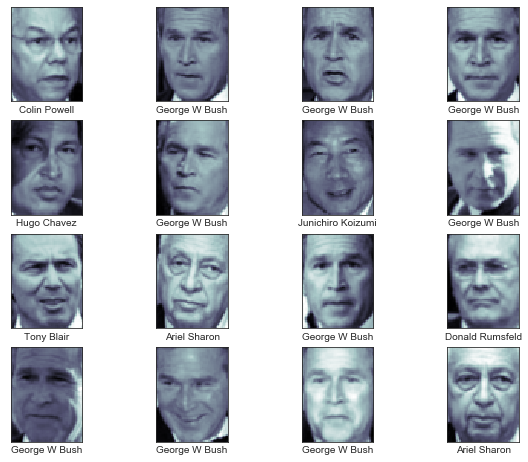

In [29]:
fig, axes = plt.subplots(4,4, subplot_kw = {'xticks' : [], 'yticks' : []}, figsize = (10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(people.images[i], cmap = 'bone')
    ax.set_xlabel(people.target_names[people.target[i]])


In [30]:
%%HTML
<h3>Image Preprocessing</h3>

In [31]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
model = make_pipeline(PCA(150, whiten = True), SVC())

In [32]:
%%HTML
<h3>Model Selection</h3>

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(people.data, people.target, random_state = 6, train_size = .8, test_size = .2)

In [36]:
%%HTML
<h4>Tuning Parameters</h4>

In [40]:
from sklearn.model_selection import GridSearchCV
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pca', 'svc', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'svc__C', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [43]:
param_grid = {'svc__gamma' : [0.0001, 0.0005, 0.001, 0.005], 'svc__C' : [1,5,10, 50]}
grid = GridSearchCV(model, param_grid = param_grid)
%timeit grid.fit(x_train, y_train)b

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureW

16.8 s ± 1.01 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
%%HTML
<h4>Best Parameters</h4>

In [44]:
grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.005}

In [47]:
%%HTML
<h4>Best model</h4>

In [48]:
model = grid.best_estimator_
y_pred = model.predict(x_test)

In [49]:
%%HTML
<h4>Validation</h4>

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

0.8740740740740741

Text(92.68, 0.5, 'Predict Label')

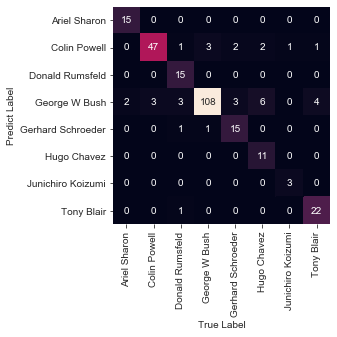

In [59]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix.T, annot = True, square = True, cbar = False, xticklabels = people.target_names, yticklabels = people.target_names, fmt = 'd')
plt.xlabel('True Label')
plt.ylabel('Predict Label')

In [55]:
%%HTML
<h3>Report the performance of our Model</h3>

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.88      0.94        17
     Colin Powell       0.82      0.94      0.88        50
  Donald Rumsfeld       1.00      0.71      0.83        21
    George W Bush       0.84      0.96      0.90       112
Gerhard Schroeder       0.88      0.75      0.81        20
      Hugo Chavez       1.00      0.58      0.73        19
Junichiro Koizumi       1.00      0.75      0.86         4
       Tony Blair       0.96      0.81      0.88        27

         accuracy                           0.87       270
        macro avg       0.94      0.80      0.85       270
     weighted avg       0.89      0.87      0.87       270

